#Project Basics


In [903]:
# Importing all the libraries
import io
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from itertools import cycle
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost
from itertools import chain
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [904]:
# To upload excel File
# you will have to upload the file from your device
cropExcel=files.upload()

Saving Capstone_Data.xlsx to Capstone_Data (4).xlsx


In [905]:
# to read the excel file uploaded in colab
xlsx_file = io.BytesIO(cropExcel.get('Capstone_Data.xlsx'))
# to load the excel file into Data Frame
df_xlsxData = pd.read_excel(xlsx_file, sheet_name=None)
# to get the list of sheets present in the excel file
sheet_list=df_xlsxData.keys()
sheet_list

dict_keys(['notes', 'correlations', 'plant age vs yield', 'Harvest Dates', 'Hops Growing Calendar', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', 'OR climate data', 'WA climate data', 'ID climate data', 'OR- NASA data', 'WA - NASA data', 'ID - NASA data'])

#Washington Analysis

##Climate of Washington Dataset


### To create 2 Datasets for Washington and 1 for total acres harvested with year as y columns and variety as rows. Aonther data frame would be for average Yield

In [906]:
# Create a temp data frame where will store the values
df_total_acre_WA=pd.DataFrame([])
df_average_yield_WA=pd.DataFrame([])
#Iterating through each sheet from 2000 to 2003 to get the total acer harvested based at the Washington sheet
for x in range(2000,2023):
  df_x = pd.read_excel(xlsx_file, str(x),header=[0, 1])
  # to Get the value of Washington city
  df_washington_acre=df_x["Total acres harvested by location"]["Washington"]
  df_washington_Yield=df_x["Average yield per acre by location"]["Washington"]
  # to get the list of variety
  df_year=df_x["Year: " + str(x)]
  # to create A df with respect to Variety and Washington
  df_concat_acre=pd.concat([df_year,df_washington_acre], axis=1, join='inner')
  df_concat_Yield=pd.concat([df_year,df_washington_Yield], axis=1, join='inner')
  # to set the index of Row as Variety
  df_concat_acre.set_index('Variety', inplace=True)
  df_concat_Yield.set_index('Variety', inplace=True)
  # to Rename the column to year
  result_acre= df_concat_acre.rename(columns={'Washington': str(x)})
  result_Yield=df_concat_Yield.rename(columns={'Washington': str(x)})
  # appending the data of each year to the Temp DataFrame
  df_total_acre_WA.insert(0,str(x),result_acre,allow_duplicates=False)
  df_average_yield_WA.insert(0,str(x),result_Yield,allow_duplicates=False)

In [907]:
df_average_yield_WA.T

Variety  Ahtanum, YCR 1  Amarillo, VGXP01  Apollo  Azacca, ADHA-483   Bravo  \
2022             2032.0            1486.0  2483.0            1559.0  2161.0   
2021             2211.0            1659.0     NaN            1909.0  2759.0   
2020             2134.0            1649.0  2248.0            1527.0  2308.0   
2019             2820.0            1946.0  2735.0            2441.0  3216.0   
2018             2730.0            1868.0  2848.0            2491.0  3258.0   
2017             1052.0            1687.0  2729.0            2463.0  2973.0   
2016             1012.0               NaN  2225.0            1870.0  2671.0   
2015             1557.0               NaN  2738.0            1872.0  2824.0   
2014             1680.0               NaN  2649.0            1704.0  2768.0   
2013             1647.0               NaN  2926.0               NaN  2860.0   
2012             1489.0               NaN  2655.0               NaN  2647.0   
2011                NaN               NaN  2758.0               NaN  2609.0   
2010                NaN               NaN  2778.0               NaN  2566.0   
2009                NaN               NaN  2941.0               NaN  2397.0   
2008                NaN               NaN  2229.0               NaN  2340.0   
2007             1964.0               NaN     NaN               NaN     NaN   
2006             2110.0               NaN     NaN               NaN     NaN   
2005              758.0               NaN     NaN               NaN     NaN   
2004                NaN               NaN     NaN               NaN     NaN   
2003                NaN               NaN     NaN               NaN     NaN   
2002                NaN               NaN     NaN               NaN     NaN   
2001                NaN               NaN     NaN               NaN     NaN   
2000                NaN               NaN     NaN               NaN     NaN   

Variety  Calypso  Cascade  Cashmere  Centennial  Chelan  ...  Tahoma  \
2022         NaN   1477.0    1521.0      1464.0     NaN  ...  1310.0   
2021         NaN   1585.0    1395.0      1585.0     NaN  ...  1055.0   
2020         NaN   1551.0    1514.0      1640.0     NaN  ...  1588.0   
2019         NaN   1920.0    1699.0      1820.0     NaN  ...  1958.0   
2018         NaN   1972.0    1519.0      1364.0     NaN  ...  2147.0   
2017         NaN   2124.0       NaN      1703.0     NaN  ...  1752.0   
2016         NaN   1727.0       NaN      1356.0     NaN  ...     NaN   
2015         NaN   1936.0       NaN      1145.0     NaN  ...     NaN   
2014         NaN   1824.0       NaN      1347.0     NaN  ...     NaN   
2013         NaN   1723.0       NaN      1554.0     NaN  ...     NaN   
2012         NaN   1854.0       NaN      1354.0     NaN  ...     NaN   
2011         NaN   1955.0       NaN      1403.0     NaN  ...     NaN   
2010         NaN   1905.0       NaN      1791.0     NaN  ...     NaN   
2009         NaN   2120.0       NaN      1490.0  2680.0  ...     NaN   
2008         NaN   1781.0       NaN      1452.0  2178.0  ...     NaN   
2007         NaN   2031.0       NaN         NaN  2364.0  ...     NaN   
2006         NaN   1954.0       NaN         NaN  2187.0  ...     NaN   
2005         NaN   2036.0       NaN      1375.0  2244.0  ...     NaN   
2004         NaN   2006.0       NaN         NaN  2482.0  ...     NaN   
2003         NaN   1808.0       NaN         NaN  2545.0  ...     NaN   
2002         NaN   1748.0       NaN         NaN  2211.0  ...     NaN   
2001         NaN   1785.0       NaN         NaN  1809.0  ...     NaN   
2000         NaN   1806.0       NaN         NaN     NaN  ...     NaN   

Variety  Talus, HBC 692  Tettnanger  Tillicum  Triumph  Vanguard  \
2022             1703.0         NaN       NaN      NaN       NaN   
2021                NaN         NaN       NaN      NaN       NaN   
2020                NaN         NaN       NaN      NaN       NaN   
2019                NaN         NaN       NaN      NaN       NaN   
2018                NaN         Na

In [908]:
list_avg=[]
list_acr=[]
#df_year=df_x["Year: " + str(x)]
variety_list=df_year.values
variety_list=list(chain.from_iterable(variety_list))
for x in range(2000,2023):
  for variety in variety_list:
    list_avg.append({"Location":"Washington","Year":str(x),"Variety":variety,"Average Yield":df_average_yield_WA[str(x)][variety]})
    list_acr.append(df_total_acre_WA[str(x)][variety])
new_df_average_yield_WA=pd.DataFrame.from_dict(list_avg)
new_df_average_yield_WA['Total Acre'] = list_acr
#new_df_average_yield_WA=pd.DataFrame.from_dict(list_acr)
new_df_average_yield_WA

Location  Year           Variety  Average Yield  Total Acre
0     Washington  2000    Ahtanum, YCR 1            NaN         NaN
1     Washington  2000  Amarillo, VGXP01            NaN         NaN
2     Washington  2000            Apollo            NaN         NaN
3     Washington  2000  Azacca, ADHA-483            NaN         NaN
4     Washington  2000             Bravo            NaN         NaN
...          ...   ...               ...            ...         ...
1352  Washington  2022          Vanguard            NaN         NaN
1353  Washington  2022    Warrior, YCR 5         1610.0       147.0
1354  Washington  2022        Willamette          991.0       124.0
1355  Washington  2022             Zappa          839.0        69.0
1356  Washington  2022             Total         1679.0     42762.0

[1357 rows x 5 columns]

### EDA of Total acres harvested in WA


In [909]:
df_total_acre_WA.isnull().sum()

2022    26
2021    29
2020    25
2019    26
2018    26
2017    30
2016    34
2015    30
2014    30
2013    31
2012    35
2011    39
2010    39
2009    37
2008    39
2007    41
2006    40
2005    40
2004    43
2003    41
2002    40
2001    38
2000    46
dtype: int64

In [910]:
# First we will check if there are any null values or not
df_total_acre_WA.isnull().sum()
#Replacing the values of of nulls and checking it again
df_total_acre_WA.fillna(0,inplace=True)
df_total_acre_WA.isnull().sum()

2022    0
2021    0
2020    0
2019    0
2018    0
2017    0
2016    0
2015    0
2014    0
2013    0
2012    0
2011    0
2010    0
2009    0
2008    0
2007    0
2006    0
2005    0
2004    0
2003    0
2002    0
2001    0
2000    0
dtype: int64

In [911]:
df_total_acre_WA

2022     2021     2020     2019     2018  \
Variety                                                                     
Ahtanum, YCR 1                  168.0    166.0    230.0    261.0    255.0   
Amarillo, VGXP01               1324.0   1334.0   1395.0   1597.0   1895.0   
Apollo                          807.0      0.0    750.0    851.0    795.0   
Azacca, ADHA-483                871.0    730.0    722.0    589.0    546.0   
Bravo                           203.0    238.0    201.0    236.0    280.0   
Calypso                           0.0      0.0      0.0      0.0      0.0   
Cascade                        3604.0   3183.0   2877.0   3718.0   4274.0   
Cashmere                        717.0    690.0    448.0    310.0    195.0   
Centennial                     2044.0   1978.0   2444.0   3031.0   3875.0   
Chelan                            0.0      0.0      0.0      0.0      0.0   
Chinook                        1443.0   1174.0   1183.0   1437.0   1734.0   
Citra, HBC 394                 8586.0   8766.0   8143.0   6720.0   4837.0   
Cluster                         286.0    390.0    413.0    470.0    610.0   
CTZ - Columbus/Tomahawk/Zeus   3998.0   4523.0   4829.0   4935.0   4626.0   
Comet                           327.0    386.0    330.0    210.0    218.0   
Crystal                           0.0      0.0      0.0     66.0    114.0   
Ekuanot, HBC 366                367.0    381.0    641.0    632.0    865.0   
El Dorado                       861.0   1113.0   1058.0    641.0    418.0   
Eureka!                         570.0    466.0    465.0    425.0    409.0   
Fuggle                            0.0      0.0      0.0      0.0      0.0   
Galena                            0.0      0.0    241.0    297.0    390.0   
Glacier                           0.0      0.0      0.0      0.0      0.0   
Golding                           0.0      0.0      0.0      0.0      0.0   
Hallertauer                       0.0      0.0      0.0      0.0      0.0   
Horizon                           0.0      0.0      0.0      0.0      0.0   
Idaho 7                         158.0    388.0    341.0     85.0      0.0   
Jarrylo, ADHA-881                 0.0      0.0     17.0      0.0      0.0   
Loral, HBC 369                  199.0    197.0    164.0    125.0    172.0   
Liberty                           0.0      0.0      0.0      0.0      0.0   
Magnum                            0.0      0.0      0.0      0.0      0.0   
Millenium                         0.0      0.0      0.0      0.0      0.0   
Mosaic                         4160.0   4193.0   3715.0   2829.0   1932.0   
Mt Hood                          42.0      0.0     48.0     53.0    104.0   
Mt Rainier                      212.0    209.0    223.0    239.0    306.0   
Northern Brewer                   0.0      0.0      0.0      0.0      0.0   
Nugget                            0.0      0.0      0.0    104.0    126.0   
Pahto, HBC 682                 1709.0   2114.0   2208.0   2109.0   1721.0   
Palisade, YCR 4                 377.0    333.0    246.0    477.0    515.0   
Pekko, ADHA-871                1084.0   1070.0    801.0      0.0     92.0   
Perle                             0.0      0.0      0.0      0.0      0.0   
Sabro, HBC 438                  548.0   1120.0   1145.0    724.0      0.0   
Saaz                              0.0      0.0      0.0      0.0      0.0   
Santiam                           0.0      0.0      0.0      0.0      0.0   
Simcoe, YCR 14                 3494.0   3172.0   3214.0   3367.0   3103.0   
Sorachi Ace                       0.0      0.0      0.0      0.0    146.0   
Sterling                          0.0      0.0      0.0      0.0      0.0   
Strata, OR 91331                  0.0      0.0      0.0      0.0      0.0   
Summit                            0.0    437.0    640.0   1072.0   1574.0   
Super Galena                    354.0    480.0    475.0    473.0    500.0   
Tahoma                          383.0    388.0    177.0    230.0    209.0   
Talus, HBC 692               

In [912]:
df_total_acre_WA.T

Variety  Ahtanum, YCR 1  Amarillo, VGXP01  Apollo  Azacca, ADHA-483  Bravo  \
2022              168.0            1324.0   807.0             871.0  203.0   
2021              166.0            1334.0     0.0             730.0  238.0   
2020              230.0            1395.0   750.0             722.0  201.0   
2019              261.0            1597.0   851.0             589.0  236.0   
2018              255.0            1895.0   795.0             546.0  280.0   
2017              371.0            1984.0   684.0             578.0  486.0   
2016              155.0               0.0   735.0             506.0  573.0   
2015              145.0               0.0   708.0             175.0  569.0   
2014              194.0               0.0   700.0              79.0  584.0   
2013              211.0               0.0   701.0               0.0  493.0   
2012              176.0               0.0   874.0               0.0  528.0   
2011                0.0               0.0   885.0               0.0  593.0   
2010                0.0               0.0   827.0               0.0  414.0   
2009                0.0               0.0   747.0               0.0  335.0   
2008                0.0               0.0   698.0               0.0  222.0   
2007               42.0               0.0     0.0               0.0    0.0   
2006               40.0               0.0     0.0               0.0    0.0   
2005              131.0               0.0     0.0               0.0    0.0   
2004                0.0               0.0     0.0               0.0    0.0   
2003                0.0               0.0     0.0               0.0    0.0   
2002                0.0               0.0     0.0               0.0    0.0   
2001                0.0               0.0     0.0               0.0    0.0   
2000                0.0               0.0     0.0               0.0    0.0   

Variety  Calypso  Cascade  Cashmere  Centennial  Chelan  ...  Tahoma  \
2022         0.0   3604.0     717.0      2044.0     0.0  ...   383.0   
2021         0.0   3183.0     690.0      1978.0     0.0  ...   388.0   
2020         0.0   2877.0     448.0      2444.0     0.0  ...   177.0   
2019         0.0   3718.0     310.0      3031.0     0.0  ...   230.0   
2018         0.0   4274.0     195.0      3875.0     0.0  ...   209.0   
2017         0.0   4966.0       0.0      4375.0     0.0  ...   217.0   
2016         0.0   5582.0       0.0      4359.0     0.0  ...     0.0   
2015         0.0   4935.0       0.0      3770.0     0.0  ...     0.0   
2014         0.0   4837.0       0.0      2836.0     0.0  ...     0.0   
2013         0.0   4237.0       0.0      1869.0     0.0  ...     0.0   
2012         0.0   2693.0       0.0      1478.0     0.0  ...     0.0   
2011         0.0   2108.0       0.0       641.0     0.0  ...     0.0   
2010         0.0   1728.0       0.0       357.0     0.0  ...     0.0   
2009         0.0   2019.0       0.0       298.0   762.0  ...     0.0   
2008         0.0   2073.0       0.0       253.0   739.0  ...     0.0   
2007         0.0   1303.0       0.0         0.0   505.0  ...     0.0   
2006         0.0   1116.0       0.0         0.0   505.0  ...     0.0   
2005         0.0   1168.0       0.0       112.0   212.0  ...     0.0   
2004         0.0   1422.0       0.0         0.0   201.0  ...     0.0   
2003         0.0   2120.0       0.0         0.0   180.0  ...     0.0   
2002         0.0   1216.0       0.0         0.0   295.0  ...     0.0   
2001         0.0   1003.0       0.0         0.0   317.0  ...     0.0   
2000         0.0    996.0       0.0         0.0     0.0  ...     0.0   

Variety  Talus, HBC 692  Tettnanger  Tillicum  Triumph  Vanguard  \
2022              377.0         0.0       0.0      0.0       0.0   
2021                0.0         0.0       0.0      0.0       0.0   
2020                0.0         0.0       0.0      0.0       0.0   
2019                0.0         0.0       0.0      0.0       0.0   
2018                0.0         0.0       0.0      0.0    

### Cleaning the Data of average Yield of Washington


In [913]:
# First we will check if there are any null values or not
new_df_average_yield_WA.isnull().sum()
new_df_average_yield_WA=new_df_average_yield_WA.fillna(0)

In [914]:
new_df_average_yield_WA

Location  Year           Variety  Average Yield  Total Acre
0     Washington  2000    Ahtanum, YCR 1            0.0         0.0
1     Washington  2000  Amarillo, VGXP01            0.0         0.0
2     Washington  2000            Apollo            0.0         0.0
3     Washington  2000  Azacca, ADHA-483            0.0         0.0
4     Washington  2000             Bravo            0.0         0.0
...          ...   ...               ...            ...         ...
1352  Washington  2022          Vanguard            0.0         0.0
1353  Washington  2022    Warrior, YCR 5         1610.0       147.0
1354  Washington  2022        Willamette          991.0       124.0
1355  Washington  2022             Zappa          839.0        69.0
1356  Washington  2022             Total         1679.0     42762.0

[1357 rows x 5 columns]

In [915]:
new_df_average_yield_WA=new_df_average_yield_WA.groupby(['Variety','Year']).sum()
new_df_average_yield_WA.reset_index(inplace=True)
new_df_average_yield_WA

<ipython-input-915-d437a44d34a9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df_average_yield_WA=new_df_average_yield_WA.groupby(['Variety','Year']).sum()


Variety  Year  Average Yield  Total Acre
0     Ahtanum, YCR 1  2000            0.0         0.0
1     Ahtanum, YCR 1  2001            0.0         0.0
2     Ahtanum, YCR 1  2002            0.0         0.0
3     Ahtanum, YCR 1  2003            0.0         0.0
4     Ahtanum, YCR 1  2004            0.0         0.0
...              ...   ...            ...         ...
1352           Zappa  2018            0.0         0.0
1353           Zappa  2019            0.0         0.0
1354           Zappa  2020            0.0         0.0
1355           Zappa  2021            0.0         0.0
1356           Zappa  2022          839.0        69.0

[1357 rows x 4 columns]

In [916]:
new_df_average_yield_WA['Moving Avg Yield'] = new_df_average_yield_WA.groupby('Variety').rolling(3)['Average Yield'].mean().reset_index(drop=True)
new_df_average_yield_WA=new_df_average_yield_WA.fillna(0)

###Graphs and Visualzation


<ipython-input-917-f898bf44e527>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=16)
<ipython-input-917-f898bf44e527>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=16)
<ipython-input-917-f898bf44e527>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=16)
<ipython-input-917-f898bf44e527>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=16)


Text(0, 0.5, 'Average yield per acre by location')

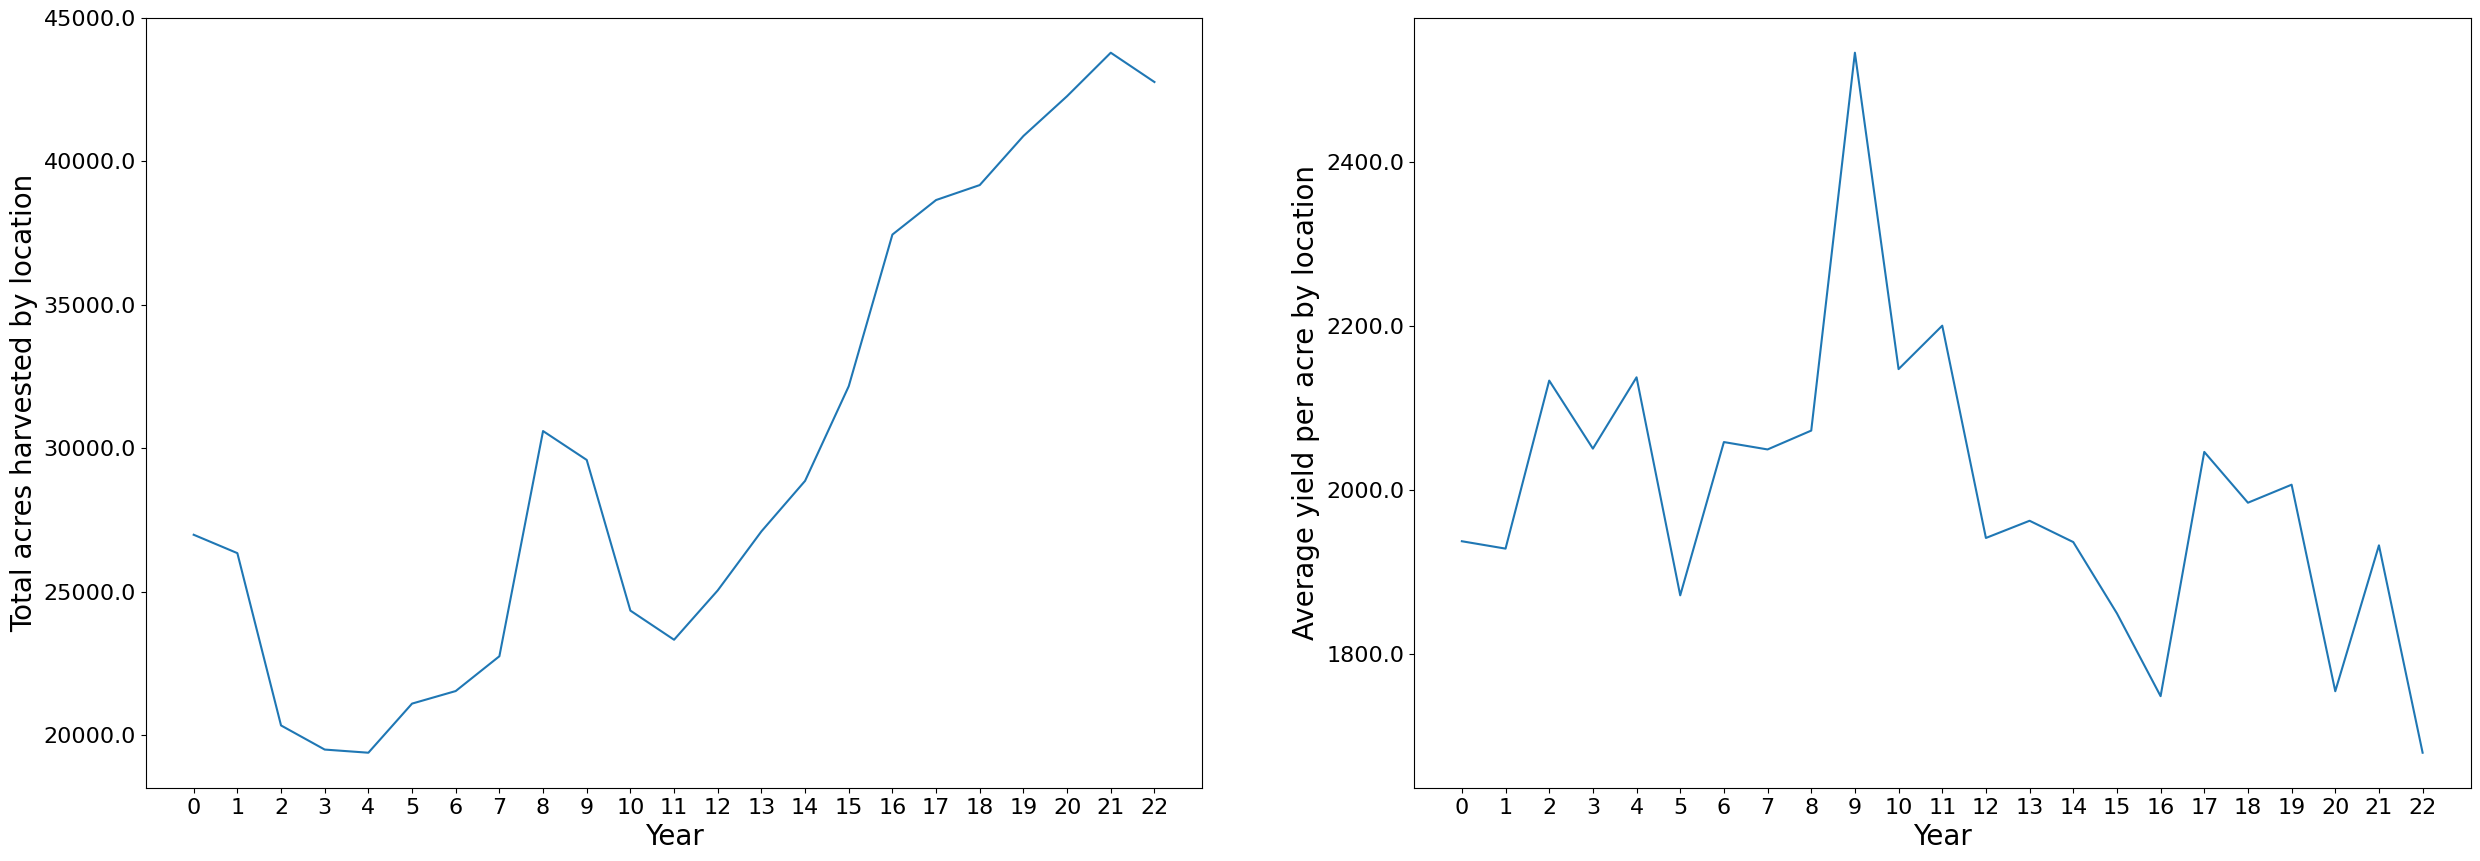

<Figure size 640x480 with 0 Axes>

In [917]:
fig, axs = plt.subplots(ncols=2, figsize=(30, 10))
sns.lineplot(data=df_total_acre_WA.loc['Total'].iloc[::-1],ax=axs[0])
figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=df_average_yield_WA.loc['Total'].iloc[::-1],ax=axs[1])
axs[0].set(xlabel="Year", ylabel="Total acres harvested by location")
axs[1].set(xlabel="Year", ylabel="Average yield per acre by location")
# Increase font size of x-axis and y-axis labels
axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=16)
axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=16)
axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=16)
axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=16)
# Increase font size of x-axis and y-axis titles
axs[0].set_xlabel(axs[0].get_xlabel(), fontsize=20)
axs[0].set_ylabel(axs[0].get_ylabel(), fontsize=20)
axs[1].set_xlabel(axs[1].get_xlabel(), fontsize=20)
axs[1].set_ylabel(axs[1].get_ylabel(), fontsize=20)

<ipython-input-918-e391d2bd11f2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=16)
<ipython-input-918-e391d2bd11f2>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=16)
<ipython-input-918-e391d2bd11f2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=16)
<ipython-input-918-e391d2bd11f2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=16)


Text(0, 0.5, 'Number of Varieties ')

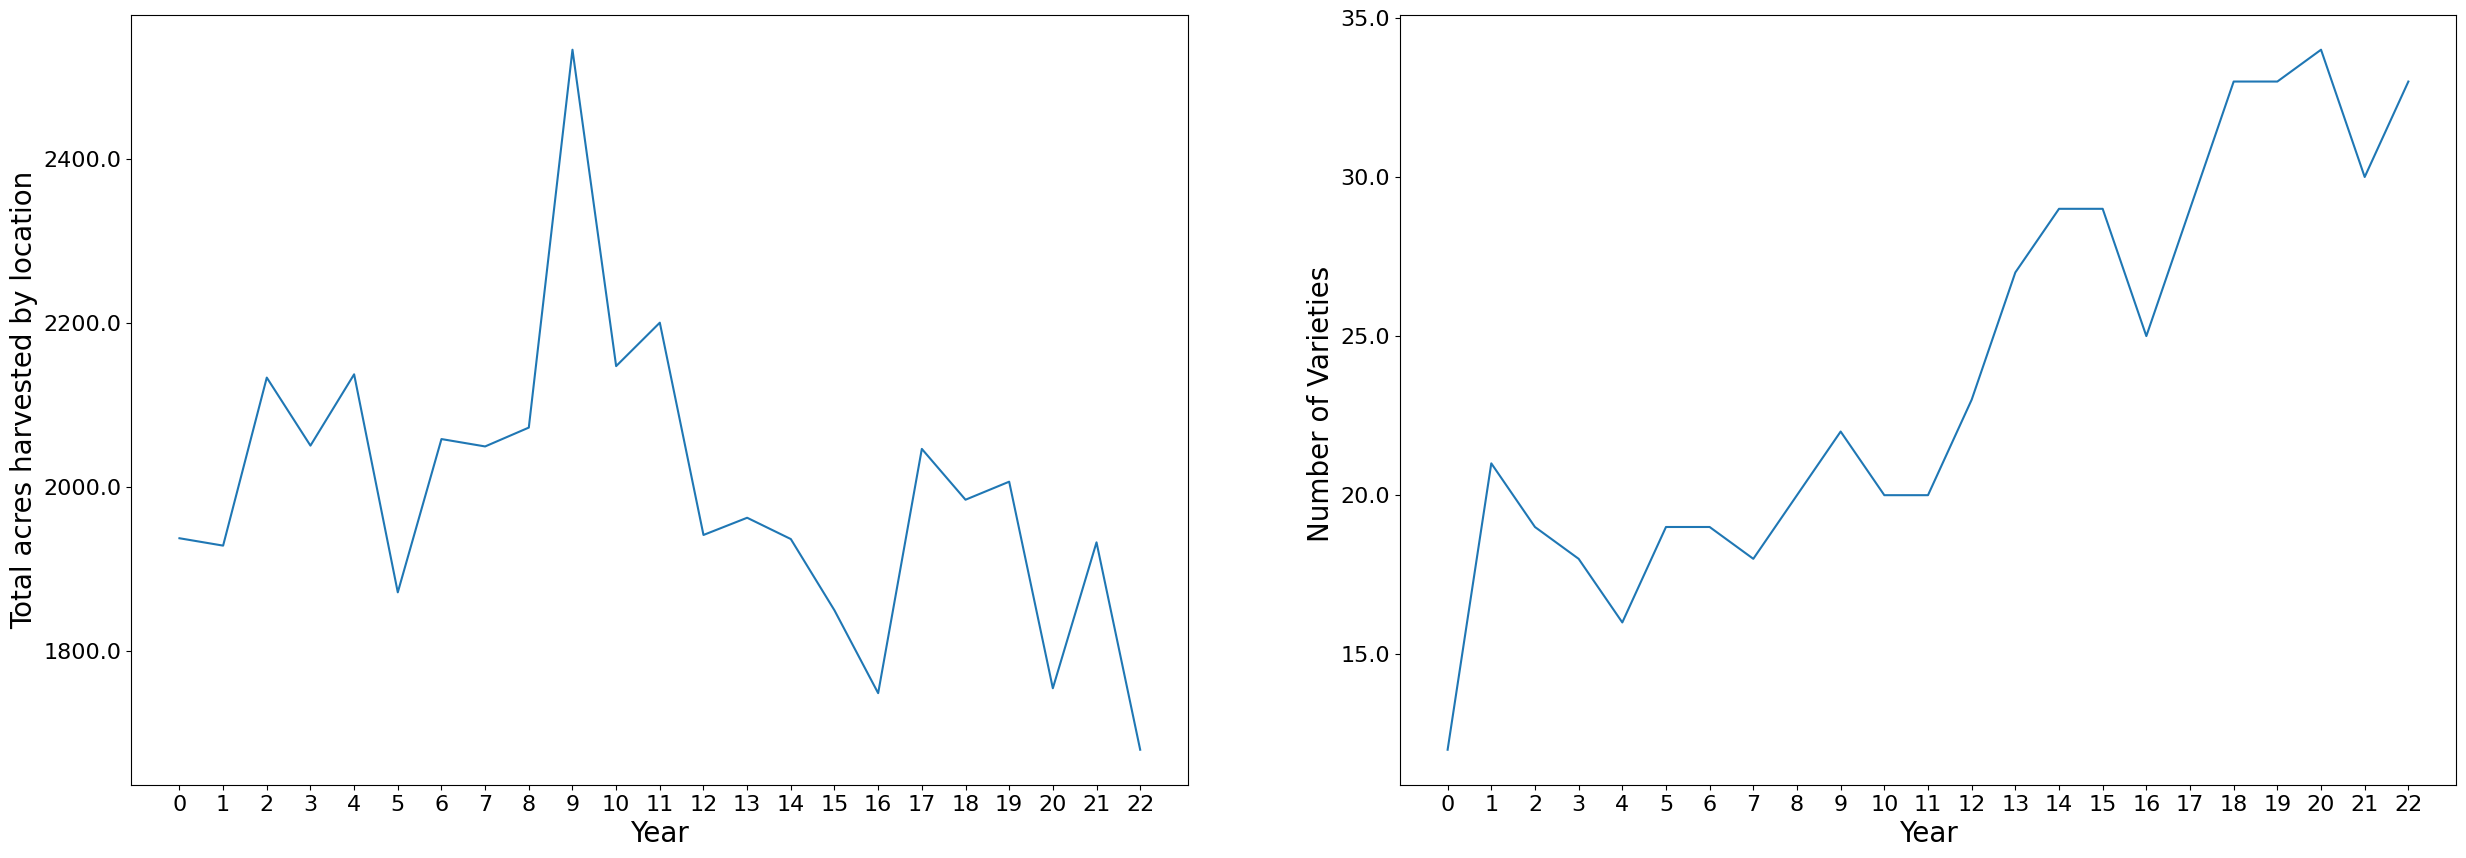

<Figure size 1000x600 with 0 Axes>

In [918]:
fig, axs = plt.subplots(ncols=2, figsize=(30, 10))
sns.lineplot(data=df_average_yield_WA.loc['Total'].iloc[::-1],ax=axs[0])
figure(figsize=(10, 6), dpi=100)
sns.lineplot(data=df_average_yield_WA[df_total_acre_WA > 1.0].count().iloc[::-1],ax=axs[1])
axs[0].set(xlabel="Year", ylabel="Total acres harvested by location")
axs[1].set(xlabel="Year", ylabel="Number of Varieties ")
# Increase font size of x-axis and y-axis labels
axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=16)
axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=16)
axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=16)
axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=16)
# Increase font size of x-axis and y-axis titles
axs[0].set_xlabel(axs[0].get_xlabel(), fontsize=20)
axs[0].set_ylabel(axs[0].get_ylabel(), fontsize=20)
axs[1].set_xlabel(axs[1].get_xlabel(), fontsize=20)
axs[1].set_ylabel(axs[1].get_ylabel(), fontsize=20)

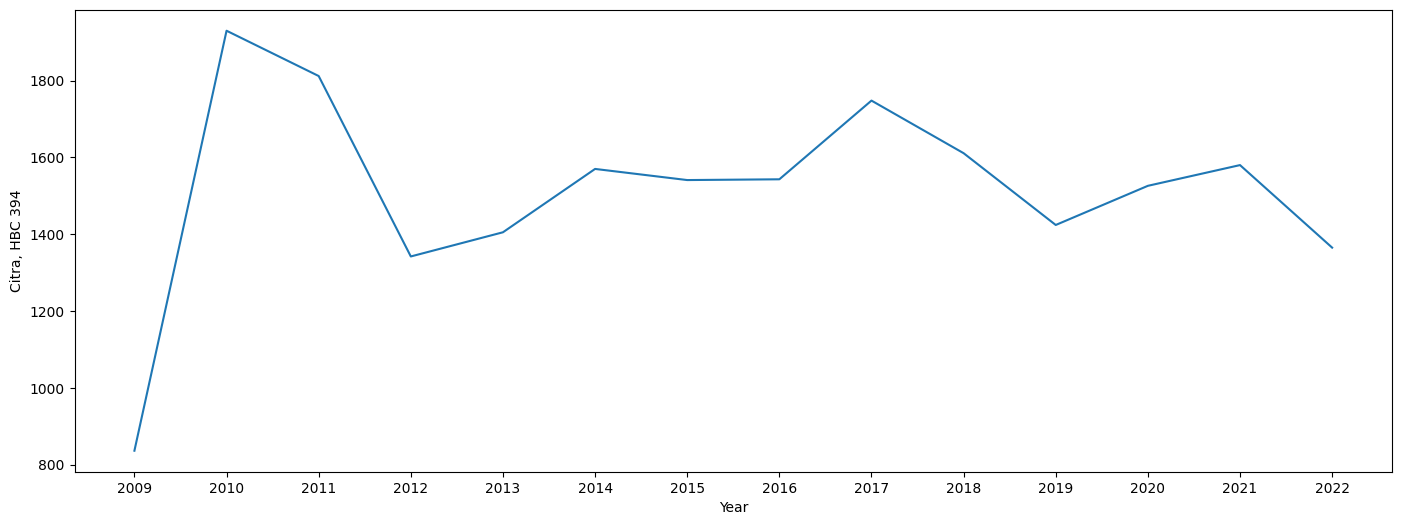

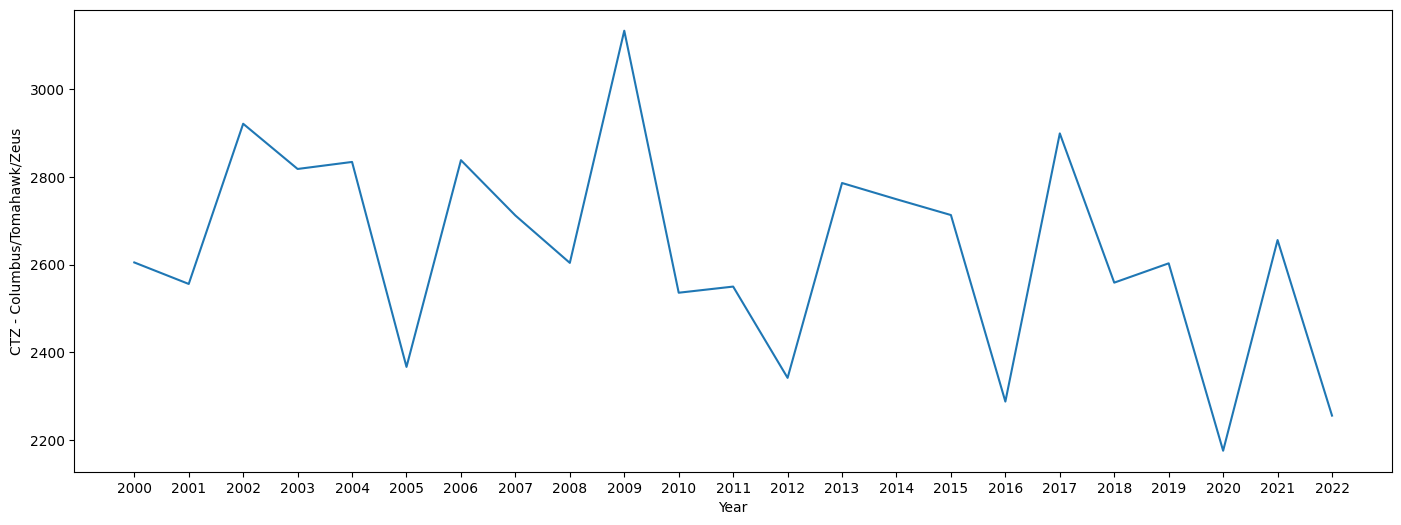

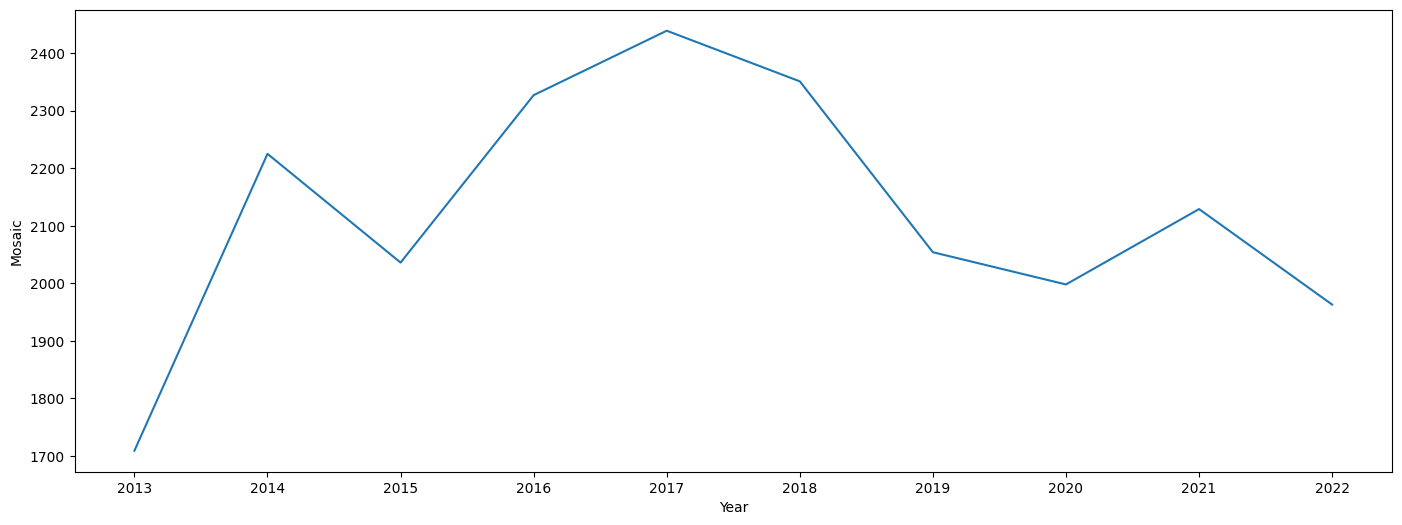

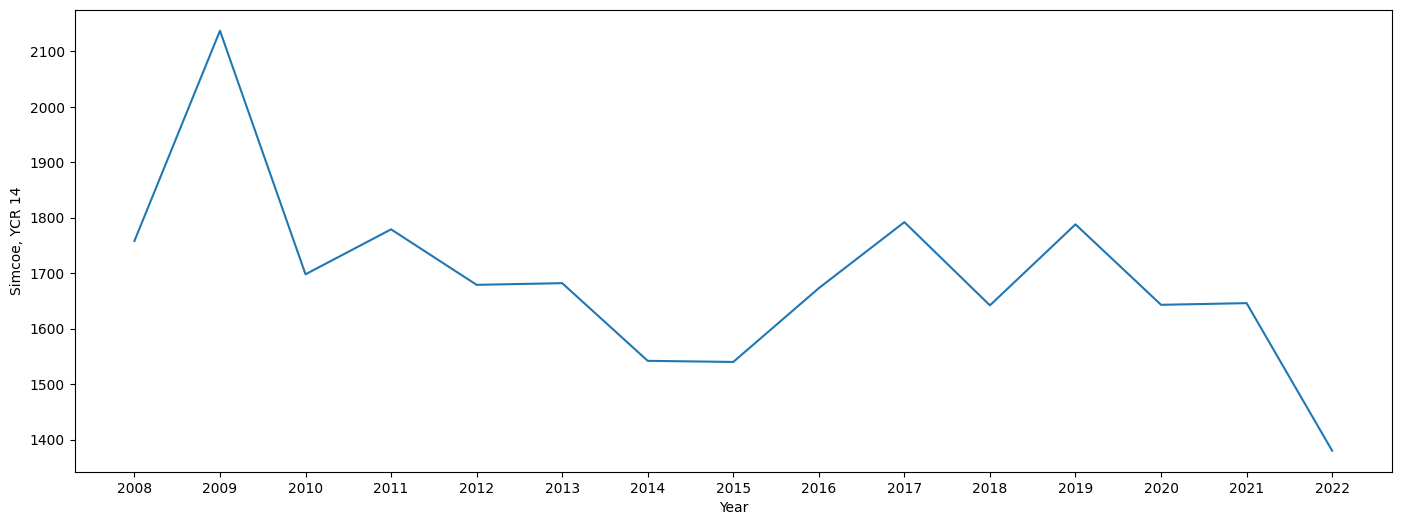

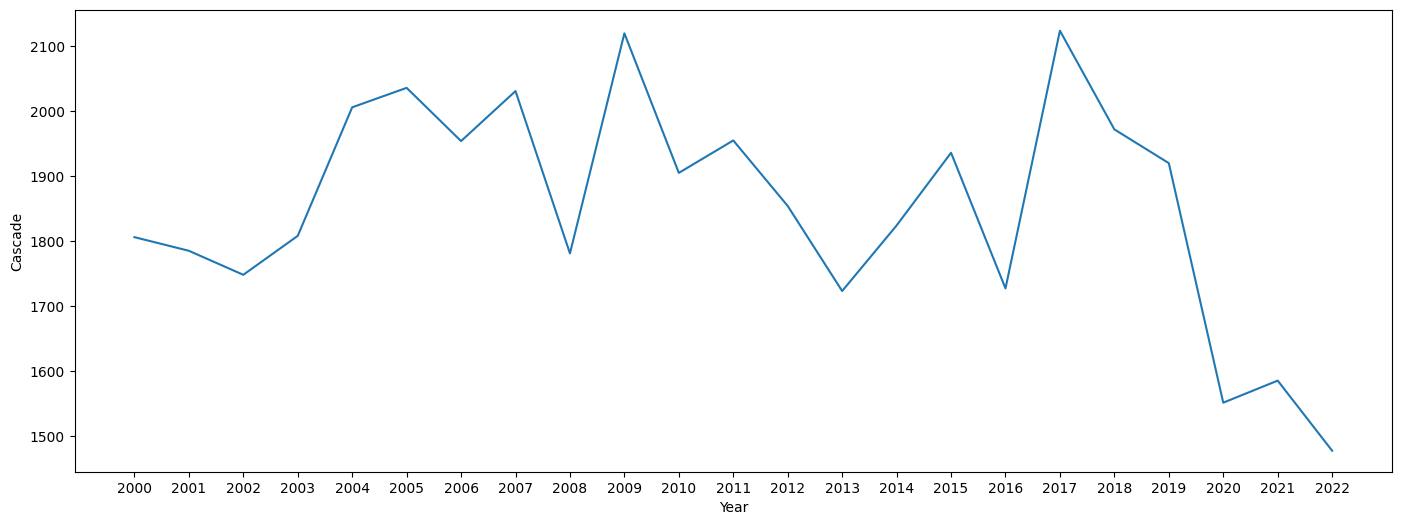

In [919]:

columns=["Citra, HBC 394",'CTZ - Columbus/Tomahawk/Zeus','Mosaic','Simcoe, YCR 14','Cascade']
for column in columns:
  plt.figure(figsize=(17,6))
  sns.lineplot(data=df_average_yield_WA.transpose()[column].iloc[::-1])
  plt.xlabel("Year")



Text(0, 0.5, 'Count')

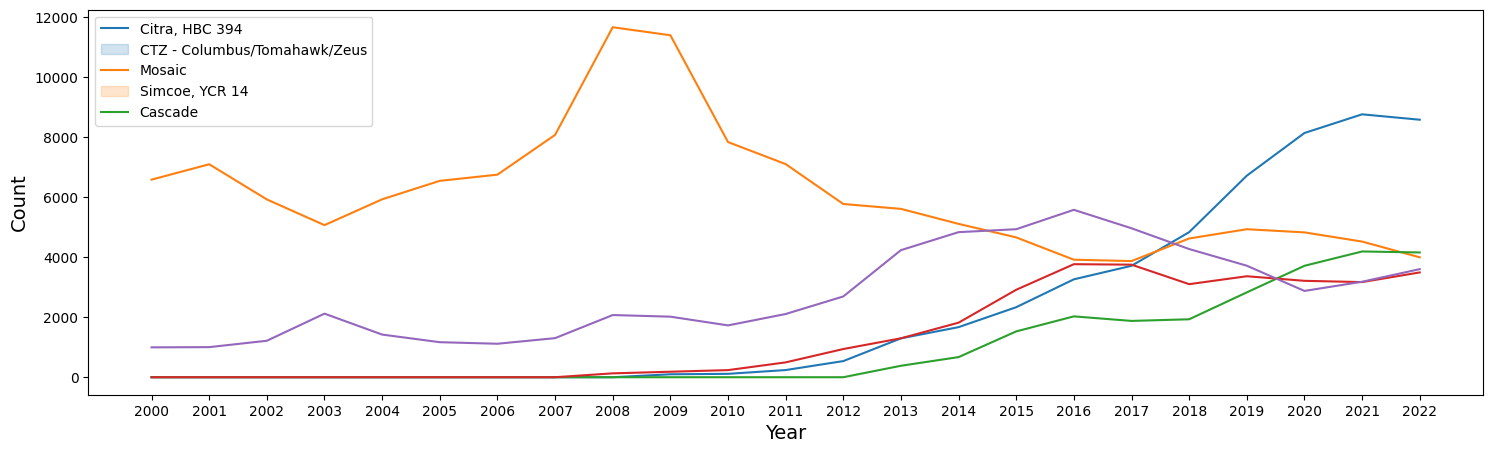

In [920]:
fig = plt.subplots(figsize=(18, 5))
for column in columns:
    sns.lineplot(data=df_total_acre_WA.transpose()[column].iloc[::-1])
plt.legend(columns)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Count", fontsize=14)

####Climate load and out

### Climate DataSet



In [921]:
df_climate_WA=pd.read_excel(xlsx_file,sheet_name="WA climate data")
df_climate_WA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8674 entries, 0 to 8673
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               8674 non-null   datetime64[ns]
 1   ppt (inches)       8674 non-null   float64       
 2   tmin (degrees F)   8674 non-null   float64       
 3   tmean (degrees F)  8674 non-null   float64       
 4   tmax (degrees F)   8674 non-null   float64       
 5   vpdmin (hPa)       8674 non-null   float64       
 6   vpdmax (hPa)       8674 non-null   float64       
 7   ETO  (FAO)         8674 non-null   float64       
 8   ЕТО
 (Hargreaves)  8674 non-null   float64       
 9   Hops factor (HF)   365 non-null    float64       
 10  ETO x HF           365 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 745.5 KB


As you can you as the acres increases the Yield is reduced. To find the reason behind it will anlyze the climate Data of the reqgion Washigton


In [922]:
# now we will convert Date to Datetime index

df_climate_WA.Date = pd.to_datetime(df_climate_WA.Date)
cyclic_Data=df_climate_WA["Hops factor (HF)"].dropna()
cyclic_Data
df_climate_WA["Hops factor (HF)"]= df_climate_WA.index.map(dict(zip(df_climate_WA.index, cycle(cyclic_Data))))
df_climate_WA["ETO x HF"]=df_climate_WA["Hops factor (HF)"]*df_climate_WA["ETO  (FAO)"]
df_climate_WA["vpdmean(hPa)"]=(df_climate_WA["vpdmax (hPa)"]-df_climate_WA["vpdmin (hPa)"])/2
df_climate_WA["ppt_sign"]=df_climate_WA["Hops factor (HF)"]*df_climate_WA["ppt (inches)"]
df_climate_WA["tmean_sign"]=df_climate_WA["Hops factor (HF)"]*df_climate_WA["tmean (degrees F)"]
df_climate_WA["vpdmean_sign"]=df_climate_WA["Hops factor (HF)"]*df_climate_WA["vpdmean(hPa)"]
df_climate_WA

Date  ppt (inches)  tmin (degrees F)  tmean (degrees F)  \
0    1999-01-01           0.0              31.1               42.9   
1    1999-01-02           0.0              26.0               35.2   
2    1999-01-03           0.0              23.3               33.9   
3    1999-01-04           0.0              21.1               29.0   
4    1999-01-05           0.0              24.8               27.8   
...         ...           ...               ...                ...   
8669 2022-09-26           0.0              45.9               64.5   
8670 2022-09-27           0.0              47.6               66.5   
8671 2022-09-28           0.0              48.7               67.2   
8672 2022-09-29           0.0              48.9               63.2   
8673 2022-09-30           0.0              47.6               62.6   

      tmax (degrees F)  vpdmin (hPa)  vpdmax (hPa)  ETO  (FAO)  \
0                 54.7          0.20          7.68        1.10   
1                 44.4          0.28          4.51        0.82   
2                 44.4          0.20          4.64        0.86   
3                 36.9          0.13          1.95        0.67   
4                 30.8          0.08          0.41        0.49   
...                ...           ...           ...         ...   
8669              83.1          0.26         27.59        3.94   
8670              85.5          1.17         29.88        4.06   
8671              85.7          0.66         30.07        4.00   
8672              77.5          0.60         21.98        3.24   
8673              77.5          0.56         21.99        3.26   

      ЕТО\n (Hargreaves)  Hops factor (HF)  ETO x HF  vpdmean(hPa)  ppt_sign  \
0                   0.80               0.0       0.0         3.740       0.0   
1                   0.58               0.0       0.0         2.115       0.0   
2                   0.60               0.0       0.0         2.220       0.0   
3                   0.45               0.0       0.0         0.910       0.0   
4                   0.27               0.0       0.0         0.165       0.0   
...                  ...               ...       ...           ...       ...   
8669                3.69               0.0       0.0        13.665       0.0   
8670                3.79               0.0       0.0        14.355       0.0   
8671                3.74               0.0       0.0        14.705       0.0   
8672                3.05               0.0       0.0        10.690       0.0   
8673                3.05               0.0       0.0        10.715       0.0   

      tmean_sign  vpdmean_sign  
0            0.0           0.0  
1            0.0           0.0  
2            0.0           0.0  
3            0.0           0.0  
4            0.0           0.0  
...          ...           ...  
8669         0.0           0.0  
8670         0.0           0.0  
8671         0.0           0.0  
8672         0.0           0.0  
8673         0.0           0.0  

[8674 rows x 15 columns]

In [923]:
df_climate_WA.head(10)

Date  ppt (inches)  tmin (degrees F)  tmean (degrees F)  \
0 1999-01-01           0.0              31.1               42.9   
1 1999-01-02           0.0              26.0               35.2   
2 1999-01-03           0.0              23.3               33.9   
3 1999-01-04           0.0              21.1               29.0   
4 1999-01-05           0.0              24.8               27.8   
5 1999-01-06           0.0              25.8               29.5   
6 1999-01-07           0.0              27.7               33.9   
7 1999-01-08           0.0              26.8               38.7   
8 1999-01-09           0.0              28.7               34.8   
9 1999-01-10           0.0              31.5               38.8   

   tmax (degrees F)  vpdmin (hPa)  vpdmax (hPa)  ETO  (FAO)  \
0              54.7          0.20          7.68        1.10   
1              44.4          0.28          4.51        0.82   
2              44.4          0.20          4.64        0.86   
3              36.9          0.13          1.95        0.67   
4              30.8          0.08          0.41        0.49   
5              33.2          0.05          0.46        0.53   
6              40.0          0.12          2.04        0.69   
7              50.6          0.07          6.35        1.05   
8              40.8          0.33          2.19        0.71   
9              46.0          0.40          4.13        0.83   

   ЕТО\n (Hargreaves)  Hops factor (HF)  ETO x HF  vpdmean(hPa)  ppt_sign  \
0                0.80               0.0       0.0         3.740       0.0   
1                0.58               0.0       0.0         2.115       0.0   
2                0.60               0.0       0.0         2.220       0.0   
3                0.45               0.0       0.0         0.910       0.0   
4                0.27               0.0       0.0         0.165       0.0   
5                0.32               0.0       0.0         0.205       0.0   
6                0.47               0.0       0.0         0.960       0.0   
7                0.76               0.0       0.0         3.140       0.0   
8                0.49               0.0       0.0         0.930       0.0   
9                0.60               0.0       0.0         1.865       0.0   

   tmean_sign  vpdmean_sign  
0         0.0           0.0  
1         0.0           0.0  
2         0.0           0.0  
3         0.0           0.0  
4         0.0           0.0  
5         0.0           0.0  
6         0.0           0.0  
7         0.0           0.0  
8         0.0           0.0  
9         0.0           0.0

In [924]:
df_climate_WA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8674 entries, 0 to 8673
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               8674 non-null   datetime64[ns]
 1   ppt (inches)       8674 non-null   float64       
 2   tmin (degrees F)   8674 non-null   float64       
 3   tmean (degrees F)  8674 non-null   float64       
 4   tmax (degrees F)   8674 non-null   float64       
 5   vpdmin (hPa)       8674 non-null   float64       
 6   vpdmax (hPa)       8674 non-null   float64       
 7   ETO  (FAO)         8674 non-null   float64       
 8   ЕТО
 (Hargreaves)  8674 non-null   float64       
 9   Hops factor (HF)   8674 non-null   float64       
 10  ETO x HF           8674 non-null   float64       
 11  vpdmean(hPa)       8674 non-null   float64       
 12  ppt_sign           8674 non-null   float64       
 13  tmean_sign         8674 non-null   float64       
 14  vpdmean_

Since there is alot of data point and it would be diffcult to map we will be taking a frequency of each month and then avg of that year

In [925]:
#now we will do the quantative analysis of the the data
df_climate_WA.describe([.01,.02,.03,.05,.10,.25,.5,.75,.95,.97,.98,.99])

ppt (inches)  tmin (degrees F)  tmean (degrees F)  tmax (degrees F)  \
count   8674.000000       8674.000000        8674.000000       8674.000000   
mean       0.019783         39.624499          52.160307         64.703816   
std        0.065373         13.004904          15.854584         19.349912   
min        0.000000        -11.900000           0.500000          9.200000   
1%         0.000000         10.173000          18.346000         24.473000   
2%         0.000000         13.546000          21.900000         28.046000   
3%         0.000000         16.000000          24.100000         29.819000   
5%         0.000000         19.800000          27.300000         32.465000   
10%        0.000000         24.100000          31.800000         37.630000   
25%        0.000000         30.100000          40.000000         50.400000   
50%        0.000000         38.700000          51.500000         64.600000   
75%        0.000000         50.000000          65.000000         80.700000   
95%        0.130000         60.600000          77.500000         94.700000   
97%        0.190000         62.581000          79.200000         96.800000   
98%        0.230000         63.900000          80.400000         98.100000   
99%        0.330000         65.900000          82.100000         99.727000   
max        1.340000         75.400000          92.200000        111.400000   

       vpdmin (hPa)  vpdmax (hPa)   ETO  (FAO)  ЕТО\n (Hargreaves)  \
count   8674.000000   8674.000000  8674.000000         8674.000000   
mean       1.299731     16.495255     3.194839            3.104931   
std        1.610359     13.181069     2.067344            2.237528   
min        0.000000      0.000000     0.270000            0.010000   
1%         0.000000      0.200000     0.450000            0.200000   
2%         0.000000      0.370000     0.490000            0.230000   
3%         0.010000      0.510000     0.510000            0.260000   
5%         0.020000      0.796500     0.550000            0.310000   
10%        0.050000      1.770000     0.690000            0.460000   
25%        0.190000      5.940000     1.240000            0.970000   
50%        0.670000     12.890000     2.880000            2.710000   
75%        1.760000     25.030000     5.007500            5.060000   
95%        4.793500     42.470000     6.650000            6.893500   
97%        5.728100     45.788100     6.950000            7.200000   
98%        6.315400     47.651600     7.115400            7.410000   
99%        7.110800     50.881600     7.370000            7.662700   
max       12.720000     75.270000     8.800000            9.300000   

       Hops factor (HF)     ETO x HF  vpdmean(hPa)     ppt_sign   tmean_sign  \
count       8674.000000  8674.000000   8674.000000  8674.000000  8674.000000   
mean           0.332442     1.785014      7.597762     0.004019    22.225968   
std            0.391249     2.284051      5.977627     0.027611    27.382028   
min            0.000000     0.000000     -0.070000     0.000000     0.000000   
1%             0.000000     0.000000      0.100000     0.000000     0.000000   
2%             0.000000     0.000000      0.155000     0.000000     0.000000   
3%             0.000000     0.000000      0.205950     0.000000     0.000000   
5%             0.000000     0.000000      0.355000     0.000000     0.000000   
10%            0.000000     0.000000      0.801500     0.000000     0.000000   
25%            0.000000     0.000000      2.770000     0.000000     0.000000   
50%            0.000000     0.000000      6.045000     0.000000     0.000000   
75%            0.800000     3.921200     11.620000     0.000000    52.400000   
95%            0.990000     6.030000     19.110000     0.012000    68.716100   
97%            1.000000     6.436966     20.519300     0.033600    72.094680   
98%            1.000000     6.705400     21.515000     0.059216    74.787120   
99%            1.000000     7.080000     23.000400     0.1129

In [926]:
#OUTLIER DETECTION

In [927]:
df_climate_WA.describe([.01,.02,.03,.05,.10,.25,.5,.75,.95,.97,.98,.99])

ppt (inches)  tmin (degrees F)  tmean (degrees F)  tmax (degrees F)  \
count   8674.000000       8674.000000        8674.000000       8674.000000   
mean       0.019783         39.624499          52.160307         64.703816   
std        0.065373         13.004904          15.854584         19.349912   
min        0.000000        -11.900000           0.500000          9.200000   
1%         0.000000         10.173000          18.346000         24.473000   
2%         0.000000         13.546000          21.900000         28.046000   
3%         0.000000         16.000000          24.100000         29.819000   
5%         0.000000         19.800000          27.300000         32.465000   
10%        0.000000         24.100000          31.800000         37.630000   
25%        0.000000         30.100000          40.000000         50.400000   
50%        0.000000         38.700000          51.500000         64.600000   
75%        0.000000         50.000000          65.000000         80.700000   
95%        0.130000         60.600000          77.500000         94.700000   
97%        0.190000         62.581000          79.200000         96.800000   
98%        0.230000         63.900000          80.400000         98.100000   
99%        0.330000         65.900000          82.100000         99.727000   
max        1.340000         75.400000          92.200000        111.400000   

       vpdmin (hPa)  vpdmax (hPa)   ETO  (FAO)  ЕТО\n (Hargreaves)  \
count   8674.000000   8674.000000  8674.000000         8674.000000   
mean       1.299731     16.495255     3.194839            3.104931   
std        1.610359     13.181069     2.067344            2.237528   
min        0.000000      0.000000     0.270000            0.010000   
1%         0.000000      0.200000     0.450000            0.200000   
2%         0.000000      0.370000     0.490000            0.230000   
3%         0.010000      0.510000     0.510000            0.260000   
5%         0.020000      0.796500     0.550000            0.310000   
10%        0.050000      1.770000     0.690000            0.460000   
25%        0.190000      5.940000     1.240000            0.970000   
50%        0.670000     12.890000     2.880000            2.710000   
75%        1.760000     25.030000     5.007500            5.060000   
95%        4.793500     42.470000     6.650000            6.893500   
97%        5.728100     45.788100     6.950000            7.200000   
98%        6.315400     47.651600     7.115400            7.410000   
99%        7.110800     50.881600     7.370000            7.662700   
max       12.720000     75.270000     8.800000            9.300000   

       Hops factor (HF)     ETO x HF  vpdmean(hPa)     ppt_sign   tmean_sign  \
count       8674.000000  8674.000000   8674.000000  8674.000000  8674.000000   
mean           0.332442     1.785014      7.597762     0.004019    22.225968   
std            0.391249     2.284051      5.977627     0.027611    27.382028   
min            0.000000     0.000000     -0.070000     0.000000     0.000000   
1%             0.000000     0.000000      0.100000     0.000000     0.000000   
2%             0.000000     0.000000      0.155000     0.000000     0.000000   
3%             0.000000     0.000000      0.205950     0.000000     0.000000   
5%             0.000000     0.000000      0.355000     0.000000     0.000000   
10%            0.000000     0.000000      0.801500     0.000000     0.000000   
25%            0.000000     0.000000      2.770000     0.000000     0.000000   
50%            0.000000     0.000000      6.045000     0.000000     0.000000   
75%            0.800000     3.921200     11.620000     0.000000    52.400000   
95%            0.990000     6.030000     19.110000     0.012000    68.716100   
97%            1.000000     6.436966     20.519300     0.033600    72.094680   
98%            1.000000     6.705400     21.515000     0.059216    74.787120   
99%            1.000000     7.080000     23.000400     0.1129

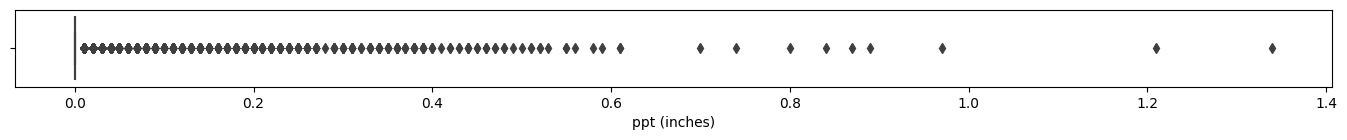

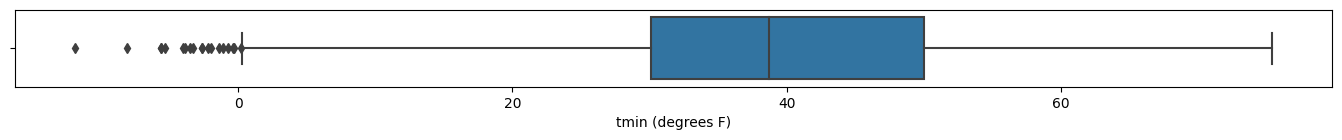

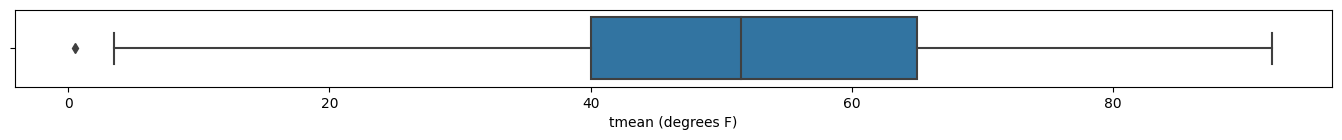

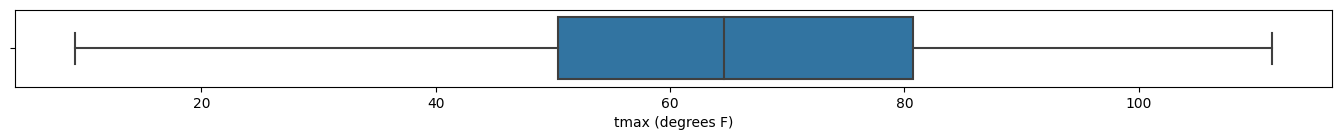

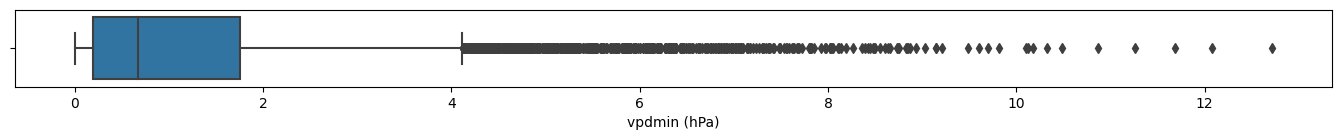

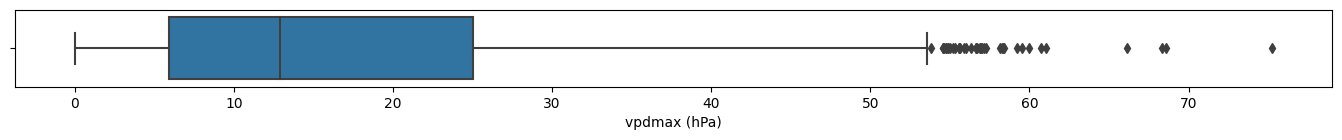

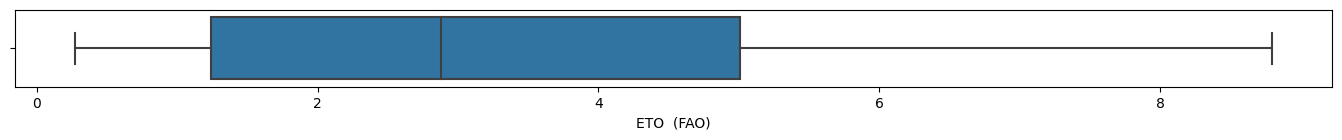

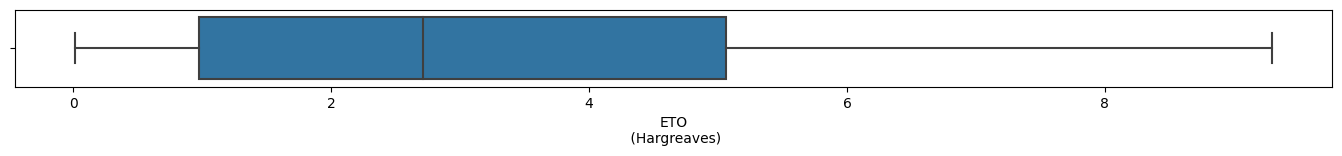

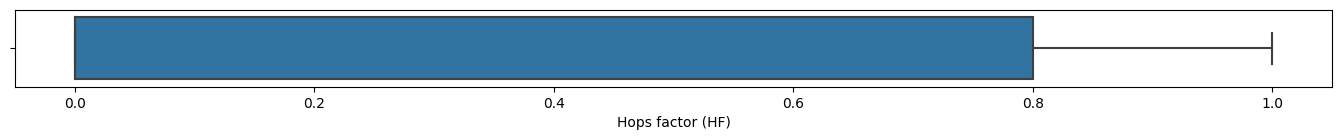

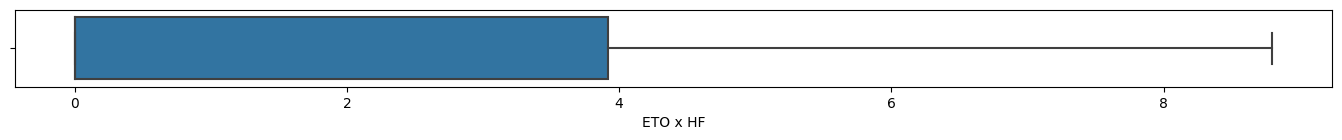

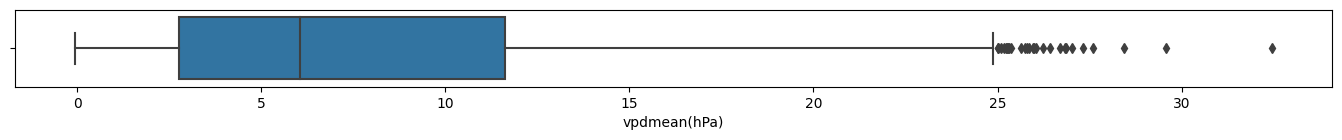

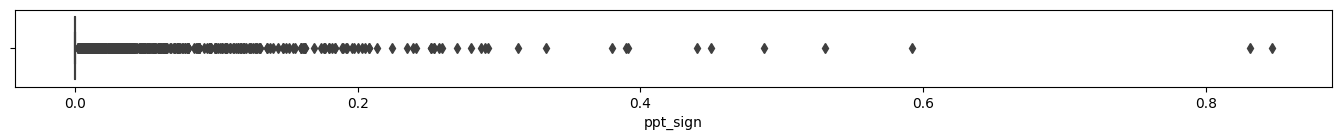

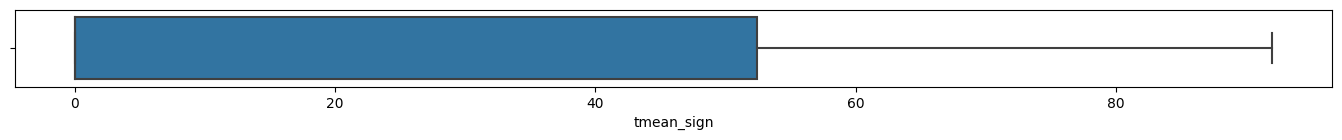

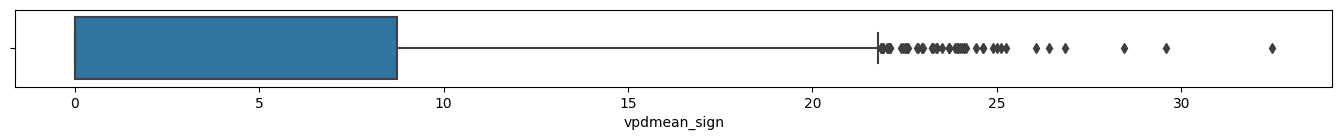

In [928]:
df_climate_WA['Date'] = pd.to_datetime(df_climate_WA['Date'])
df_climate_WA=df_climate_WA.set_index("Date")
#Now we will check the outliers with the help of box plot
for column in df_climate_WA:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=df_climate_WA, x=column)

As you can clearly see the ppt and vpdmin are filled with outliers we will see a way to tackle them


In [929]:
#To count number of outliers and percentage
import pandas as pd
import numpy as np

# Calculate the Z-score for each variable
z_scores = np.abs((df_climate_WA - df_climate_WA.mean()) / df_climate_WA.std())

# Define a threshold for outliers (e.g., Z-score > 3)
threshold = 3

# Count the number of outliers and calculate the percentage for each variable
outliers_count = {}
outliers_percentage = {}

for column in df_climate_WA.columns:
    outliers_count[column] = len(z_scores[z_scores[column] > threshold])
    outliers_percentage[column] = outliers_count[column] / len(df_climate_WA) * 100

# Print the results
for column in df_climate_WA.columns:
    print("Variable:", column)
    print("Number of outliers:", outliers_count[column])
    print("Percentage of outliers: {:.2f}%".format(outliers_percentage[column]))
    print()

Variable: ppt (inches)
Number of outliers: 195
Percentage of outliers: 2.25%

Variable: tmin (degrees F)
Number of outliers: 20
Percentage of outliers: 0.23%

Variable: tmean (degrees F)
Number of outliers: 2
Percentage of outliers: 0.02%

Variable: tmax (degrees F)
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: vpdmin (hPa)
Number of outliers: 200
Percentage of outliers: 2.31%

Variable: vpdmax (hPa)
Number of outliers: 23
Percentage of outliers: 0.27%

Variable: ETO  (FAO)
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: ЕТО
 (Hargreaves)
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: Hops factor (HF)
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: ETO x HF
Number of outliers: 1
Percentage of outliers: 0.01%

Variable: vpdmean(hPa)
Number of outliers: 18
Percentage of outliers: 0.21%

Variable: ppt_sign
Number of outliers: 125
Percentage of outliers: 1.44%

Variable: tmean_sign
Number of outliers: 0
Percentage of outliers: 

In [930]:
for column in df_climate_WA.columns:
  if column not in ['ppt (inches)', 'ppt_sign']:
    q1 = df_climate_WA[column].quantile(0.25)
    q2 = df_climate_WA[column].quantile(0.75)
    IQR = q2 - q1
    max_limit = q2 + (1.5 * IQR)
    min_limit = q1 - (1.5 * IQR)
    percentile25 = df_climate_WA[column].quantile(0.25)
    percentile75 = df_climate_WA[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df_climate_WA[column] = np.where(
        df_climate_WA[column] > upper_limit,
        upper_limit,
        np.where(
            df_climate_WA[column] < lower_limit,
            lower_limit,
            df_climate_WA[column]))

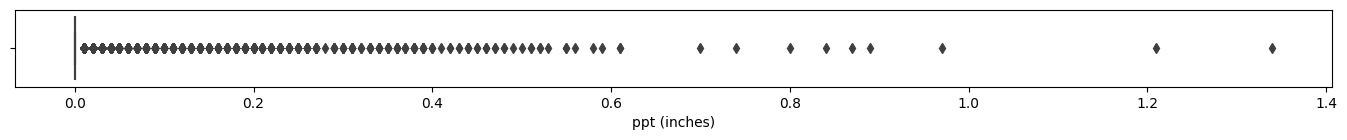

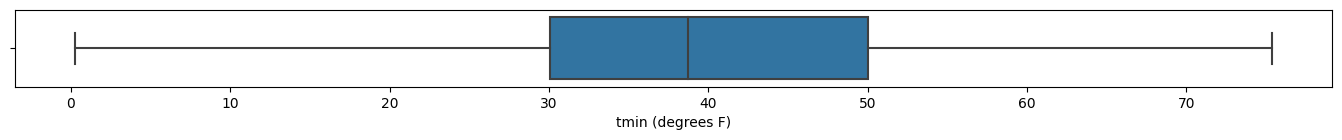

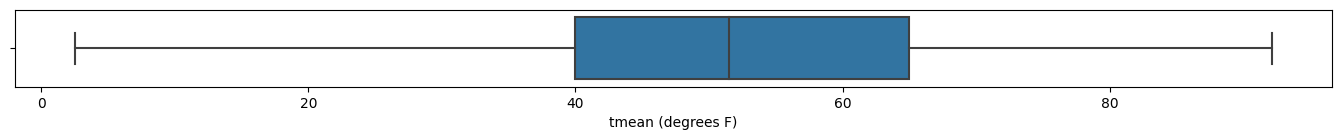

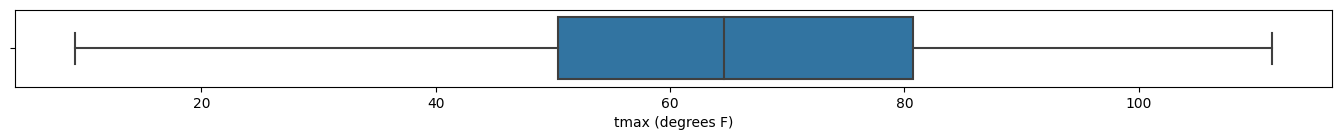

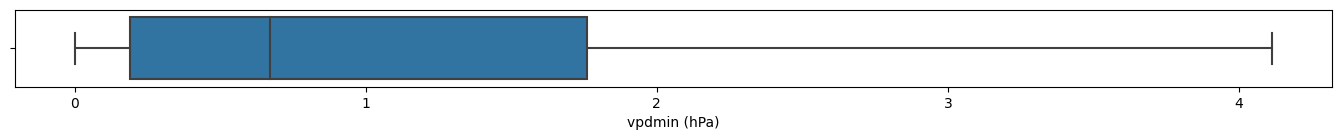

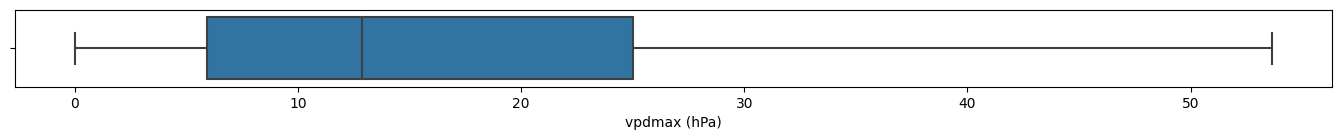

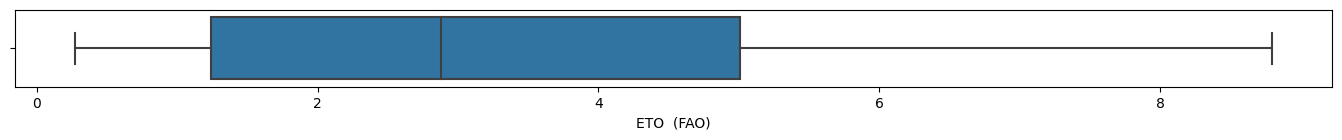

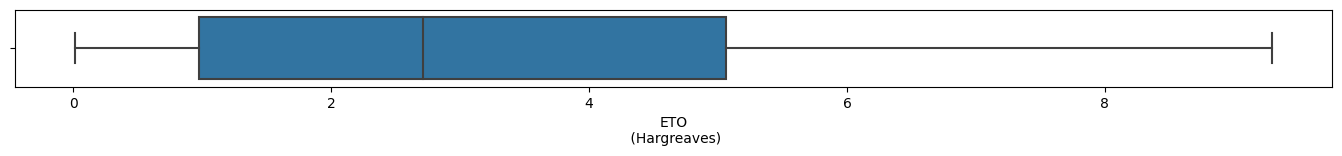

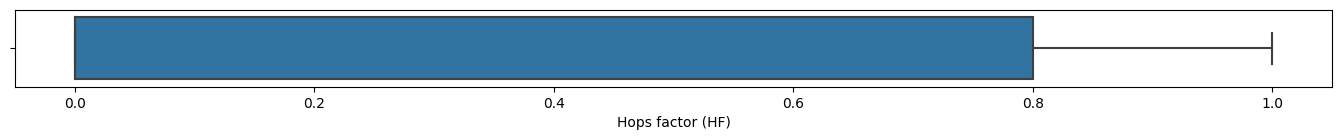

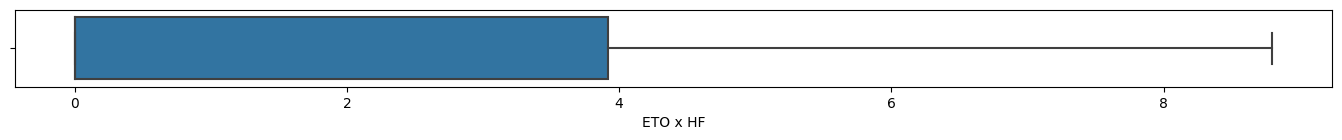

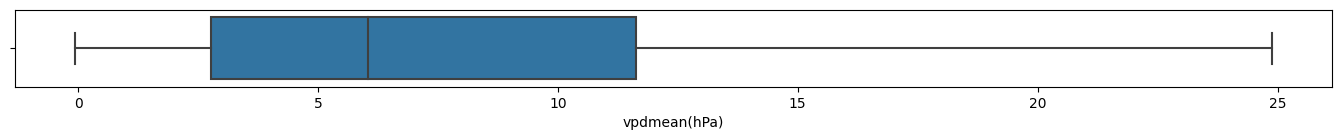

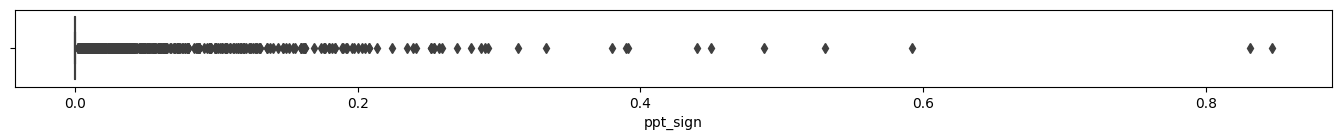

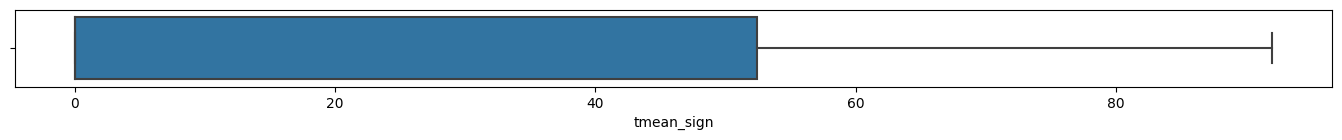

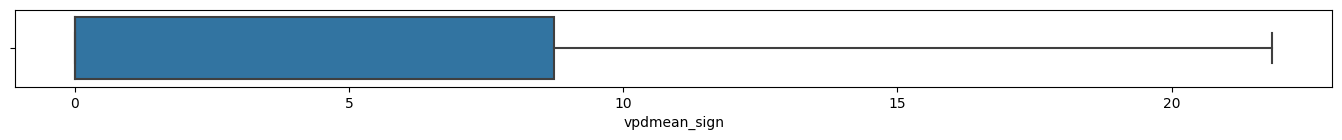

In [931]:
#after removing
for column in df_climate_WA:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=df_climate_WA, x=column)

In [932]:
df_climate_WA.describe([.01,.02,.03,.05,.10,.25,.5,.75,.95,.97,.98,.99])

ppt (inches)  tmin (degrees F)  tmean (degrees F)  tmax (degrees F)  \
count   8674.000000       8674.000000        8674.000000       8674.000000   
mean       0.019783         39.632459          52.160537         64.703816   
std        0.065373         12.978944          15.853847         19.349912   
min        0.000000          0.250000           2.500000          9.200000   
1%         0.000000         10.173000          18.346000         24.473000   
2%         0.000000         13.546000          21.900000         28.046000   
3%         0.000000         16.000000          24.100000         29.819000   
5%         0.000000         19.800000          27.300000         32.465000   
10%        0.000000         24.100000          31.800000         37.630000   
25%        0.000000         30.100000          40.000000         50.400000   
50%        0.000000         38.700000          51.500000         64.600000   
75%        0.000000         50.000000          65.000000         80.700000   
95%        0.130000         60.600000          77.500000         94.700000   
97%        0.190000         62.581000          79.200000         96.800000   
98%        0.230000         63.900000          80.400000         98.100000   
99%        0.330000         65.900000          82.100000         99.727000   
max        1.340000         75.400000          92.200000        111.400000   

       vpdmin (hPa)  vpdmax (hPa)   ETO  (FAO)  ЕТО\n (Hargreaves)  \
count   8674.000000   8674.000000  8674.000000         8674.000000   
mean       1.182589     16.475841     3.194839            3.104931   
std        1.260828     13.119635     2.067344            2.237528   
min        0.000000      0.000000     0.270000            0.010000   
1%         0.000000      0.200000     0.450000            0.200000   
2%         0.000000      0.370000     0.490000            0.230000   
3%         0.010000      0.510000     0.510000            0.260000   
5%         0.020000      0.796500     0.550000            0.310000   
10%        0.050000      1.770000     0.690000            0.460000   
25%        0.190000      5.940000     1.240000            0.970000   
50%        0.670000     12.890000     2.880000            2.710000   
75%        1.760000     25.030000     5.007500            5.060000   
95%        4.115000     42.470000     6.650000            6.893500   
97%        4.115000     45.788100     6.950000            7.200000   
98%        4.115000     47.651600     7.115400            7.410000   
99%        4.115000     50.881600     7.370000            7.662700   
max        4.115000     53.665000     8.800000            9.300000   

       Hops factor (HF)     ETO x HF  vpdmean(hPa)     ppt_sign   tmean_sign  \
count       8674.000000  8674.000000   8674.000000  8674.000000  8674.000000   
mean           0.332442     1.785014      7.593020     0.004019    22.225968   
std            0.391249     2.284051      5.962606     0.027611    27.382028   
min            0.000000     0.000000     -0.070000     0.000000     0.000000   
1%             0.000000     0.000000      0.100000     0.000000     0.000000   
2%             0.000000     0.000000      0.155000     0.000000     0.000000   
3%             0.000000     0.000000      0.205950     0.000000     0.000000   
5%             0.000000     0.000000      0.355000     0.000000     0.000000   
10%            0.000000     0.000000      0.801500     0.000000     0.000000   
25%            0.000000     0.000000      2.770000     0.000000     0.000000   
50%            0.000000     0.000000      6.045000     0.000000     0.000000   
75%            0.800000     3.921200     11.620000     0.000000    52.400000   
95%            0.990000     6.030000     19.110000     0.012000    68.716100   
97%            1.000000     6.436966     20.519300     0.033600    72.094680   
98%            1.000000     6.705400     21.515000     0.059216    74.787120   
99%            1.000000     7.080000     23.000400     0.1129

In [933]:
df_climate_WA

ppt (inches)  tmin (degrees F)  tmean (degrees F)  \
Date                                                            
1999-01-01           0.0              31.1               42.9   
1999-01-02           0.0              26.0               35.2   
1999-01-03           0.0              23.3               33.9   
1999-01-04           0.0              21.1               29.0   
1999-01-05           0.0              24.8               27.8   
...                  ...               ...                ...   
2022-09-26           0.0              45.9               64.5   
2022-09-27           0.0              47.6               66.5   
2022-09-28           0.0              48.7               67.2   
2022-09-29           0.0              48.9               63.2   
2022-09-30           0.0              47.6               62.6   

            tmax (degrees F)  vpdmin (hPa)  vpdmax (hPa)  ETO  (FAO)  \
Date                                                                   
1999-01-01              54.7          0.20          7.68        1.10   
1999-01-02              44.4          0.28          4.51        0.82   
1999-01-03              44.4          0.20          4.64        0.86   
1999-01-04              36.9          0.13          1.95        0.67   
1999-01-05              30.8          0.08          0.41        0.49   
...                      ...           ...           ...         ...   
2022-09-26              83.1          0.26         27.59        3.94   
2022-09-27              85.5          1.17         29.88        4.06   
2022-09-28              85.7          0.66         30.07        4.00   
2022-09-29              77.5          0.60         21.98        3.24   
2022-09-30              77.5          0.56         21.99        3.26   

            ЕТО\n (Hargreaves)  Hops factor (HF)  ETO x HF  vpdmean(hPa)  \
Date                                                                       
1999-01-01                0.80               0.0       0.0         3.740   
1999-01-02                0.58               0.0       0.0         2.115   
1999-01-03                0.60               0.0       0.0         2.220   
1999-01-04                0.45               0.0       0.0         0.910   
1999-01-05                0.27               0.0       0.0         0.165   
...                        ...               ...       ...           ...   
2022-09-26                3.69               0.0       0.0        13.665   
2022-09-27                3.79               0.0       0.0        14.355   
2022-09-28                3.74               0.0       0.0        14.705   
2022-09-29                3.05               0.0       0.0        10.690   
2022-09-30                3.05               0.0       0.0        10.715   

            ppt_sign  tmean_sign  vpdmean_sign  
Date                                            
1999-01-01       0.0         0.0           0.0  
1999-01-02       0.0         0.0           0.0  
1999-01-03       0.0         0.0           0.0  
1999-01-04       0.0         0.0           0.0  
1999-01-05       0.0         0.0           0.0  
...              ...         ...           ...  
2022-09-26       0.0         0.0           0.0  
2022-09-27       0.0         0.0           0.0  
2022-09-28       0.0         0.0           0.0  
2022-09-29       0.0         0.0           0.0  
2022-09-30       0.0         0.0           0.0  

[8674 rows x 14 columns]

In [934]:
# Convert the index to a datetime format
df_climate_WA.index = pd.to_datetime(df_climate_WA.index)

# Resample the data to annual frequency with custom criteria
df_climate_WA = df_climate_WA.loc['1999-10-01':'2022-10-01'].resample('AS-OCT').mean()

# Set the index to year format
df_climate_WA = df_climate_WA.set_index(df_climate_WA.index.strftime('%Y'))

# Print the resulting DataFrame
df_climate_WA

ppt (inches)  tmin (degrees F)  tmean (degrees F)  tmax (degrees F)  \
Date                                                                        
1999      0.018115         40.339891          52.469126         64.599727   
2000      0.015753         39.603014          51.344110         63.086575   
2001      0.019014         40.026575          52.213699         64.396986   
2002      0.022027         41.110411          53.378630         65.647397   
2003      0.025164         40.689617          52.534973         64.425410   
2004      0.014904         39.601644          52.580822         65.560548   
2005      0.024740         40.156712          52.268493         64.377260   
2006      0.017836         39.155890          51.626849         64.097534   
2007      0.017404         38.455464          50.830328         63.210929   
2008      0.018493         38.956986          51.407671         63.866301   
2009      0.028849         39.333699          51.223288         63.114521   
2010      0.024082         38.858630          50.865479         62.899726   
2011      0.017377         38.404645          51.366667         64.327049   
2012      0.026603         41.208767          53.199452         65.187671   
2013      0.014466         38.884110          51.964932         65.056164   
2014      0.016137         41.404384          54.583562         67.755342   
2015      0.025219         39.969672          53.216120         66.462842   
2016      0.031781         38.291096          50.730959         63.245479   
2017      0.015205         39.021918          52.321370         65.620548   
2018      0.023808         38.159726          50.522740         62.902466   
2019      0.009891         38.468033          52.011749         65.559290   
2020      0.011233         40.294521          53.255068         66.392329   
2021      0.020712         39.184384          51.663836         64.148493   

      vpdmin (hPa)  vpdmax (hPa)  ETO  (FAO)  ЕТО\n (Hargreaves)  \
Date                                                               
1999      1.249098     15.299508    3.097678            3.004262   
2000      1.296438     15.757726    3.088603            3.002849   
2001      1.338685     15.485452    3.091342            3.002137   
2002      1.241356     16.346425    3.185753            3.097452   
2003      1.064891     15.285847    3.122923            3.038607   
2004      1.150671     16.194233    3.210411            3.113507   
2005      1.011904     15.483342    3.159479            3.079671   
2006      0.987164     15.644781    3.167370            3.080356   
2007      1.010150     15.181639    3.073197            2.980519   
2008      1.352507     16.876740    3.172712            3.084192   
2009      1.168068     14.858877    3.017808            2.926027   
2010      1.452301     15.280685    3.028712            2.929973   
2011      1.563579     16.717008    3.163060            3.062869   
2012      1.450822     16.610548    3.173041            3.089808   
2013      1.320123     17.305740    3.277068            3.184329   
2014      1.168466     18.513603    3.421397            3.335342   
2015      0.771981     17.623238    3.338852            3.242350   
2016      0.883425     16.700342    3.200000            3.115808   
2017      0.978945     17.984712    3.312603            3.215425   
2018      0.678753     15.857781    3.139699            3.042767   
2019      1.093005     17.544085    3.272131            3.164863   
2020      1.504945     18.886041    3.326849            3.239425   
2021      1.082397     16.837384    3.148959            3.051397   

      Hops factor (HF)  ETO x HF  vpdmean(hPa)  ppt_sign  tmean_sign  \
Date                                                                   
1999          0.328279  1.689745      6.976120  0.002748   21.583557   
2000          0.329178  1.721890      7.129260  0.004032   22.013236   
2001          0.329178  1.709132      7.001959  0.003650   21.945367   
2002          0.329

In [935]:
#df_climate_WA['Date'] = pd.to_datetime(df_climate_WA['Date'])
#df_climate_WA=df_climate_WA.set_index("Date")
# Then we will resample to change it from daily to monthlly freqency and taking the mean of that month
#df_climate_WA=df_climate_WA.resample('Y', on='Date').mean()
#df_climate_WA=df_climate_WA.set_index(df_climate_WA.index.strftime('%Y'))
df_climate_WA

ppt (inches)  tmin (degrees F)  tmean (degrees F)  tmax (degrees F)  \
Date                                                                        
1999      0.018115         40.339891          52.469126         64.599727   
2000      0.015753         39.603014          51.344110         63.086575   
2001      0.019014         40.026575          52.213699         64.396986   
2002      0.022027         41.110411          53.378630         65.647397   
2003      0.025164         40.689617          52.534973         64.425410   
2004      0.014904         39.601644          52.580822         65.560548   
2005      0.024740         40.156712          52.268493         64.377260   
2006      0.017836         39.155890          51.626849         64.097534   
2007      0.017404         38.455464          50.830328         63.210929   
2008      0.018493         38.956986          51.407671         63.866301   
2009      0.028849         39.333699          51.223288         63.114521   
2010      0.024082         38.858630          50.865479         62.899726   
2011      0.017377         38.404645          51.366667         64.327049   
2012      0.026603         41.208767          53.199452         65.187671   
2013      0.014466         38.884110          51.964932         65.056164   
2014      0.016137         41.404384          54.583562         67.755342   
2015      0.025219         39.969672          53.216120         66.462842   
2016      0.031781         38.291096          50.730959         63.245479   
2017      0.015205         39.021918          52.321370         65.620548   
2018      0.023808         38.159726          50.522740         62.902466   
2019      0.009891         38.468033          52.011749         65.559290   
2020      0.011233         40.294521          53.255068         66.392329   
2021      0.020712         39.184384          51.663836         64.148493   

      vpdmin (hPa)  vpdmax (hPa)  ETO  (FAO)  ЕТО\n (Hargreaves)  \
Date                                                               
1999      1.249098     15.299508    3.097678            3.004262   
2000      1.296438     15.757726    3.088603            3.002849   
2001      1.338685     15.485452    3.091342            3.002137   
2002      1.241356     16.346425    3.185753            3.097452   
2003      1.064891     15.285847    3.122923            3.038607   
2004      1.150671     16.194233    3.210411            3.113507   
2005      1.011904     15.483342    3.159479            3.079671   
2006      0.987164     15.644781    3.167370            3.080356   
2007      1.010150     15.181639    3.073197            2.980519   
2008      1.352507     16.876740    3.172712            3.084192   
2009      1.168068     14.858877    3.017808            2.926027   
2010      1.452301     15.280685    3.028712            2.929973   
2011      1.563579     16.717008    3.163060            3.062869   
2012      1.450822     16.610548    3.173041            3.089808   
2013      1.320123     17.305740    3.277068            3.184329   
2014      1.168466     18.513603    3.421397            3.335342   
2015      0.771981     17.623238    3.338852            3.242350   
2016      0.883425     16.700342    3.200000            3.115808   
2017      0.978945     17.984712    3.312603            3.215425   
2018      0.678753     15.857781    3.139699            3.042767   
2019      1.093005     17.544085    3.272131            3.164863   
2020      1.504945     18.886041    3.326849            3.239425   
2021      1.082397     16.837384    3.148959            3.051397   

      Hops factor (HF)  ETO x HF  vpdmean(hPa)  ppt_sign  tmean_sign  \
Date                                                                   
1999          0.328279  1.689745      6.976120  0.002748   21.583557   
2000          0.329178  1.721890      7.129260  0.004032   22.013236   
2001          0.329178  1.709132      7.001959  0.003650   21.945367   
2002          0.329

As you can see the mean of ppt and vpdmin is reduced and the max value is less than the threshold

In [936]:
#now we will check the corrleation between the data
#since the data is continous we willl be using pearson correaltion method
df_climate_WA.corr()

ppt (inches)  tmin (degrees F)  tmean (degrees F)  \
ppt (inches)            1.000000          0.071109          -0.228471   
tmin (degrees F)        0.071109          1.000000           0.860472   
tmean (degrees F)      -0.228471          0.860472           1.000000   
tmax (degrees F)       -0.415527          0.594713           0.921039   
vpdmin (hPa)           -0.312942          0.251488           0.172751   
vpdmax (hPa)           -0.453356          0.124241           0.533218   
ETO  (FAO)             -0.401162          0.238534           0.659773   
ЕТО\n (Hargreaves)     -0.377132          0.274570           0.677082   
Hops factor (HF)        0.117928          0.098977          -0.001682   
ETO x HF               -0.234836          0.048505           0.410566   
vpdmean(hPa)           -0.379230          0.053941           0.484936   
ppt_sign                0.588184          0.156417          -0.169868   
tmean_sign             -0.166319          0.515986           0.603187   
vpdmean_sign           -0.226414         -0.067966           0.306295   

                    tmax (degrees F)  vpdmin (hPa)  vpdmax (hPa)  ETO  (FAO)  \
ppt (inches)               -0.415527     -0.312942     -0.453356   -0.401162   
tmin (degrees F)            0.594713      0.251488      0.124241    0.238534   
tmean (degrees F)           0.921039      0.172751      0.533218    0.659773   
tmax (degrees F)            1.000000      0.086097      0.755450    0.862903   
vpdmin (hPa)                0.086097      1.000000      0.081385   -0.138866   
vpdmax (hPa)                0.755450      0.081385      1.000000    0.918421   
ETO  (FAO)                  0.862903     -0.138866      0.918421    1.000000   
ЕТО\n (Hargreaves)          0.863180     -0.135127      0.909782    0.997910   
Hops factor (HF)           -0.074662      0.107262      0.092449    0.024744   
ETO x HF                    0.618029     -0.267058      0.847632    0.905375   
vpdmean(hPa)                0.731228     -0.156828      0.970900    0.942965   
ppt_sign                   -0.393751      0.123275     -0.544195   -0.567919   
tmean_sign                  0.565382      0.030321      0.537454    0.641108   
vpdmean_sign                0.543506     -0.311152      0.871098    0.858911   

                    ЕТО\n (Hargreaves)  Hops factor (HF)  ETO x HF  \
ppt (inches)                 -0.377132          0.117928 -0.234836   
tmin (degrees F)              0.274570          0.098977  0.048505   
tmean (degrees F)             0.677082         -0.001682  0.410566   
tmax (degrees F)              0.863180         -0.074662  0.618029   
vpdmin (hPa)                 -0.135127          0.107262 -0.267058   
vpdmax (hPa)                  0.909782          0.092449  0.847632   
ETO  (FAO)                    0.997910          0.024744  0.905375   
ЕТО\n (Hargreaves)            1.000000          0.049488  0.912389   
Hops factor (HF)              0.049488          1.000000  0.250116   
ETO x HF                      0.912389          0.250116  1.000000   
vpdmean(hPa)                  0.931984          0.054296  0.899338   
ppt_sign                     -0.557728         -0.012865 -0.595637   
tmean_sign                    0.682769          0.384406  0.706165   
vpdmean_sign                  0.856861          0.217703  0.964079   

                    vpdmean(hPa)  ppt_sign  tmean_sign  vpdmean_sign  
ppt (inches)           -0.379230  0.588184   -0.166319     -0.226414  
tmin (degrees F)        0.053941  0.156417    0.515986     -0.067966  
tmean (degrees F)       0.484936 -0.169868    0.603187      0.306295  
tmax (degrees F)        0.731228 -0.393751    0.565382      0.543506  
vpdmin (hPa)           -0.156828  0.123275    0.030321     -0.311152  
vpdmax (hPa)            0.970900 -0.544195    0.537454      0.871098  
ETO  (FAO)              0.942965 -0.567919    0.641108      0.858911  
ЕТО\n (Hargreaves)      0.931984 -0.557728    0.682769      0.856861  
Hops factor (HF)        0.054296 

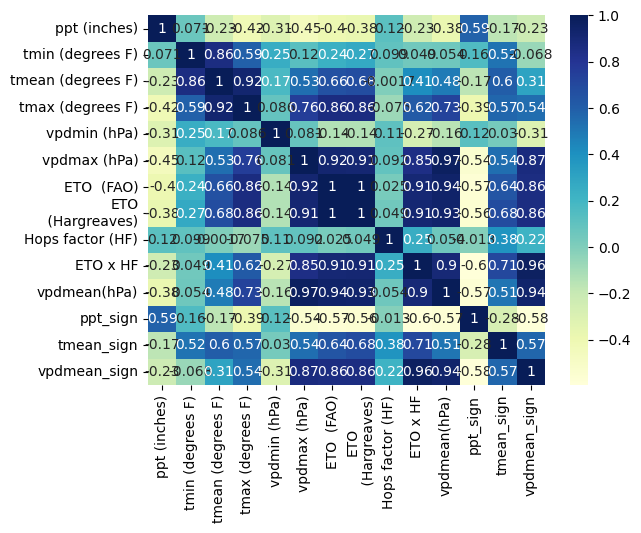

In [937]:
dataplot = sns.heatmap(df_climate_WA.corr(), cmap="YlGnBu", annot=True)

In [938]:
df_climate_WA_model=df_climate_WA[["ETO x HF","ppt_sign","tmean_sign","vpdmean_sign","Hops factor (HF)"]]
df_climate_WA_model

ETO x HF  ppt_sign  tmean_sign  vpdmean_sign  Hops factor (HF)
Date                                                                
1999  1.689745  0.002748   21.583557      3.849864          0.328279
2000  1.721890  0.004032   22.013236      4.089302          0.329178
2001  1.709132  0.003650   21.945367      3.935121          0.329178
2002  1.771316  0.002636   22.361967      4.293629          0.329178
2003  1.704080  0.007991   22.225839      3.884074          0.328279
2004  1.760110  0.003987   21.962578      4.210651          0.329178
2005  1.795239  0.005011   22.505405      4.286728          0.329178
2006  1.765571  0.002814   22.245605      4.113884          0.329178
2007  1.706081  0.003226   21.509760      4.068264          0.328279
2008  1.778993  0.003073   22.242956      4.373192          0.329178
2009  1.665949  0.007839   21.254277      3.843272          0.329178
2010  1.675831  0.005455   21.142638      3.814277          0.329178
2011  1.743993  0.005151   21.638396      4.171830          0.328279
2012  1.751685  0.008516   22.466559      4.174149          0.329178
2013  1.836537  0.002612   22.352907      4.537207          0.329178
2014  1.909986  0.002663   22.869063      4.929366          0.329178
2015  1.823169  0.002693   21.746393      4.633975          0.328279
2016  1.863304  0.002742   22.240542      4.843802          0.329178
2017  1.862615  0.001597   22.174595      4.905442          0.329178
2018  1.803625  0.004452   21.919359      4.575976          0.329178
2019  1.799564  0.002455   21.764617      4.546349          0.328279
2020  1.863511  0.000819   22.661323      4.854718          0.329178
2021  1.750944  0.005857   21.687014      4.436792          0.329178

In [939]:
df_climate_WA_model.index

Index(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021'],
      dtype='object', name='Date')

### Modeling of Climate Data

In [940]:
MergeData_df_WA = (new_df_average_yield_WA.merge(df_climate_WA_model, left_on='Year', right_on='Date').reindex(columns=['Variety',"Total Acre","Hops factor (HF)", "Year",'Average Yield', 'ppt_sign', 'vpdmean_sign',"tmean_sign","ETO x HF","Moving Avg Yield"]))
dropped_values_total_acre = MergeData_df_WA[MergeData_df_WA['Total Acre'] == 0].shape[0]
dropped_values_variety = MergeData_df_WA[MergeData_df_WA['Variety'] == 'Total'].shape[0]
print("Number of dropped values due to 'Total Acre' being 0:", dropped_values_total_acre)
print("Number of dropped values due to 'Variety' being 'Total':",   dropped_values_variety)

Number of dropped values due to 'Total Acre' being 0: 779
Number of dropped values due to 'Variety' being 'Total': 22


In [941]:
MergeData_df_WA = MergeData_df_WA[MergeData_df_WA['Total Acre'] != 0]
MergeData_df_WA = MergeData_df_WA[MergeData_df_WA['Variety'] != 'Total']

MergeData_df_WA.describe()
MergeData_df_WA

Variety  Total Acre  Hops factor (HF)  Year  \
5     CTZ - Columbus/Tomahawk/Zeus      6588.0          0.329178  2000   
7                          Cascade       996.0          0.329178  2000   
11                         Chinook       670.0          0.329178  2000   
13                         Cluster       939.0          0.329178  2000   
20                          Galena      5044.0          0.329178  2000   
...                            ...         ...               ...   ...   
1286                        Summit       437.0          0.329178  2021   
1287                  Super Galena       480.0          0.329178  2021   
1288                        Tahoma       388.0          0.329178  2021   
1295                Warrior, YCR 5       128.0          0.329178  2021   
1296                    Willamette       132.0          0.329178  2021   

      Average Yield  ppt_sign  vpdmean_sign  tmean_sign  ETO x HF  \
5            2605.0  0.004032      4.089302   22.013236  1.721890   
7            1806.0  0.004032      4.089302   22.013236  1.721890   
11           1957.0  0.004032      4.089302   22.013236  1.721890   
13           1997.0  0.004032      4.089302   22.013236  1.721890   
20           1891.0  0.004032      4.089302   22.013236  1.721890   
...             ...       ...           ...         ...       ...   
1286         1351.0  0.005857      4.436792   21.687014  1.750944   
1287         2849.0  0.005857      4.436792   21.687014  1.750944   
1288         1055.0  0.005857      4.436792   21.687014  1.750944   
1295         2240.0  0.005857      4.436792   21.687014  1.750944   
1296         1200.0  0.005857      4.436792   21.687014  1.750944   

      Moving Avg Yield  
5             0.000000  
7             0.000000  
11            0.000000  
13            0.000000  
20            0.000000  
...                ...  
1286       1421.000000  
1287       2785.333333  
1288       1533.666667  
1295       1303.000000  
1296       1418.000000  

[497 rows x 10 columns]

In [942]:
MergeData_df_WA = MergeData_df_WA.rename(columns={'Year': 'ds',
                        'Average Yield': 'y'})

In [943]:
lst_year = MergeData_df_WA['ds'].unique()
lst_year.sort()
num_train_years = 0.7 * len(MergeData_df_WA['ds'].unique())
train_years = lst_year[0:int(num_train_years + 1)]
test_years = list(set(lst_year) - set(train_years))


In [944]:
df_train = MergeData_df_WA.loc[MergeData_df_WA['ds'].isin(train_years)]
df_test = MergeData_df_WA.loc[MergeData_df_WA['ds'].isin(test_years)]

In [945]:
y_train = df_train['y'].values
x_train = df_train.drop(columns= ['y','ds','Variety'], axis=1).values
y_test = df_test['y'].values
x_test = df_test.drop(columns=['y','ds','Variety'], axis=1).values

In [946]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_vals=rfr.predict(x_test)
pred_train = rfr.predict(x_train)
rfr_test= rfr.score(x_test,y_test)
rfr_train= rfr.score(x_train,y_train)
print(rfr_test,rfr_train)

0.5643332059046828 0.9349283196207395


R-squared scores - Test:  0.5518892684864392
R-squared scores - Train:  0.9346104206663048


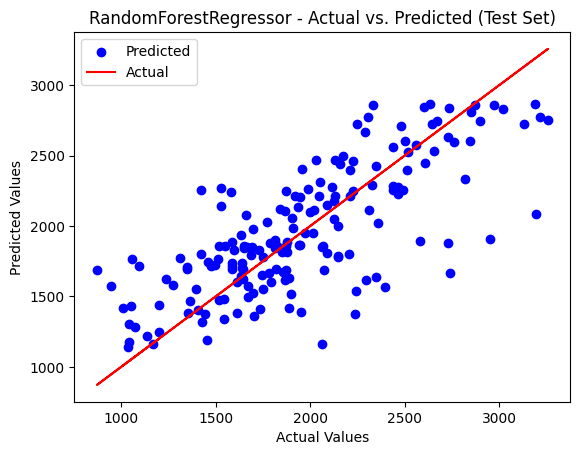

R-squared:  0.5518892684864392


In [947]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create a RandomForestRegressor model
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

# Make predictions on the test set
rfr_vals = rfr.predict(x_test)
pred_train = rfr.predict(x_train)

# Calculate R-squared scores
rfr_test = rfr.score(x_test, y_test)
rfr_train = rfr.score(x_train, y_train)
print("R-squared scores - Test: ", rfr_test)
print("R-squared scores - Train: ", rfr_train)

# Plot predicted vs. actual values for test set
plt.scatter(y_test, rfr_vals, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RandomForestRegressor - Actual vs. Predicted (Test Set)')
plt.legend()
plt.show()

# Plot feature importances
importances = rfr.feature_importances_
num_features = x_train.shape[1]
indices = np.argsort(importances)




# Calculate and print R-squared score
r2 = r2_score(y_test, rfr_vals)
print("R-squared: ", r2)

<Figure size 1000x600 with 0 Axes>

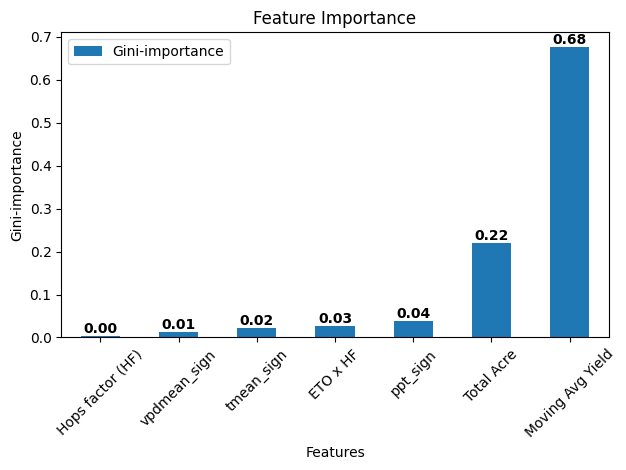

In [948]:
feats = {}

for feature, importance in zip(df_train.drop(columns=['y', 'ds', 'Variety'], axis=1).columns, rfr.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances_sorted = importances.sort_values(by='Gini-importance')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = importances_sorted.plot(kind='bar', rot=45)
plt.xlabel('Features')
plt.ylabel('Gini-importance')
plt.title('Feature Importance')

for i, v in enumerate(importances_sorted['Gini-importance']):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


Test Statistic

In [949]:
import math
from sklearn.metrics import mean_absolute_error
MSE = np.square(np.subtract(y_test, rfr_vals)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n", RMSE)
print("Mean Absolute Error:\n", mean_absolute_error(y_test, rfr_vals))

Root Mean Square Error:
 347.37466224961446
Mean Absolute Error:
 261.03292134831463


Train Statistic

In [950]:
import math
from sklearn.metrics import mean_absolute_error
MSE = np.square(np.subtract(y_train, pred_train)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n", RMSE)
print("Mean Absolute Error:\n", mean_absolute_error(y_train, pred_train))

Root Mean Square Error:
 143.08376512928945
Mean Absolute Error:
 96.93677115987461


In [951]:
#linear
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_vals=lr.predict(x_test)
lr_test= lr.score(x_test,y_test)
lr_train= lr.score(x_train,y_train)
print(lr_test,lr_train)

0.38145389746431846 0.4635374745960956


In [952]:
df_train.drop(columns= ['y','ds','Variety'], axis=1).columns

df_test.drop(columns=['y','ds','Variety'], axis=1).columns

Index(['Total Acre', 'Hops factor (HF)', 'ppt_sign', 'vpdmean_sign',
       'tmean_sign', 'ETO x HF', 'Moving Avg Yield'],
      dtype='object')

In [953]:
coefficients = lr.coef_
coefficients

array([ 4.07892279e-02,  1.51521606e+05, -5.29536679e+04,  4.89453691e+02,
        1.11124326e+02, -4.84713045e+03,  4.92817889e-01])

Test Statistic

In [954]:
import math
from sklearn.metrics import mean_absolute_error
MSE = np.square(np.subtract(y_test, lr_vals)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n", RMSE)
print("Mean Absolute Error:\n", mean_absolute_error(y_test, lr_vals))

Root Mean Square Error:
 408.12340614552016
Mean Absolute Error:
 331.69215399086187


Train Statistic

In [955]:
import math
from sklearn.metrics import mean_absolute_error
MSE = np.square(np.subtract(y_train, pred_train)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n", RMSE)
print("Mean Absolute Error:\n", mean_absolute_error(y_train, pred_train))

Root Mean Square Error:
 143.08376512928945
Mean Absolute Error:
 96.93677115987461


In [956]:
#######FORECASTING########
import pandas as pd
from prophet import Prophet


# Read the data into a DataFrame
df = MergeData_df_WA

# Prepare the DataFrame for Prophet
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(df['ds'])
df_prophet['y'] = df['y']
df_prophet['Variety'] = df['Variety']

# Initialize and fit the Prophet model for each variety
forecasts = []
for variety in df_prophet['Variety'].unique():
    df_variety = df_prophet[df_prophet['Variety'] == variety]

    # Check if the variety has sufficient data
    if df_variety['y'].notnull().sum() >= 2:
        # Fill missing values with the mean of available values
        df_variety = df_variety.fillna(df_variety['y'].mean())

        model = Prophet()
        model.fit(df_variety)

        future_dates = pd.DataFrame({'ds': pd.to_datetime(['2023-12-31'])})

        forecast = model.predict(future_dates)
        forecast['Variety'] = variety
        forecast = forecast[['ds', 'Variety', 'yhat']]

        # Set negative values to zero
        forecast['yhat'] = np.where(forecast['yhat'] < 0, 0, forecast['yhat'])

        forecasts.append(forecast)

# Combine the forecasts for all varieties into a single DataFrame
forecast_all = pd.concat(forecasts)

# Filter out varieties with zero yield forecast
forecast_all = forecast_all[forecast_all['yhat'] != 0]

# Rename the columns to match the original DataFrame
forecast_all = forecast_all.rename(columns={'ds': 'Year', 'yhat': 'Average Yield per acre'})

# Convert the 'Year' column to the desired format
forecast_all['Year'] = forecast_all['Year'].dt.year

# Print the forecast for 2023 for all varieties
forecast_all


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3caqst12/p33ptxqx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3caqst12/bifot6uk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94995', 'data', 'file=/tmp/tmp3caqst12/p33ptxqx.json', 'init=/tmp/tmp3caqst12/bifot6uk.json', 'output', 'file=/tmp/tmp3caqst12/prophet_modelutzte40e/prophet_model-20230620185934.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:59:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:59:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Year                       Variety  Average Yield per acre
0  2023  CTZ - Columbus/Tomahawk/Zeus             1512.532035
0  2023                       Cascade             1340.622829
0  2023                       Chinook             1074.978204
0  2023                       Cluster             1962.946717
0  2023                        Galena             1536.666639
0  2023                       Golding             1018.832782
0  2023                       Horizon             2670.144151
0  2023                        Magnum             1366.929668
0  2023                       Mt Hood             1172.948247
0  2023                        Nugget             1475.320942
0  2023                         Perle             2828.416350
0  2023                    Willamette             1534.812547
0  2023                        Chelan             3154.899941
0  2023                   Hallertauer              110.368086
0  2023                     Millenium             2261.403447
0  2023               Northern Brewer             1781.047350
0  2023                    Tettnanger              933.551859
0  2023                      Vanguard              971.444279
0  2023                Warrior, YCR 5             1819.333575
0  2023                Ahtanum, YCR 1             2066.028197
0  2023                    Centennial             1454.335844
0  2023                       Glacier             1169.662104
0  2023               Palisade, YCR 4             2130.585968
0  2023                        Summit              718.913948
0  2023                        Apollo              900.443850
0  2023                         Bravo             1802.691959
0  2023                Simcoe, YCR 14             1731.303667
0  2023                  Super Galena              947.043584
0  2023                Citra, HBC 394             1500.303547
0  2023                       Crystal             2518.995758
0  2023                     El Dorado             1143.516824
0  2023                        Mosaic             2136.255692
0  2023              Azacca, ADHA-483             1195.498904
0  2023             Jarrylo, ADHA-881              609.540564
0  2023              Amarillo, VGXP01             1295.000759
0  2023              Ekuanot, HBC 366              549.682575
0  2023                       Eureka!             2578.016307
0  2023                Loral, HBC 369             1250.158315
0  2023                        Tahoma             1128.733097
0  2023                      Cashmere             1401.706913
0  2023                    Mt Rainier              975.050010
0  2023                Pahto, HBC 682             1821.313478
0  2023                       Idaho 7             2544.017749
0  2023                Sabro, HBC 438             2981.368094

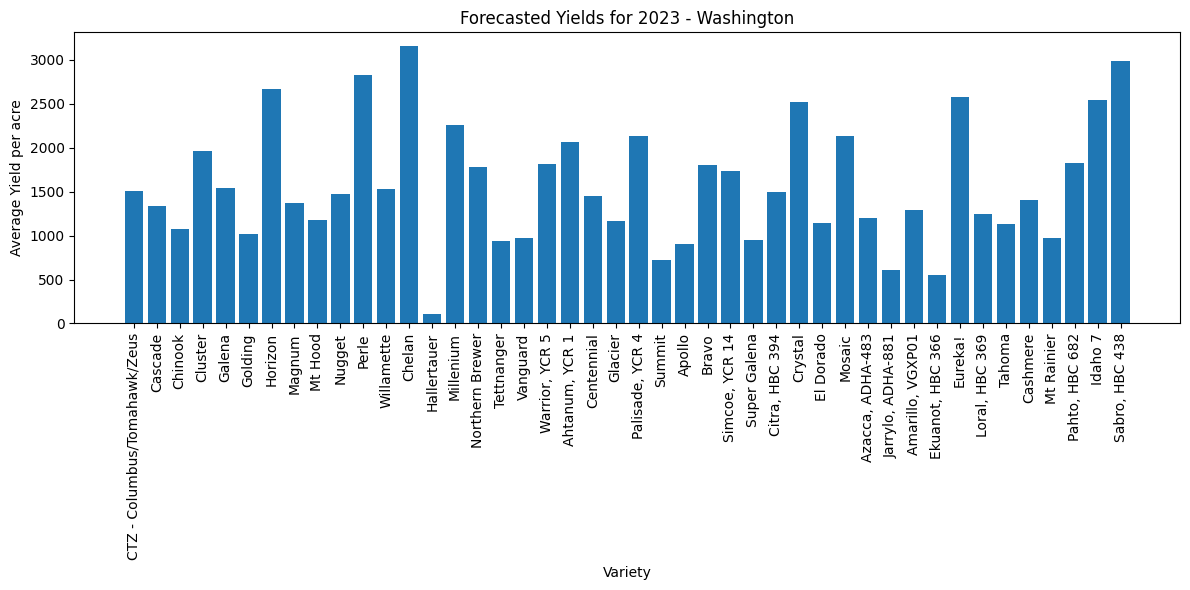

In [957]:
import matplotlib.pyplot as plt

# Plot the forecasted yields for 2023
plt.figure(figsize=(12, 6))
plt.bar(forecast_all['Variety'], forecast_all['Average Yield per acre'])
plt.xlabel('Variety')
plt.ylabel('Average Yield per acre')
plt.title('Forecasted Yields for 2023 - Washington')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-958-f32cb00f9e4c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_forecast['Year'] = variety_forecast['Year'].astype(int)
<ipython-input-958-f32cb00f9e4c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_data['ds'] = variety_data['ds'].dt.year.astype(int)


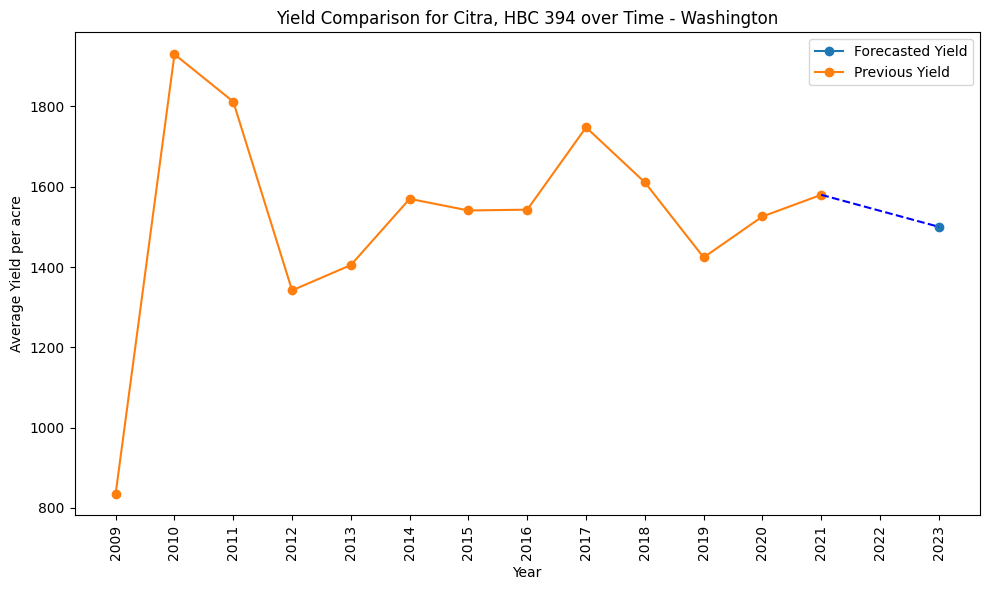

In [958]:
import matplotlib.pyplot as plt

# Select a specific variety for visualization
variety = 'Citra, HBC 394'

# Filter the forecasted data for the selected variety
variety_forecast = forecast_all[forecast_all['Variety'] == variety]

# Filter the original data for the selected variety
variety_data = df_prophet[df_prophet['Variety'] == variety]

# Convert the year values to integers
variety_forecast['Year'] = variety_forecast['Year'].astype(int)
variety_data['ds'] = variety_data['ds'].dt.year.astype(int)

# Plot the trend of forecasted and previous yields over time
plt.figure(figsize=(10, 6))
plt.plot(variety_forecast['Year'], variety_forecast['Average Yield per acre'], marker='o', label='Forecasted Yield')
plt.plot(variety_data['ds'], variety_data['y'], marker='o', label='Previous Yield')
plt.plot([variety_data['ds'].iloc[-1], variety_forecast['Year'].iloc[0]],
         [variety_data['y'].iloc[-1], variety_forecast['Average Yield per acre'].iloc[0]], color='blue', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Average Yield per acre')
plt.title(f'Yield Comparison for {variety} over Time - Washington')

# Set the x-axis ticks as discrete years
plt.xticks(range(min(variety_data['ds']), max(variety_forecast['Year']) + 1))

plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-959-da0dbb468860>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_forecast['Year'] = variety_forecast['Year'].astype(int)
<ipython-input-959-da0dbb468860>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_data['ds'] = variety_data['ds'].dt.year.astype(int)


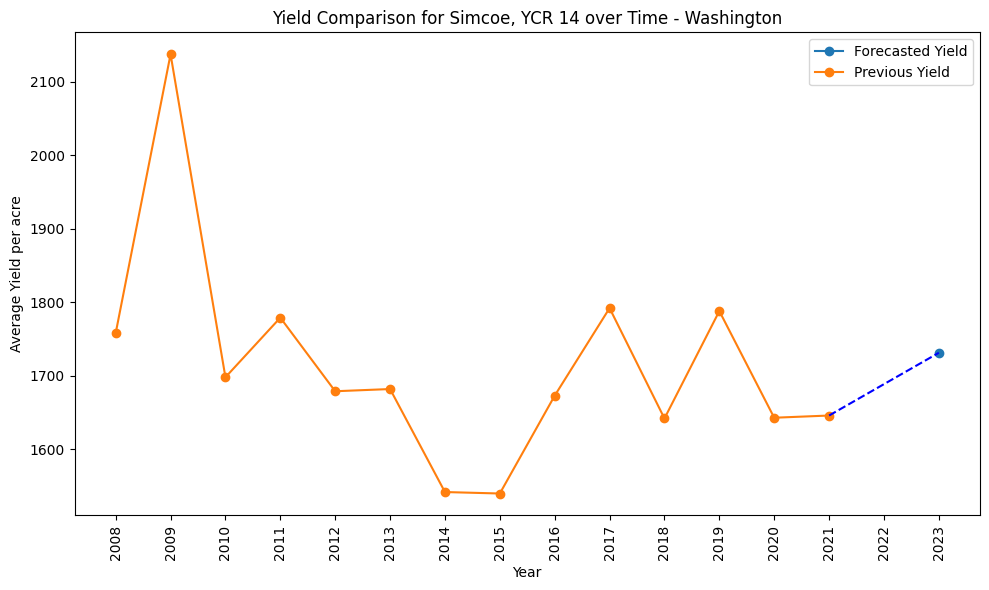

In [959]:
# Select a specific variety for visualization
variety = 'Simcoe, YCR 14'

# Filter the forecasted data for the selected variety
variety_forecast = forecast_all[forecast_all['Variety'] == variety]

# Filter the original data for the selected variety
variety_data = df_prophet[df_prophet['Variety'] == variety]

# Convert the year values to integers
variety_forecast['Year'] = variety_forecast['Year'].astype(int)
variety_data['ds'] = variety_data['ds'].dt.year.astype(int)

# Plot the trend of forecasted and previous yields over time
plt.figure(figsize=(10, 6))
plt.plot(variety_forecast['Year'], variety_forecast['Average Yield per acre'], marker='o', label='Forecasted Yield')
plt.plot(variety_data['ds'], variety_data['y'], marker='o', label='Previous Yield')
plt.plot([variety_data['ds'].iloc[-1], variety_forecast['Year'].iloc[0]],
         [variety_data['y'].iloc[-1], variety_forecast['Average Yield per acre'].iloc[0]], color='blue', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Average Yield per acre')
plt.title(f'Yield Comparison for {variety} over Time - Washington')

# Set the x-axis ticks as discrete years
plt.xticks(range(min(variety_data['ds']), max(variety_forecast['Year']) + 1))

plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-960-15e90d540cb1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_forecast['Year'] = variety_forecast['Year'].astype(int)
<ipython-input-960-15e90d540cb1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_data['ds'] = variety_data['ds'].dt.year.astype(int)


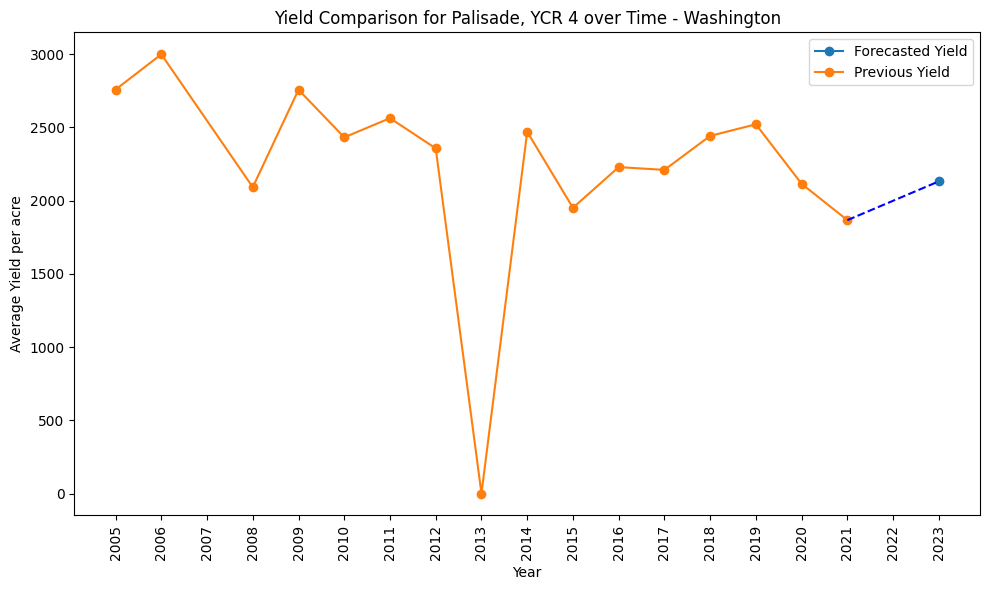

In [960]:
# Select a specific variety for visualization
variety = 'Palisade, YCR 4'

# Filter the forecasted data for the selected variety
variety_forecast = forecast_all[forecast_all['Variety'] == variety]

# Filter the original data for the selected variety
variety_data = df_prophet[df_prophet['Variety'] == variety]

# Convert the year values to integers
variety_forecast['Year'] = variety_forecast['Year'].astype(int)
variety_data['ds'] = variety_data['ds'].dt.year.astype(int)

# Plot the trend of forecasted and previous yields over time
plt.figure(figsize=(10, 6))
plt.plot(variety_forecast['Year'], variety_forecast['Average Yield per acre'], marker='o', label='Forecasted Yield')
plt.plot(variety_data['ds'], variety_data['y'], marker='o', label='Previous Yield')
plt.plot([variety_data['ds'].iloc[-1], variety_forecast['Year'].iloc[0]],
         [variety_data['y'].iloc[-1], variety_forecast['Average Yield per acre'].iloc[0]], color='blue', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Average Yield per acre')
plt.title(f'Yield Comparison for {variety} over Time - Washington')

# Set the x-axis ticks as discrete years
plt.xticks(range(min(variety_data['ds']), max(variety_forecast['Year']) + 1))

plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [961]:
MergeData_df_WA

Variety  Total Acre  Hops factor (HF)    ds  \
5     CTZ - Columbus/Tomahawk/Zeus      6588.0          0.329178  2000   
7                          Cascade       996.0          0.329178  2000   
11                         Chinook       670.0          0.329178  2000   
13                         Cluster       939.0          0.329178  2000   
20                          Galena      5044.0          0.329178  2000   
...                            ...         ...               ...   ...   
1286                        Summit       437.0          0.329178  2021   
1287                  Super Galena       480.0          0.329178  2021   
1288                        Tahoma       388.0          0.329178  2021   
1295                Warrior, YCR 5       128.0          0.329178  2021   
1296                    Willamette       132.0          0.329178  2021   

           y  ppt_sign  vpdmean_sign  tmean_sign  ETO x HF  Moving Avg Yield  
5     2605.0  0.004032      4.089302   22.013236  1.721890          0.000000  
7     1806.0  0.004032      4.089302   22.013236  1.721890          0.000000  
11    1957.0  0.004032      4.089302   22.013236  1.721890          0.000000  
13    1997.0  0.004032      4.089302   22.013236  1.721890          0.000000  
20    1891.0  0.004032      4.089302   22.013236  1.721890          0.000000  
...      ...       ...           ...         ...       ...               ...  
1286  1351.0  0.005857      4.436792   21.687014  1.750944       1421.000000  
1287  2849.0  0.005857      4.436792   21.687014  1.750944       2785.333333  
1288  1055.0  0.005857      4.436792   21.687014  1.750944       1533.666667  
1295  2240.0  0.005857      4.436792   21.687014  1.750944       1303.000000  
1296  1200.0  0.005857      4.436792   21.687014  1.750944       1418.000000  

[497 rows x 10 columns]

##Analyzing the NASA Data of Washington


In [962]:
#Reading the excel file
df_nasa_climate_WA=pd.read_excel(xlsx_file,sheet_name="WA - NASA data",index_col=False)
# if you notice if you remove null values we will elimate the headers
df_nasa_climate_WA
df_nasa_climate_WA=df_nasa_climate_WA.iloc[10:]
df_nasa_climate_WA.columns = df_nasa_climate_WA.iloc[0]
df_nasa_climate_WA=df_nasa_climate_WA.iloc[1:]
test=df_nasa_climate_WA
df_nasa_climate_WA_temp=df_nasa_climate_WA
para=df_nasa_climate_WA["PARAMETER"].unique()
df_nasa_climate_WA_temp.set_index("PARAMETER",inplace=False)

10                  YEAR    JAN    FEB    MAR     APR     MAY     JUN     JUL  \
PARAMETER                                                                       
GWETTOP             1999    0.5   0.53   0.51    0.48    0.45    0.39    0.35   
GWETTOP             2000   0.48   0.49   0.48    0.45    0.42    0.38    0.34   
GWETTOP             2001   0.42   0.43   0.42    0.41    0.37    0.35    0.31   
GWETTOP             2002   0.45   0.45   0.44    0.41    0.38    0.35     0.3   
GWETTOP             2003   0.47   0.46   0.45    0.45     0.4    0.34     0.3   
...                  ...    ...    ...    ...     ...     ...     ...     ...   
CLRSKY_SFC_PAR_TOT  2017  40.04  63.61  93.04  124.09  148.32  159.21  155.54   
CLRSKY_SFC_PAR_TOT  2018  38.48  60.84  91.72  122.19  146.95  157.95  153.64   
CLRSKY_SFC_PAR_TOT  2019  39.41  62.67  91.91  123.11  146.38  159.72  150.63   
CLRSKY_SFC_PAR_TOT  2020  38.05   60.7  91.41  124.59  147.98  158.38   152.6   
CLRSKY_SFC_PAR_TOT  2021  38.66  60.98  91.93   124.5  148.72  159.84  152.77   

10                     AUG     SEP    OCT    NOV    DEC    ANN  
PARAMETER                                                       
GWETTOP               0.34    0.34   0.36   0.42   0.45   0.43  
GWETTOP               0.31    0.34   0.36   0.38    0.4   0.41  
GWETTOP               0.29    0.28   0.33    0.4   0.45   0.38  
GWETTOP               0.27    0.27   0.32   0.35   0.41   0.37  
GWETTOP                0.3    0.29   0.32   0.35   0.41   0.38  
...                    ...     ...    ...    ...    ...    ...  
CLRSKY_SFC_PAR_TOT  123.09   91.47  69.73  43.62  32.15  95.48  
CLRSKY_SFC_PAR_TOT  119.37  102.61  69.39  43.24  32.55  95.06  
CLRSKY_SFC_PAR_TOT  131.52  101.03  68.95  43.23  31.65     96  
CLRSKY_SFC_PAR_TOT  133.31   86.42  68.12  42.98  32.16  94.82  
CLRSKY_SFC_PAR_TOT  121.02  101.07  69.31   43.3  32.47  95.53  

[138 rows x 14 columns]

In [963]:
from datetime import datetime
row_index=[]
df_nasa_climate_WA_cleaned=pd.DataFrame()
for lista in para:
  df_nasa_climate_WA_cleaned[lista]=np.nan
df_nasa_climate_WA_cleaned
year_list=df_nasa_climate_WA_temp['YEAR'].unique()
for year in year_list:
  for i in range(1,13):
    row_index.append(datetime.strptime(str(year),"%Y"))
df_nasa_climate_WA_cleaned.insert(0,'Date',row_index)
df_nasa_climate_WA_cleaned.set_index('Date', inplace=True)
df_nasa_climate_WA_cleaned
df_nasa_climate_WA_cleaned=df_nasa_climate_WA_cleaned.set_index(df_nasa_climate_WA_cleaned.index.strftime('%Y'))
df_nasa_climate_WA_cleaned

GWETTOP  GWETPROF  GWETROOT  CLOUD_AMT  ALLSKY_SFC_PAR_TOT  \
Date                                                               
1999      NaN       NaN       NaN        NaN                 NaN   
1999      NaN       NaN       NaN        NaN                 NaN   
1999      NaN       NaN       NaN        NaN                 NaN   
1999      NaN       NaN       NaN        NaN                 NaN   
1999      NaN       NaN       NaN        NaN                 NaN   
...       ...       ...       ...        ...                 ...   
2021      NaN       NaN       NaN        NaN                 NaN   
2021      NaN       NaN       NaN        NaN                 NaN   
2021      NaN       NaN       NaN        NaN                 NaN   
2021      NaN       NaN       NaN        NaN                 NaN   
2021      NaN       NaN       NaN        NaN                 NaN   

      CLRSKY_SFC_PAR_TOT  
Date                      
1999                 NaN  
1999                 NaN  
1999                 NaN  
1999                 NaN  
1999                 NaN  
...                  ...  
2021                 NaN  
2021                 NaN  
2021                 NaN  
2021                 NaN  
2021                 NaN  

[276 rows x 6 columns]

In [964]:
i=0
list_month=df_nasa_climate_WA.columns[2:-1]
for year in year_list:
  for month in list_month:
    for z in para:
      a=test[month][(test["PARAMETER"] ==z) & (test["YEAR"] == year)]
      df_nasa_climate_WA_cleaned[z].iloc[i]=a
    i+=1
list_convert=df_nasa_climate_WA_cleaned.columns
for convert in list_convert:
  df_nasa_climate_WA_cleaned[convert] = df_nasa_climate_WA_cleaned[convert].astype(float)

<ipython-input-964-bcdd84caa1c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nasa_climate_WA_cleaned[z].iloc[i]=a


In [965]:
df_nasa_climate_WA_cleaned

GWETTOP  GWETPROF  GWETROOT  CLOUD_AMT  ALLSKY_SFC_PAR_TOT  \
Date                                                               
1999     0.50      0.48      0.46      72.08                 NaN   
1999     0.53      0.51      0.48      79.99                 NaN   
1999     0.51      0.53      0.48      74.01                 NaN   
1999     0.48      0.52      0.47      61.58                 NaN   
1999     0.45      0.49      0.45      64.43                 NaN   
...       ...       ...       ...        ...                 ...   
2021     0.27      0.34      0.33      43.31              104.98   
2021     0.30      0.34      0.34      50.52               82.43   
2021     0.34      0.34      0.34      66.76               50.57   
2021     0.41      0.37      0.38      80.48               26.58   
2021     0.40      0.38      0.38      86.52               17.21   

      CLRSKY_SFC_PAR_TOT  
Date                      
1999                 NaN  
1999                 NaN  
1999                 NaN  
1999                 NaN  
1999                 NaN  
...                  ...  
2021              121.02  
2021              101.07  
2021               69.31  
2021               43.30  
2021               32.47  

[276 rows x 6 columns]

In [966]:
#Now we will fill the nan values with 0
df_nasa_climate_WA_cleaned=df_nasa_climate_WA_cleaned.fillna(0)


In [967]:
df_nasa_climate_WA_cleaned.describe([.01,.02,.03,.05,.10,.25,.5,.75,.95,.97,.98,.99])


GWETTOP    GWETPROF    GWETROOT   CLOUD_AMT  ALLSKY_SFC_PAR_TOT  \
count  276.000000  276.000000  276.000000  276.000000          276.000000   
mean     0.379203    0.400761    0.380507   58.135326           68.362609   
std      0.060789    0.036984    0.034044   17.414368           44.996251   
min      0.230000    0.340000    0.330000   14.910000            0.000000   
1%       0.257500    0.340000    0.330000   18.552500            0.000000   
2%       0.270000    0.340000    0.330000   21.235000            0.000000   
3%       0.270000    0.350000    0.330000   22.637500            0.000000   
5%       0.280000    0.350000    0.340000   26.772500            0.000000   
10%      0.300000    0.360000    0.340000   31.180000           16.105000   
25%      0.340000    0.370000    0.350000   46.930000           26.085000   
50%      0.380000    0.400000    0.380000   61.970000           63.585000   
75%      0.430000    0.430000    0.410000   71.147500          110.590000   
95%      0.470000    0.460000    0.440000   81.087500          138.375000   
97%      0.480000    0.480000    0.450000   82.592500          141.175000   
98%      0.490000    0.485000    0.455000   83.550000          142.630000   
99%      0.492500    0.495000    0.462500   85.057500          146.302500   
max      0.530000    0.530000    0.480000   90.590000          151.120000   

       CLRSKY_SFC_PAR_TOT  
count          276.000000  
mean            87.281159  
std             50.294416  
min              0.000000  
1%               0.000000  
2%               0.000000  
3%               0.000000  
5%               0.000000  
10%             32.145000  
25%             42.980000  
50%             91.390000  
75%            132.717500  
95%            157.580000  
97%            158.075000  
98%            158.360000  
99%            159.215000  
max            159.840000

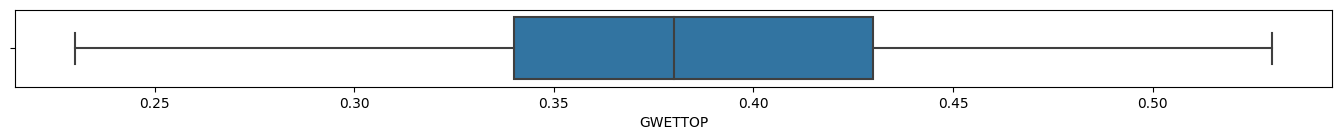

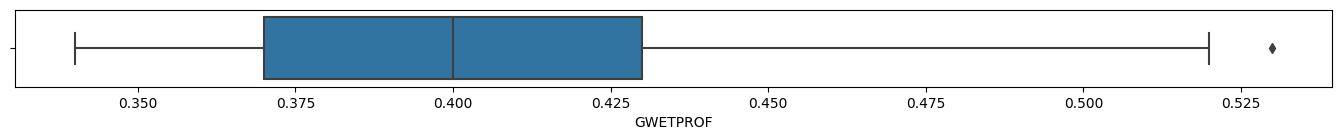

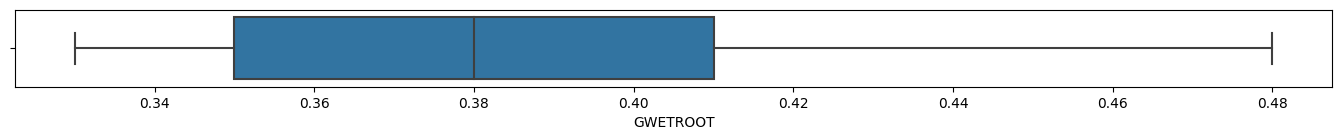

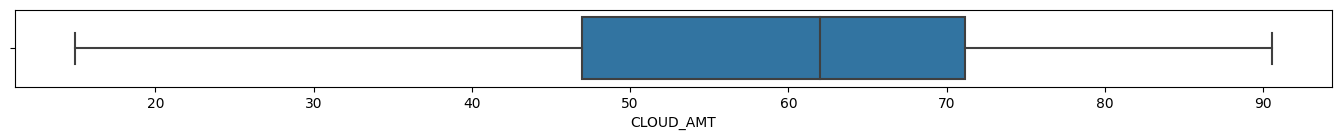

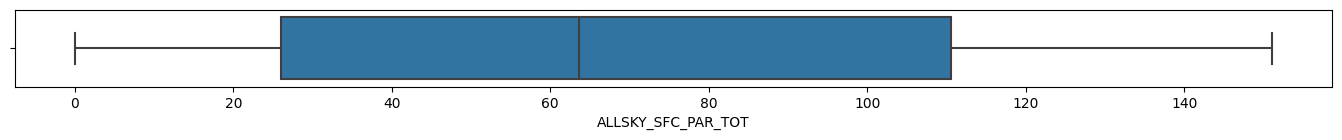

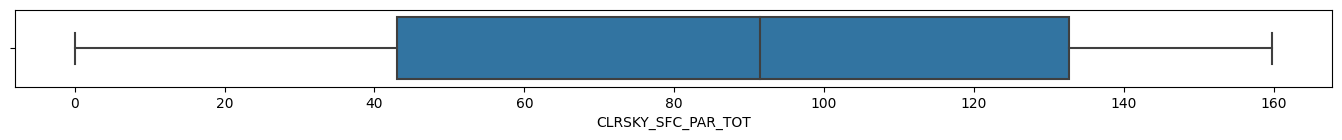

In [968]:
for column in df_nasa_climate_WA_cleaned:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=df_nasa_climate_WA_cleaned, x=column)

In [969]:
for column in df_nasa_climate_WA_cleaned:
  q1 = df_nasa_climate_WA_cleaned[column].quantile(0.25)
  q2 = df_nasa_climate_WA_cleaned[column].quantile(0.75)
  IQR = q2 - q1
  max_limit = q2 + (1.5 * IQR)
  min_limit = q1 - (1.5 * IQR)
  percentile25 = df_nasa_climate_WA_cleaned[column].quantile(0.25)
  percentile75 = df_nasa_climate_WA_cleaned[column].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  df_nasa_climate_WA_cleaned[column] = np.where(
      df_nasa_climate_WA_cleaned[column] > upper_limit,
      upper_limit,
      np.where(
          df_nasa_climate_WA_cleaned[column] < lower_limit,
          lower_limit,
          df_nasa_climate_WA_cleaned[column]))


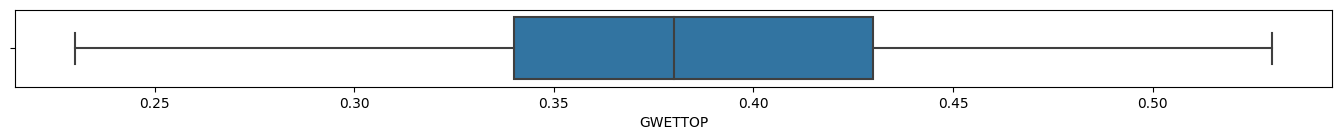

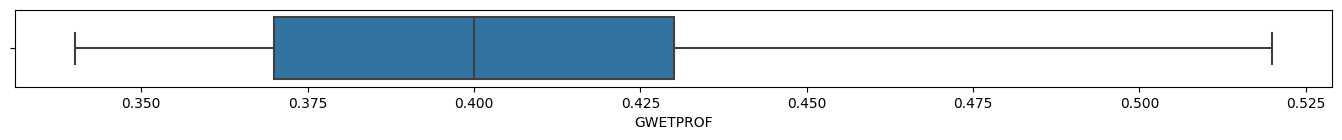

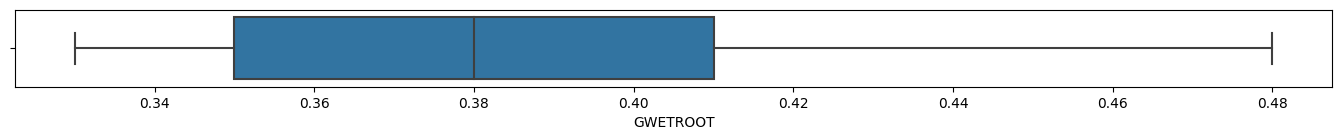

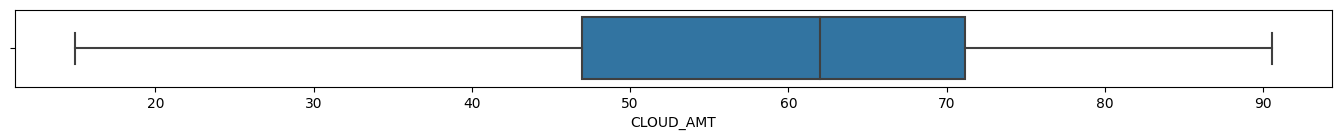

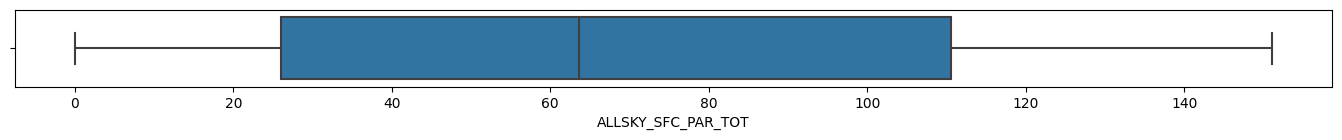

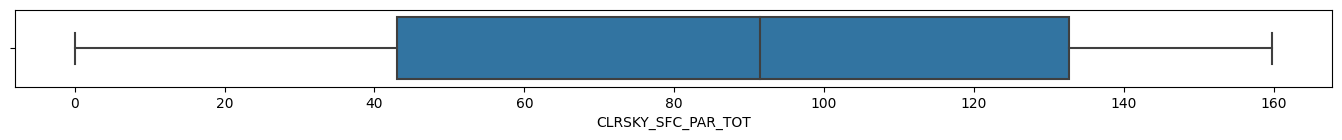

In [970]:
for column in df_nasa_climate_WA_cleaned:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=df_nasa_climate_WA_cleaned, x=column)

In [971]:
affected_values = []

for column in df_nasa_climate_WA_cleaned:
    q1 = df_nasa_climate_WA_cleaned[column].quantile(0.25)
    q2 = df_nasa_climate_WA_cleaned[column].quantile(0.75)
    IQR = q2 - q1
    max_limit = q2 + (1.5 * IQR)
    min_limit = q1 - (1.5 * IQR)
    percentile25 = df_nasa_climate_WA_cleaned[column].quantile(0.25)
    percentile75 = df_nasa_climate_WA_cleaned[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    affected_values.append((
        column,
        len(df_nasa_climate_WA_cleaned[
            (df_nasa_climate_WA_cleaned[column] < lower_limit) |
            (df_nasa_climate_WA_cleaned[column] > upper_limit)
        ]),
    ))

for column, num_affected in affected_values:
    print(f"Column: {column}")
    print(f"Number of affected values: {num_affected}\n")

Column: GWETTOP
Number of affected values: 0

Column: GWETPROF
Number of affected values: 0

Column: GWETROOT
Number of affected values: 0

Column: CLOUD_AMT
Number of affected values: 0

Column: ALLSKY_SFC_PAR_TOT
Number of affected values: 0

Column: CLRSKY_SFC_PAR_TOT
Number of affected values: 0



In [972]:
df_nasa_climate_WA_cleaned=df_nasa_climate_WA_cleaned.groupby(['Date']).mean()
df_nasa_climate_WA_cleaned

GWETTOP  GWETPROF  GWETROOT  CLOUD_AMT  ALLSKY_SFC_PAR_TOT  \
Date                                                                
1999  0.426667  0.448333  0.415833  60.360833            0.000000   
2000  0.402500  0.425000  0.395833  59.358333            0.000000   
2001  0.371667  0.396667  0.379167  60.211667           74.597500   
2002  0.366667  0.392500  0.371667  55.738333           76.498333   
2003  0.378333  0.400000  0.379167  57.885833           75.824167   
2004  0.370833  0.392500  0.372500  59.434167           74.507500   
2005  0.348333  0.372500  0.364167  56.382500           74.719167   
2006  0.402500  0.421667  0.396667  57.058333           75.218333   
2007  0.384167  0.407500  0.385000  59.916667           74.826667   
2008  0.367500  0.390833  0.373333  59.459167           74.344167   
2009  0.363333  0.388333  0.370000  58.650000           75.615833   
2010  0.389167  0.398333  0.381667  64.746667           71.530000   
2011  0.394167  0.417500  0.390000  58.469167           72.616667   
2012  0.385833  0.398333  0.380833  58.174167           72.935000   
2013  0.375833  0.396667  0.378333  53.140833           75.066667   
2014  0.370000  0.386667  0.370833  56.742500           74.797500   
2015  0.357500  0.384167  0.370000  55.610833           76.869167   
2016  0.392500  0.411667  0.389167  57.121667           75.410833   
2017  0.408333  0.428333  0.399167  56.631667           74.553333   
2018  0.381667  0.404167  0.381667  54.889167           75.191667   
2019  0.379167  0.400833  0.378333  60.319167           74.039167   
2020  0.354167  0.380000  0.365000  57.286667           75.859167   
2021  0.350833  0.374167  0.363333  59.524167           77.319167   

      CLRSKY_SFC_PAR_TOT  
Date                      
1999            0.000000  
2000            0.000000  
2001           95.792500  
2002           96.186667  
2003           95.779167  
2004           95.869167  
2005           96.220000  
2006           95.986667  
2007           95.978333  
2008           95.071667  
2009           95.354167  
2010           95.585833  
2011           95.423333  
2012           95.065833  
2013           95.812500  
2014           95.718333  
2015           95.175000  
2016           96.254167  
2017           95.325833  
2018           94.910833  
2019           95.850833  
2020           94.725000  
2021           95.380833

In [973]:
#as you can see there is little or no outliers we can move ahead with correaltion

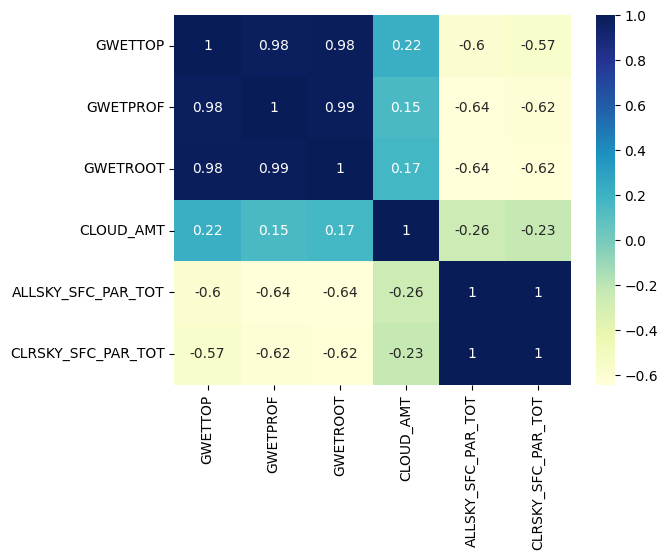

In [974]:
dataplot = sns.heatmap(df_nasa_climate_WA_cleaned.corr(), cmap="YlGnBu", annot=True)

In [975]:
MergeData_df_NASA_WA = (new_df_average_yield_WA.merge(df_nasa_climate_WA_cleaned, left_on='Year', right_on='Date').reindex(columns=['Variety',"Total Acre", "Year",'Average Yield', 'GWETTOP', 'GWETPROF','ALLSKY_SFC_PAR_TOT','CLRSKY_SFC_PAR_TOT',"GWETPROF","CLOUD_AMT","Moving Avg Yield"]))
MergeData_df_NASA_WA = MergeData_df_NASA_WA.loc[:,~MergeData_df_NASA_WA.columns.duplicated()].copy()

dropped_values_total_acre = MergeData_df_NASA_WA[MergeData_df_NASA_WA['Total Acre'] == 0].shape[0]
dropped_values_variety = MergeData_df_NASA_WA[MergeData_df_NASA_WA['Variety'] == 'Total'].shape[0]

print("Number of dropped values due to 'Total Acre' being 0:", dropped_values_total_acre)
print("Number of dropped values due to 'Variety' being 'Total':", dropped_values_variety)



Number of dropped values due to 'Total Acre' being 0: 779
Number of dropped values due to 'Variety' being 'Total': 22


In [976]:
MergeData_df_NASA_WA = MergeData_df_NASA_WA[MergeData_df_NASA_WA['Total Acre'] != 0]
MergeData_df_NASA_WA = MergeData_df_NASA_WA[MergeData_df_NASA_WA['Variety'] != 'Total']

MergeData_df_NASA_WA

Variety  Total Acre  Year  Average Yield   GWETTOP  \
5     CTZ - Columbus/Tomahawk/Zeus      6588.0  2000         2605.0  0.402500   
7                          Cascade       996.0  2000         1806.0  0.402500   
11                         Chinook       670.0  2000         1957.0  0.402500   
13                         Cluster       939.0  2000         1997.0  0.402500   
20                          Galena      5044.0  2000         1891.0  0.402500   
...                            ...         ...   ...            ...       ...   
1286                        Summit       437.0  2021         1351.0  0.350833   
1287                  Super Galena       480.0  2021         2849.0  0.350833   
1288                        Tahoma       388.0  2021         1055.0  0.350833   
1295                Warrior, YCR 5       128.0  2021         2240.0  0.350833   
1296                    Willamette       132.0  2021         1200.0  0.350833   

      GWETPROF  ALLSKY_SFC_PAR_TOT  CLRSKY_SFC_PAR_TOT  CLOUD_AMT  \
5     0.425000            0.000000            0.000000  59.358333   
7     0.425000            0.000000            0.000000  59.358333   
11    0.425000            0.000000            0.000000  59.358333   
13    0.425000            0.000000            0.000000  59.358333   
20    0.425000            0.000000            0.000000  59.358333   
...        ...                 ...                 ...        ...   
1286  0.374167           77.319167           95.380833  59.524167   
1287  0.374167           77.319167           95.380833  59.524167   
1288  0.374167           77.319167           95.380833  59.524167   
1295  0.374167           77.319167           95.380833  59.524167   
1296  0.374167           77.319167           95.380833  59.524167   

      Moving Avg Yield  
5             0.000000  
7             0.000000  
11            0.000000  
13            0.000000  
20            0.000000  
...                ...  
1286       1421.000000  
1287       2785.333333  
1288       1533.666667  
1295       1303.000000  
1296       1418.000000  

[497 rows x 10 columns]

In [977]:
MergeData_df_NASA_WA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 5 to 1296
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Variety             497 non-null    object 
 1   Total Acre          497 non-null    float64
 2   Year                497 non-null    object 
 3   Average Yield       497 non-null    float64
 4   GWETTOP             497 non-null    float64
 5   GWETPROF            497 non-null    float64
 6   ALLSKY_SFC_PAR_TOT  497 non-null    float64
 7   CLRSKY_SFC_PAR_TOT  497 non-null    float64
 8   CLOUD_AMT           497 non-null    float64
 9   Moving Avg Yield    497 non-null    float64
dtypes: float64(8), object(2)
memory usage: 42.7+ KB


In [978]:
MergeData_df_NASA_WA = MergeData_df_NASA_WA.rename(columns={'Year': 'ds',
                        'Average Yield': 'y'})

In [979]:
MergeData_df_NASA_WA.head()

Variety  Total Acre    ds       y  GWETTOP  GWETPROF  \
5   CTZ - Columbus/Tomahawk/Zeus      6588.0  2000  2605.0   0.4025     0.425   
7                        Cascade       996.0  2000  1806.0   0.4025     0.425   
11                       Chinook       670.0  2000  1957.0   0.4025     0.425   
13                       Cluster       939.0  2000  1997.0   0.4025     0.425   
20                        Galena      5044.0  2000  1891.0   0.4025     0.425   

    ALLSKY_SFC_PAR_TOT  CLRSKY_SFC_PAR_TOT  CLOUD_AMT  Moving Avg Yield  
5                  0.0                 0.0  59.358333               0.0  
7                  0.0                 0.0  59.358333               0.0  
11                 0.0                 0.0  59.358333               0.0  
13                 0.0                 0.0  59.358333               0.0  
20                 0.0                 0.0  59.358333               0.0

In [980]:
lst_year = MergeData_df_NASA_WA['ds'].unique()
lst_year.sort()
num_train_years = 0.7 * len(MergeData_df_NASA_WA['ds'].unique())
train_years = lst_year[0:int(num_train_years + 1)]
train_years.sort()
test_years = list(set(lst_year) - set(train_years))

In [981]:
df_train = MergeData_df_NASA_WA.loc[MergeData_df_NASA_WA['ds'].isin(train_years)]
df_test = MergeData_df_NASA_WA.loc[MergeData_df_NASA_WA['ds'].isin(test_years)]

In [982]:
df_train.columns

Index(['Variety', 'Total Acre', 'ds', 'y', 'GWETTOP', 'GWETPROF',
       'ALLSKY_SFC_PAR_TOT', 'CLRSKY_SFC_PAR_TOT', 'CLOUD_AMT',
       'Moving Avg Yield'],
      dtype='object')

In [983]:
y_train = df_train['y'].values
x_train = df_train.drop(columns= ['y','ds','Variety'], axis=1).values
y_test = df_test['y'].values
x_test = df_test.drop(columns=['y','ds','Variety'], axis=1).values

In [984]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_vals=rfr.predict(x_test)
pred_train = rfr.predict(x_train)
rfr_test= rfr.score(x_test,y_test)
rfr_train= rfr.score(x_train,y_train)
print('Test:', rfr_test, 'Train:', rfr_train)

Test: 0.46921005698089213 Train: 0.9382288018428928


R-squared scores - Test:  0.4585010562737776
R-squared scores - Train:  0.9389722647909412


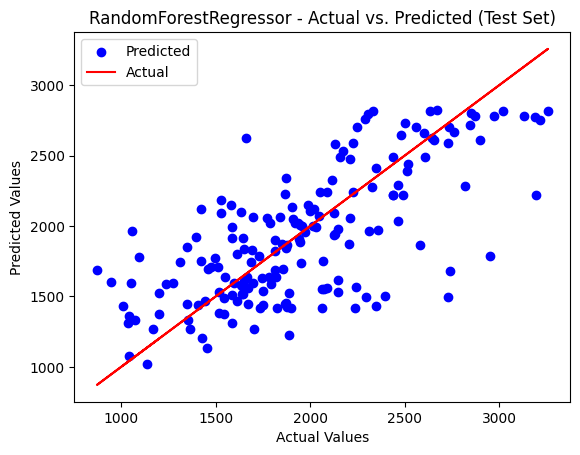

R-squared:  0.4585010562737776


In [985]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create a RandomForestRegressor model
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

# Make predictions on the test set
rfr_vals = rfr.predict(x_test)
pred_train = rfr.predict(x_train)

# Calculate R-squared scores
rfr_test = rfr.score(x_test, y_test)
rfr_train = rfr.score(x_train, y_train)
print("R-squared scores - Test: ", rfr_test)
print("R-squared scores - Train: ", rfr_train)

# Plot predicted vs. actual values for test set
plt.scatter(y_test, rfr_vals, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RandomForestRegressor - Actual vs. Predicted (Test Set)')
plt.legend()
plt.show()

# Plot feature importances
importances = rfr.feature_importances_
num_features = x_train.shape[1]
indices = np.argsort(importances)



# Calculate and print R-squared score
r2 = r2_score(y_test, rfr_vals)
print("R-squared: ", r2)

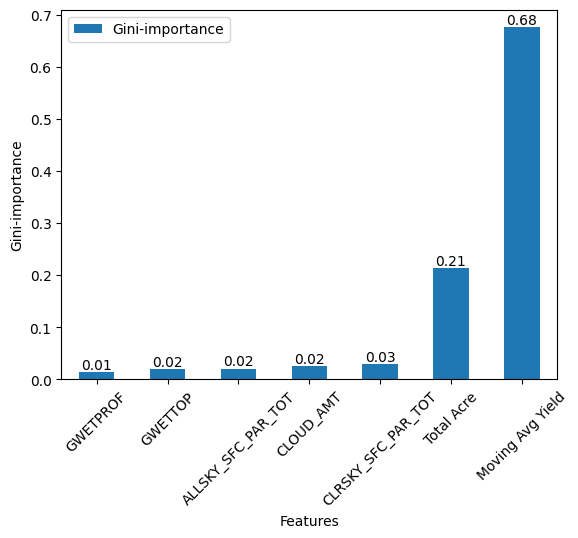

In [986]:
import pandas as pd
import matplotlib.pyplot as plt

feats = {}
for feature, importance in zip(df_train.drop(columns=['y', 'ds', 'Variety'], axis=1).columns, rfr.feature_importances_):
    feats[feature] = importance  # add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances_sorted = importances.sort_values(by='Gini-importance')

ax = importances_sorted.plot(kind='bar', rot=45)

# Add axis labels
ax.set_xlabel('Features')
ax.set_ylabel('Gini-importance')

# Add data point labels
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.show()


Test Statistic

In [987]:
import math
from sklearn.metrics import mean_absolute_error
MSE = np.square(np.subtract(y_test, rfr_vals)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n", RMSE)
print("Mean Absolute Error:\n", mean_absolute_error(y_test, rfr_vals))

Root Mean Square Error:
 381.86009132780083
Mean Absolute Error:
 288.5044382022472


Train Statistic

In [988]:
import math
from sklearn.metrics import mean_absolute_error
MSE = np.square(np.subtract(y_train, pred_train)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n", RMSE)
print("Mean Absolute Error:\n", mean_absolute_error(y_train, pred_train))

Root Mean Square Error:
 138.2291745537303
Mean Absolute Error:
 92.69799373040752


In [989]:
#linear
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_vals=lr.predict(x_test)
lr_test= lr.score(x_test,y_test)
lr_train= lr.score(x_train,y_train)
print('Test:', lr_test,'Train:', lr_train)

Test: 0.3982711807189703 Train: 0.46342055286301564


R-squared scores - Test: 0.3982711807189703
R-squared scores - Train: 0.46342055286301564


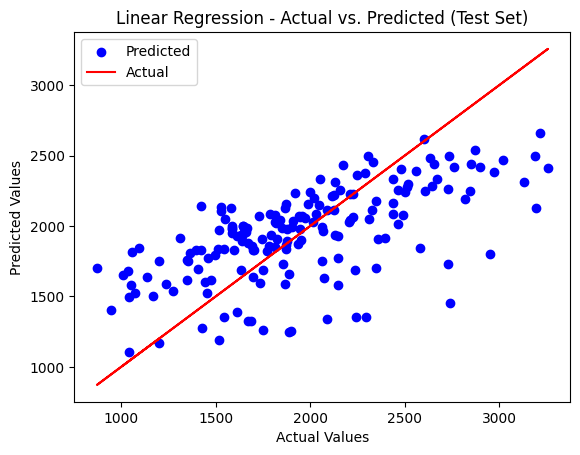

R-squared: 0.3982711807189703


In [990]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create a Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Make predictions on the test set
lr_vals = lr.predict(x_test)

# Calculate R-squared scores
lr_test = lr.score(x_test, y_test)
lr_train = lr.score(x_train, y_train)
print("R-squared scores - Test:", lr_test)
print("R-squared scores - Train:", lr_train)

# Plot predicted vs. actual values for test set
plt.scatter(y_test, lr_vals, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - Actual vs. Predicted (Test Set)')
plt.legend()
plt.show()

# Calculate and print R-squared score
r2 = r2_score(y_test, lr_vals)
print("R-squared:", r2)

In [991]:
df_train.drop(columns= ['y','ds','Variety'], axis=1).columns

df_test.drop(columns=['y','ds','Variety'], axis=1).columns

Index(['Total Acre', 'GWETTOP', 'GWETPROF', 'ALLSKY_SFC_PAR_TOT',
       'CLRSKY_SFC_PAR_TOT', 'CLOUD_AMT', 'Moving Avg Yield'],
      dtype='object')

In [992]:
coefficients = lr.coef_
coefficients

array([ 3.88912040e-02, -1.96490909e+04,  2.06381636e+04, -1.00999943e+01,
        4.91929588e+00,  3.10334774e+01,  4.94525372e-01])

#Idaho Analysis

###Climate of Idaho Dataset


### To create 2 Datasets for Idaho and 1 for total acres harvested with year as y columns and variety as rows. Aonther data frame would be for average Yield

In [993]:
# Create a temp data frame where will stre the values
df_total_acre_ID=pd.DataFrame([])
df_average_yield_ID=pd.DataFrame([])
#Itrateing trhough each sheet from 2000 to 2003 to get the total acer harvested based at Washington sheet
for x in range(2000,2023):
  df_x = pd.read_excel(xlsx_file, str(x),header=[0, 1])
  # to Get the value of Idaho city
  df_idaho_acre=df_x["Total acres harvested by location"]["Idaho"]
  df_idaho_Yield=df_x["Average yield per acre by location"]["Idaho"]
  # to get the list of variety
  df_year=df_x["Year: " + str(x)]
  # to create A df with respect to Variety and idaho
  df_concat_acre=pd.concat([df_year,df_idaho_acre], axis=1, join='inner')
  df_concat_Yield=pd.concat([df_year,df_idaho_Yield], axis=1, join='inner')
  # to set the index of Row as Variety
  df_concat_acre.set_index('Variety', inplace=True)
  df_concat_Yield.set_index('Variety', inplace=True)
  # to Rename the column to year
  result_acre= df_concat_acre.rename(columns={'idaho': str(x)})
  result_Yield=df_concat_Yield.rename(columns={'idaho': str(x)})
  # appending the data of each year to the Temp DataFrame
  df_total_acre_ID.insert(0,str(x),result_acre,allow_duplicates=False)
  df_average_yield_ID.insert(0,str(x),result_Yield,allow_duplicates=False)

In [994]:
list_avg=[]
list_acr=[]
#df_year=df_x["Year: " + str(x)]
variety_list=df_year.values
variety_list=list(chain.from_iterable(variety_list))
for x in range(2000,2023):
  for variety in variety_list:
    list_avg.append({"Location":"Idaho","Year":str(x),"Variety":variety,"Average Yield":df_average_yield_ID[str(x)][variety]})
    list_acr.append(df_total_acre_ID[str(x)][variety])
new_df_average_yield_ID=pd.DataFrame.from_dict(list_avg)
new_df_average_yield_ID['Total Acre'] = list_acr
#new_df_average_yield_WA=pd.DataFrame.from_dict(list_acr)
new_df_average_yield_ID

Location  Year           Variety  Average Yield  Total Acre
0       Idaho  2000    Ahtanum, YCR 1            NaN         NaN
1       Idaho  2000  Amarillo, VGXP01            NaN         NaN
2       Idaho  2000            Apollo            NaN         NaN
3       Idaho  2000  Azacca, ADHA-483            NaN         NaN
4       Idaho  2000             Bravo            NaN         NaN
...       ...   ...               ...            ...         ...
1352    Idaho  2022          Vanguard            NaN         NaN
1353    Idaho  2022    Warrior, YCR 5            NaN         NaN
1354    Idaho  2022        Willamette         1393.0       459.0
1355    Idaho  2022             Zappa            NaN         NaN
1356    Idaho  2022             Total         1734.0      9267.0

[1357 rows x 5 columns]

In [995]:
new_df_average_yield_ID['Moving Avg Yield'] = new_df_average_yield_ID.groupby('Variety').rolling(3)['Average Yield'].mean().reset_index(drop=True)
new_df_average_yield_ID=new_df_average_yield_ID.fillna(0)

### EDA of Total acres harvested in ID


In [996]:
# Fisrt we will check if there are any null values or not
df_total_acre_ID.isnull().sum()
#replacing the values of of nulls and checking it again
df_total_acre_ID.fillna(0,inplace=True)
df_total_acre_ID.isnull().sum()

2022    0
2021    0
2020    0
2019    0
2018    0
2017    0
2016    0
2015    0
2014    0
2013    0
2012    0
2011    0
2010    0
2009    0
2008    0
2007    0
2006    0
2005    0
2004    0
2003    0
2002    0
2001    0
2000    0
dtype: int64

### Cleaning the Data of average Yield of Idaho


In [997]:
# Fisrt we will check if there are any null values or not
new_df_average_yield_ID.isnull().sum()
new_df_average_yield_ID=new_df_average_yield_ID.fillna(0)

In [998]:
new_df_average_yield_ID=new_df_average_yield_ID.groupby(['Variety','Year']).sum()
new_df_average_yield_ID.reset_index(inplace=True)
new_df_average_yield_ID

<ipython-input-998-ba0fa5673030>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df_average_yield_ID=new_df_average_yield_ID.groupby(['Variety','Year']).sum()


Variety  Year  Average Yield  Total Acre  Moving Avg Yield
0     Ahtanum, YCR 1  2000            0.0         0.0          0.000000
1     Ahtanum, YCR 1  2001            0.0         0.0          0.000000
2     Ahtanum, YCR 1  2002            0.0         0.0          0.000000
3     Ahtanum, YCR 1  2003            0.0         0.0       1654.666667
4     Ahtanum, YCR 1  2004            0.0         0.0          0.000000
...              ...   ...            ...         ...               ...
1352           Zappa  2018            0.0         0.0       2185.000000
1353           Zappa  2019            0.0         0.0          0.000000
1354           Zappa  2020            0.0         0.0       1871.666667
1355           Zappa  2021            0.0         0.0          0.000000
1356           Zappa  2022            0.0         0.0          0.000000

[1357 rows x 5 columns]

<ipython-input-999-582ba54551f5>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=16)
<ipython-input-999-582ba54551f5>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=16)
<ipython-input-999-582ba54551f5>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=16)
<ipython-input-999-582ba54551f5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=16)


Text(0, 0.5, 'Average yield per acre by location')

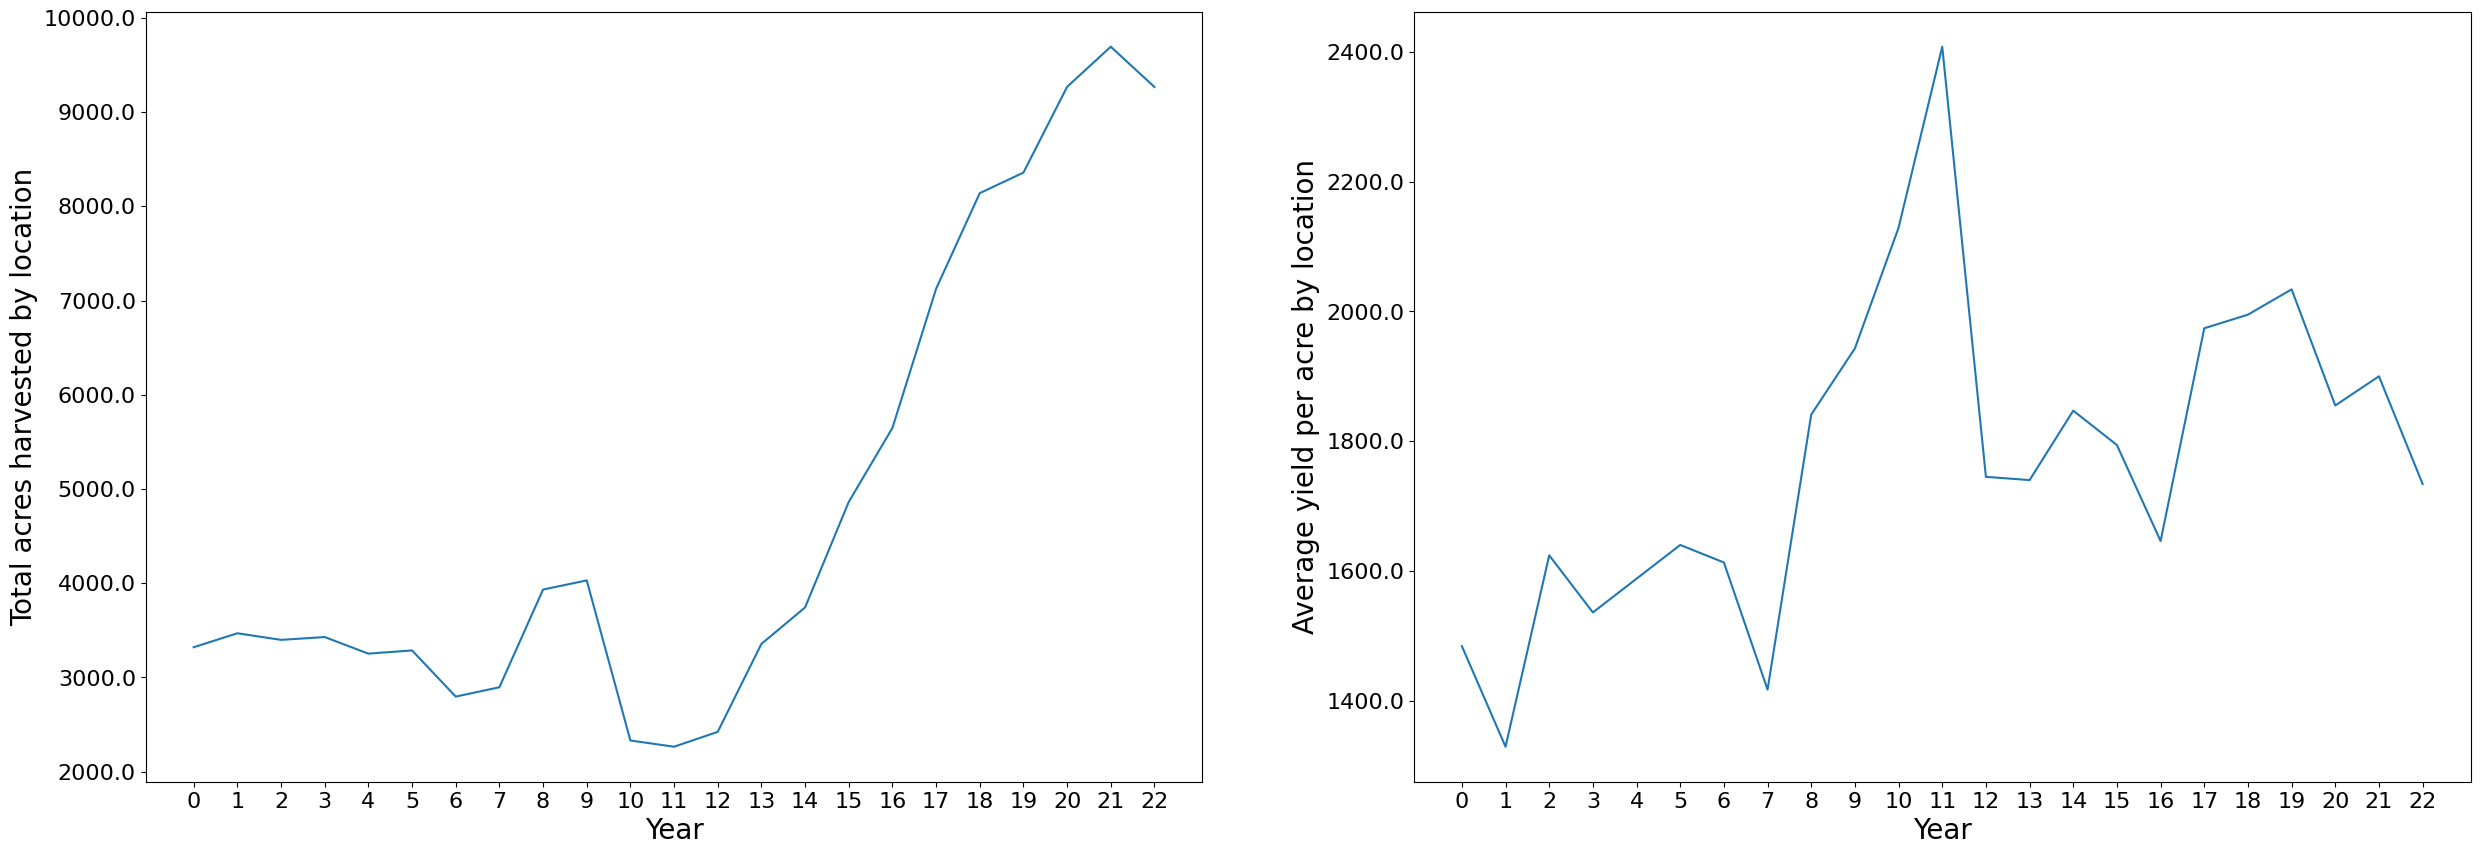

<Figure size 640x480 with 0 Axes>

In [999]:
fig, axs = plt.subplots(ncols=2, figsize=(30, 10))
sns.lineplot(data=df_total_acre_ID.loc['Total'].iloc[::-1],ax=axs[0])
figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=df_average_yield_ID.loc['Total'].iloc[::-1],ax=axs[1])
axs[0].set(xlabel="Year", ylabel="Total acres harvested by location")
axs[1].set(xlabel="Year", ylabel="Average yield per acre by location")
# Increase font size of x-axis and y-axis labels
axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=16)
axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=16)
axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=16)
axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=16)
# Increase font size of x-axis and y-axis titles
axs[0].set_xlabel(axs[0].get_xlabel(), fontsize=20)
axs[0].set_ylabel(axs[0].get_ylabel(), fontsize=20)
axs[1].set_xlabel(axs[1].get_xlabel(), fontsize=20)
axs[1].set_ylabel(axs[1].get_ylabel(), fontsize=20)


<ipython-input-1000-92bc9fa5eda1>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=16)
<ipython-input-1000-92bc9fa5eda1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=16)
<ipython-input-1000-92bc9fa5eda1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=16)
<ipython-input-1000-92bc9fa5eda1>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=16)


Text(0, 0.5, 'Number of Varieties ')

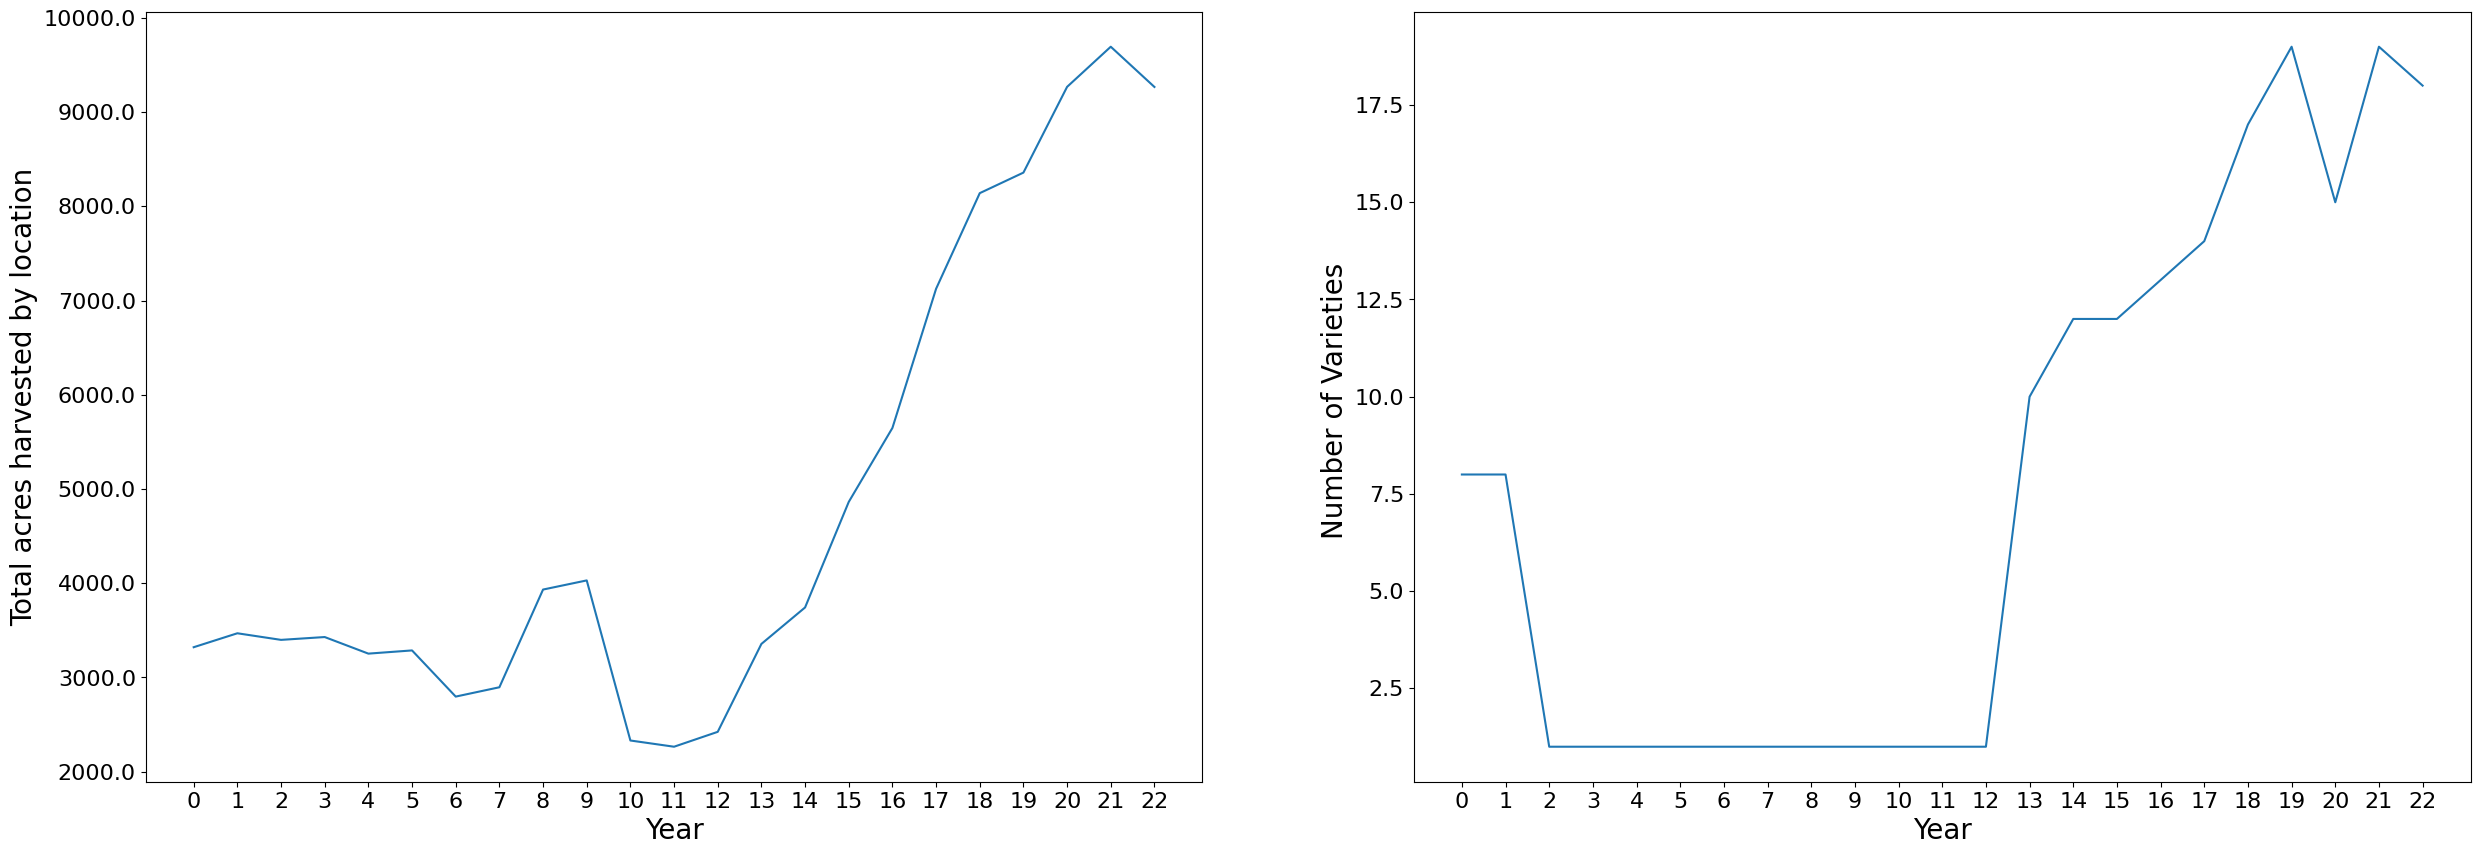

<Figure size 640x480 with 0 Axes>

In [1000]:
fig, axs = plt.subplots(ncols=2, figsize=(30, 10))
sns.lineplot(data=df_total_acre_ID.loc['Total'].iloc[::-1],ax=axs[0])
figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=df_total_acre_WA[df_total_acre_ID > 1.0].count().iloc[::-1],ax=axs[1])
axs[0].set(xlabel="Year", ylabel="Total acres harvested by location")
axs[1].set(xlabel="Year", ylabel="Number of Varieties ")
# Increase font size of x-axis and y-axis labels
axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=16)
axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=16)
axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=16)
axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=16)
# Increase font size of x-axis and y-axis titles
axs[0].set_xlabel(axs[0].get_xlabel(), fontsize=20)
axs[0].set_ylabel(axs[0].get_ylabel(), fontsize=20)
axs[1].set_xlabel(axs[1].get_xlabel(), fontsize=20)
axs[1].set_ylabel(axs[1].get_ylabel(), fontsize=20)

### Climate DataSet



As you can you as the acres increases the Yield is reduced. To find the reason behind it will analyze the Climate Data of the region of Idaho


In [1001]:
df_climate_ID=pd.read_excel(xlsx_file,sheet_name="ID climate data")
df_climate_ID
# now we will convert Date to Datetime index

df_climate_ID.Date = pd.to_datetime(df_climate_ID.Date)

cyclic_Data=df_climate_ID["Hops factor (HF)"].dropna()
cyclic_Data
df_climate_ID["Hops factor (HF)"]= df_climate_ID.index.map(dict(zip(df_climate_ID.index, cycle(cyclic_Data))))
df_climate_ID["ETO x HF"]=df_climate_ID["Hops factor (HF)"]*df_climate_ID["ETO  (FAO)"]
# to check if the year is leap year or not
df_climate_ID
df_climate_ID["ETO x HF"]=df_climate_ID["Hops factor (HF)"]*df_climate_ID["ETO  (FAO)"]
df_climate_ID["vpdmean(hPa)"]=(df_climate_ID["vpdmax (hPa)"]-df_climate_ID["vpdmin (hPa)"])/2
df_climate_ID["ppt_sign"]=df_climate_ID["Hops factor (HF)"]*df_climate_ID["ppt (inches)"]
df_climate_ID["tmean_sign"]=df_climate_ID["Hops factor (HF)"]*df_climate_ID["tmean (degrees F)"]
df_climate_ID["vpdmean_sign"]=df_climate_ID["Hops factor (HF)"]*df_climate_ID["vpdmean(hPa)"]
df_climate_ID

Date  ppt (inches)  tmin (degrees F)  tmean (degrees F)  \
0    1999-01-01           0.1              32.2               38.0   
1    1999-01-02           0.0              25.2               34.2   
2    1999-01-03           0.0              23.7               32.6   
3    1999-01-04           0.0              21.3               31.0   
4    1999-01-05           0.0              22.0               31.0   
...         ...           ...               ...                ...   
8669 2022-09-26           0.0              44.5               64.0   
8670 2022-09-27           0.0              44.4               64.8   
8671 2022-09-28           0.0              46.9               67.4   
8672 2022-09-29           0.0              52.6               71.0   
8673 2022-09-30           0.0              51.0               62.7   

      tmax (degrees F)  vpdmin (hPa)  vpdmax (hPa)  ETO  (FAO)  \
0                 43.8          0.03          2.25        0.72   
1                 43.3          0.11          3.81        0.80   
2                 41.6          0.11          2.95        0.77   
3                 40.6          0.06          3.35        0.78   
4                 40.0          0.00          2.54        0.75   
...                ...           ...           ...         ...   
8669              83.4          2.09         31.21        4.02   
8670              85.2          2.35         33.79        4.15   
8671              88.0          2.65         36.14        4.27   
8672              89.3          5.41         40.63        4.15   
8673              74.5          2.92         21.51        2.87   

      ЕТО\n (Hargreaves)  Hops factor (HF)  ETO x HF  vpdmean(hPa)  ppt_sign  \
0                   0.50               0.0       0.0         1.110       0.0   
1                   0.56               0.0       0.0         1.850       0.0   
2                   0.54               0.0       0.0         1.420       0.0   
3                   0.53               0.0       0.0         1.645       0.0   
4                   0.52               0.0       0.0         1.270       0.0   
...                  ...               ...       ...           ...       ...   
8669                3.74               0.0       0.0        14.560       0.0   
8670                3.83               0.0       0.0        15.720       0.0   
8671                3.96               0.0       0.0        16.745       0.0   
8672                3.88               0.0       0.0        17.610       0.0   
8673                2.72               0.0       0.0         9.295       0.0   

      tmean_sign  vpdmean_sign  
0            0.0           0.0  
1            0.0           0.0  
2            0.0           0.0  
3            0.0           0.0  
4            0.0           0.0  
...          ...           ...  
8669         0.0           0.0  
8670         0.0           0.0  
8671         0.0           0.0  
8672         0.0           0.0  
8673         0.0           0.0  

[8674 rows x 15 columns]

Since there is alot of data point and it would be diffcult to map we will be taking a frequency of each month and then avg of that year

In [1002]:
#now we will do the quantative analysis of the the data
df_climate_ID.describe([.01,.02,.03,.05,.10,.25,.5,.75,.95,.97,.98,.99])

ppt (inches)  tmin (degrees F)  tmean (degrees F)  tmax (degrees F)  \
count   8674.000000       8674.000000        8674.000000       8674.000000   
mean       0.024097         39.000288          52.097129         65.198075   
std        0.072060         13.698944          16.836501         20.594404   
min        0.000000        -17.800000          -6.900000          4.000000   
1%         0.000000          8.200000          16.773000         24.300000   
2%         0.000000         12.800000          21.500000         28.500000   
3%         0.000000         15.119000          23.819000         30.619000   
5%         0.000000         18.000000          26.765000         33.600000   
10%        0.000000         22.000000          30.900000         38.300000   
25%        0.000000         28.700000          38.500000         48.025000   
50%        0.000000         38.200000          51.200000         64.500000   
75%        0.000000         50.500000          66.600000         83.300000   
95%        0.150000         60.635000          78.435000         96.835000   
97%        0.210000         62.100000          79.981000         98.781000   
98%        0.260000         63.300000          81.000000         99.800000   
99%        0.350000         64.827000          82.400000        101.300000   
max        1.210000         73.300000          89.500000        109.100000   

       vpdmin (hPa)  vpdmax (hPa)   ETO  (FAO)  ЕТО\n (Hargreaves)  \
count   8674.000000   8674.000000  8674.000000         8674.000000   
mean       1.638862     18.920501     3.291390            3.200372   
std        1.772634     15.674229     2.198351            2.368018   
min        0.000000      0.090000     0.290000           -0.130000   
1%         0.000000      0.480000     0.470000            0.220000   
2%         0.010000      0.724600     0.510000            0.280000   
3%         0.020000      0.980000     0.540000            0.320000   
5%         0.040000      1.360000     0.600000            0.370000   
10%        0.090000      2.430000     0.720000            0.490000   
25%        0.280000      5.680000     1.180000            0.930000   
50%        0.950000     13.910000     2.900000            2.730000   
75%        2.490000     30.257500     5.197500            5.250000   
95%        5.390000     49.047000     7.043500            7.290000   
97%        6.138100     52.188100     7.280000            7.560000   
98%        6.645400     54.235400     7.475400            7.750000   
99%        7.420000     57.150800     7.650000            7.970000   
max       10.710000     74.920000     9.030000            9.380000   

       Hops factor (HF)     ETO x HF  vpdmean(hPa)     ppt_sign   tmean_sign  \
count       8674.000000  8674.000000   8674.000000  8674.000000  8674.000000   
mean           0.332442     1.859327      8.640820     0.005618    22.555389   
std            0.391249     2.402385      7.107889     0.034206    27.922019   
min            0.000000     0.000000      0.045000     0.000000     0.000000   
1%             0.000000     0.000000      0.208650     0.000000     0.000000   
2%             0.000000     0.000000      0.312300     0.000000     0.000000   
3%             0.000000     0.000000      0.420000     0.000000     0.000000   
5%             0.000000     0.000000      0.610000     0.000000     0.000000   
10%            0.000000     0.000000      1.120000     0.000000     0.000000   
25%            0.000000     0.000000      2.655000     0.000000     0.000000   
50%            0.000000     0.000000      6.415000     0.000000     0.000000   
75%            0.800000     4.062000     13.807500     0.000000    53.152000   
95%            0.990000     6.420490     22.296750     0.024000    70.953100   
97%            1.000000     6.860000     23.752150     0.050924    74.292400   
98%            1.000000     7.100000     24.612700     0.083232    76.113500   
99%            1.000000     7.413441     25.962700     0.1369

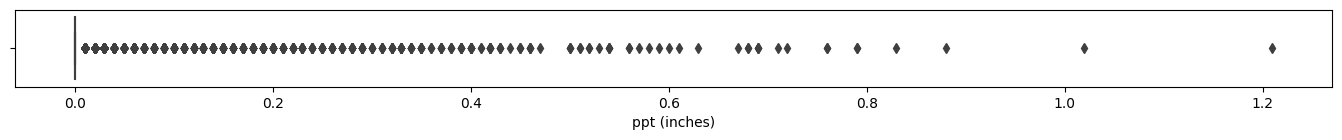

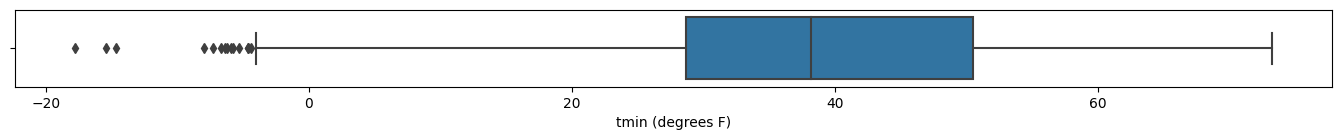

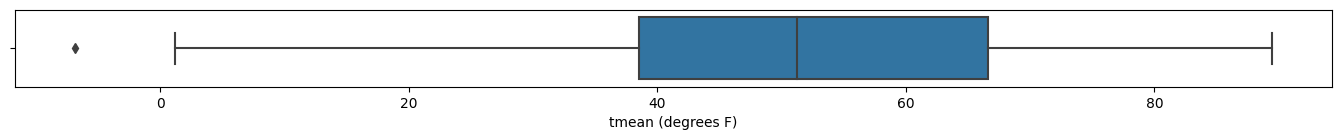

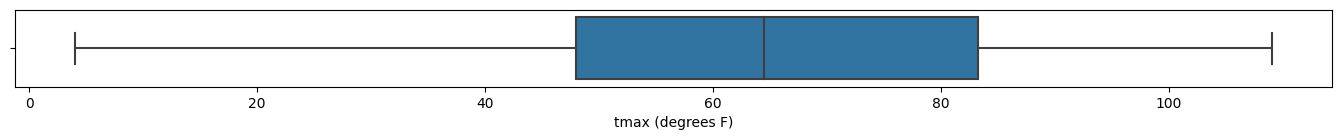

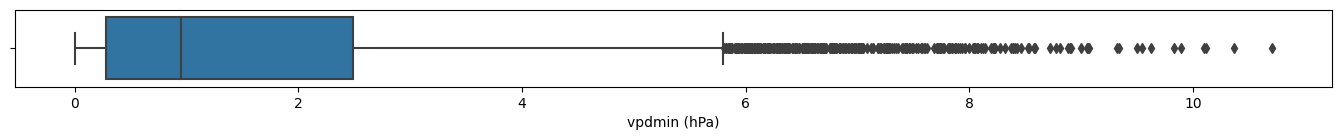

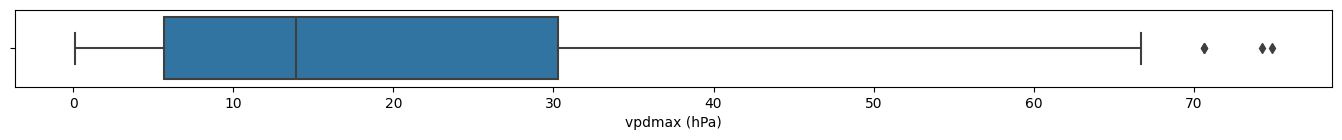

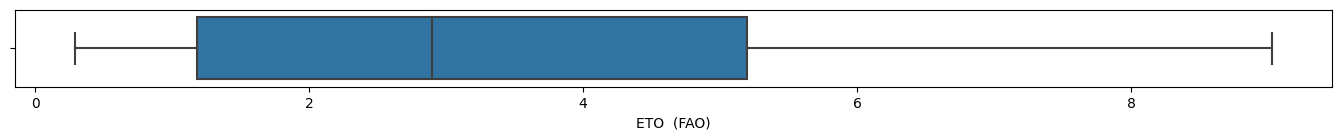

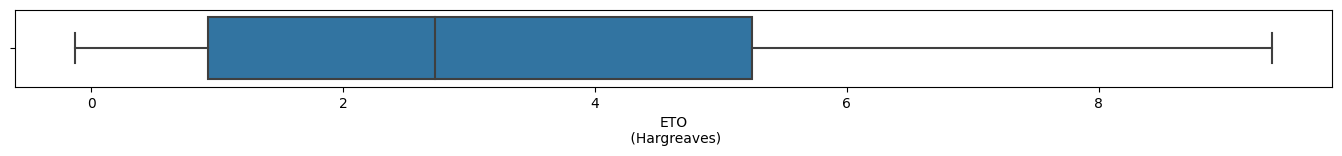

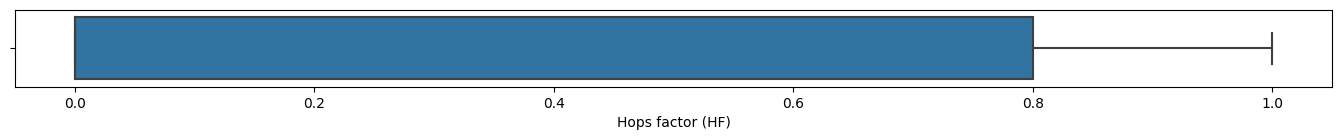

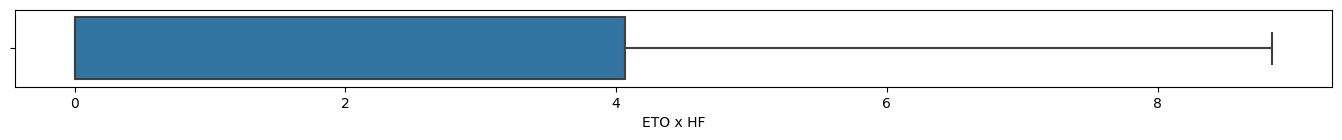

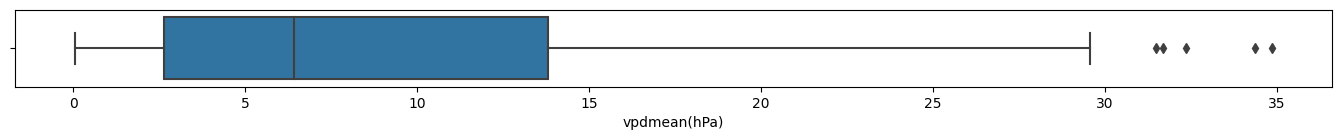

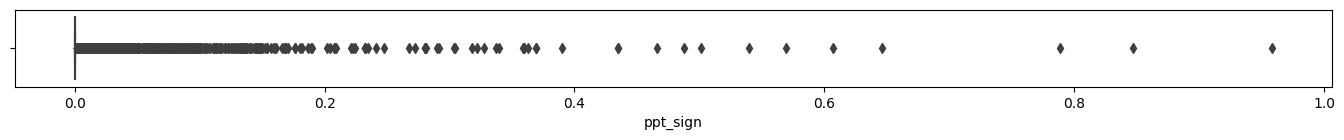

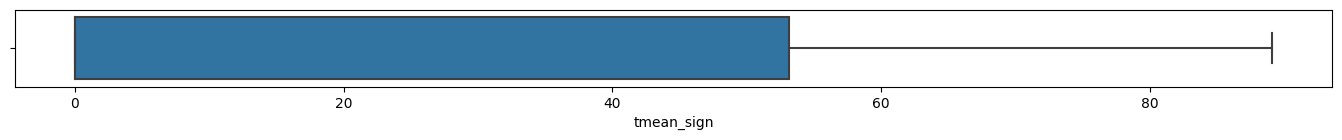

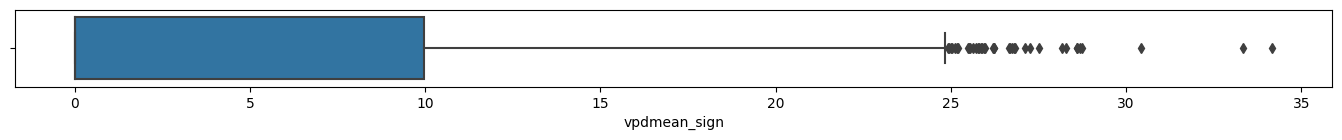

In [1003]:
df_climate_ID['Date'] = pd.to_datetime(df_climate_ID['Date'])
df_climate_ID=df_climate_ID.set_index("Date")
#Now we will check the outliers with the help of box plot
for column in df_climate_ID:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=df_climate_ID, x=column)

In [1004]:
#To count number of outliers and percentage
import pandas as pd
import numpy as np

# Calculate the Z-score for each variable
z_scores = np.abs((df_climate_ID - df_climate_ID.mean()) / df_climate_ID.std())

# Define a threshold for outliers (e.g., Z-score > 3)
threshold = 3

# Count the number of outliers and calculate the percentage for each variable
outliers_count = {}
outliers_percentage = {}

for column in df_climate_ID.columns:
    outliers_count[column] = len(z_scores[z_scores[column] > threshold])
    outliers_percentage[column] = outliers_count[column] / len(df_climate_ID) * 100

# Print the results
for column in df_climate_ID.columns:
    print("Variable:", column)
    print("Number of outliers:", outliers_count[column])
    print("Percentage of outliers: {:.2f}%".format(outliers_percentage[column]))
    print()

Variable: ppt (inches)
Number of outliers: 200
Percentage of outliers: 2.31%

Variable: tmin (degrees F)
Number of outliers: 22
Percentage of outliers: 0.25%

Variable: tmean (degrees F)
Number of outliers: 3
Percentage of outliers: 0.03%

Variable: tmax (degrees F)
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: vpdmin (hPa)
Number of outliers: 127
Percentage of outliers: 1.46%

Variable: vpdmax (hPa)
Number of outliers: 5
Percentage of outliers: 0.06%

Variable: ETO  (FAO)
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: ЕТО
 (Hargreaves)
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: Hops factor (HF)
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: ETO x HF
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: vpdmean(hPa)
Number of outliers: 5
Percentage of outliers: 0.06%

Variable: ppt_sign
Number of outliers: 127
Percentage of outliers: 1.46%

Variable: tmean_sign
Number of outliers: 0
Percentage of outliers: 0.

As you can clearly see the ppt and vpdmin are filled with outliers we will see a way to tackle them


In [1005]:
# Perform outlier treatment on columns excluding 'ppt(inches)' and 'ppt_sign'
for column in df_climate_ID.columns:
    if column not in ['ppt (inches)', 'ppt_sign']:
        q1 = df_climate_ID[column].quantile(0.25)
        q2 = df_climate_ID[column].quantile(0.75)
        IQR = q2 - q1
        max_limit = q2 + (1.5 * IQR)
        min_limit = q1 - (1.5 * IQR)
        percentile25 = df_climate_ID[column].quantile(0.25)
        percentile75 = df_climate_ID[column].quantile(0.75)
        iqr = percentile75 - percentile25
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        df_climate_ID[column] = np.where(
            df_climate_ID[column] > upper_limit,
            upper_limit,
            np.where(
                df_climate_ID[column] < lower_limit,
                lower_limit,
                df_climate_ID[column]))


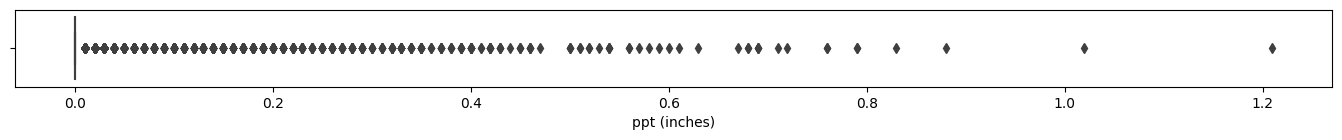

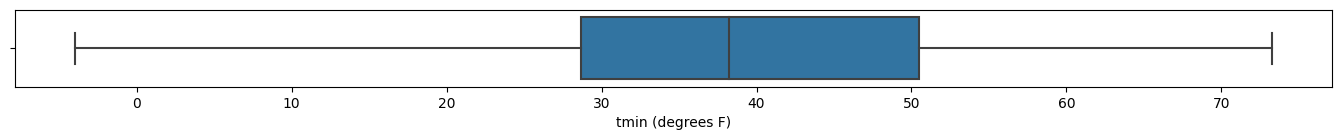

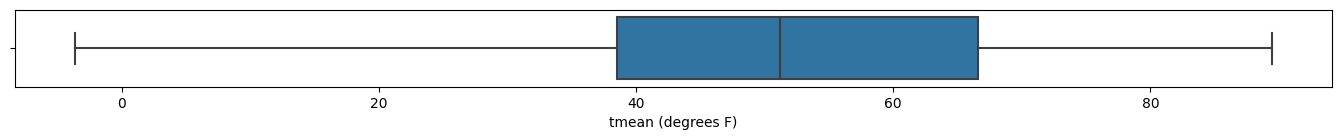

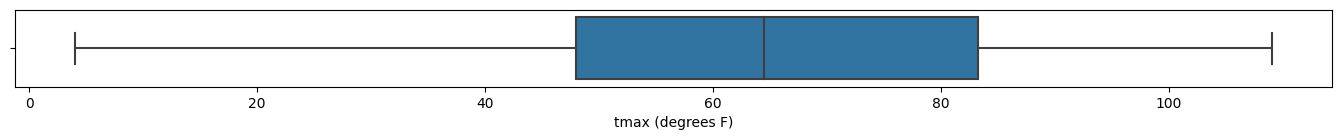

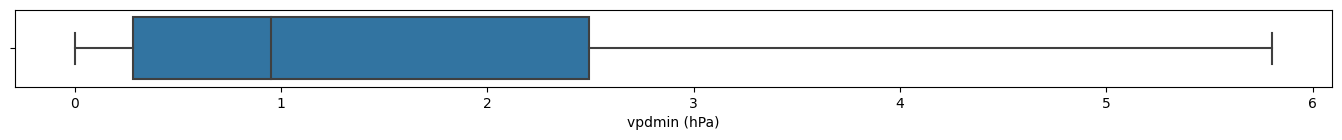

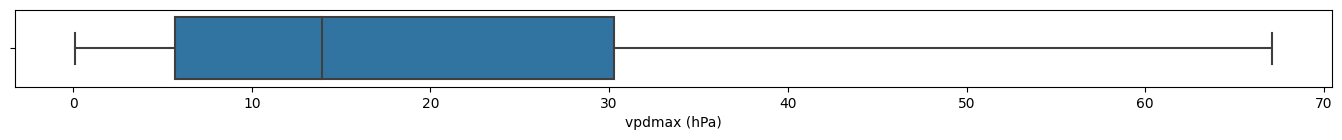

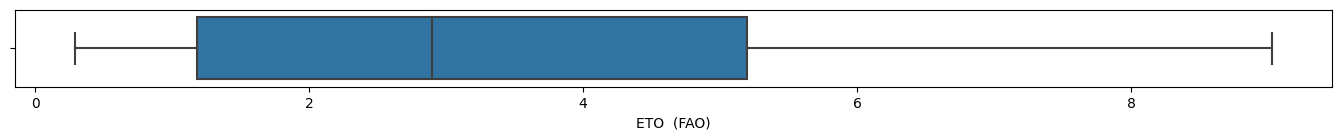

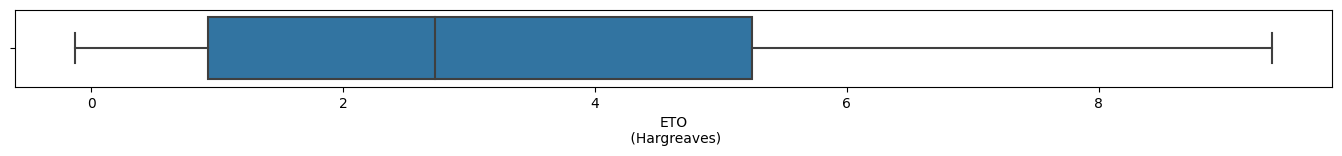

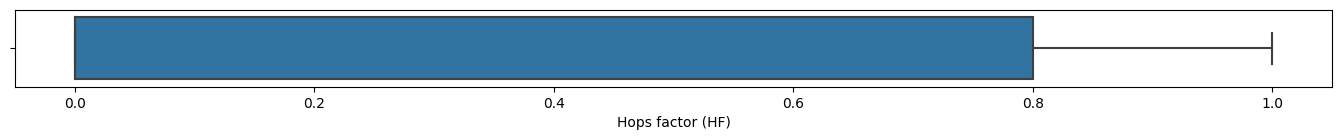

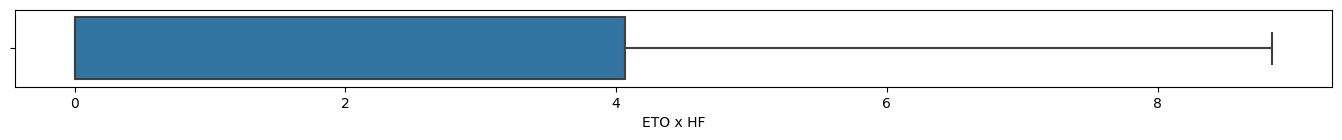

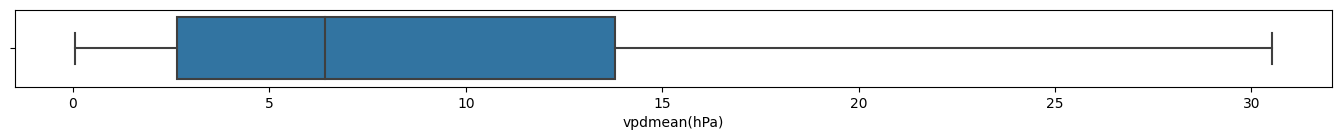

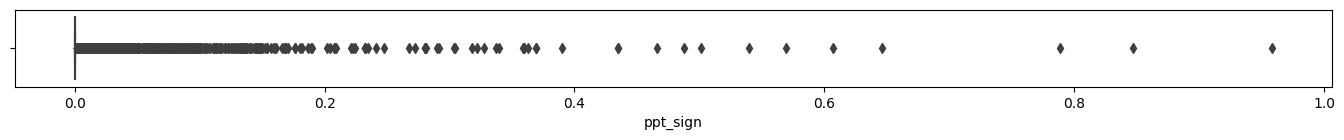

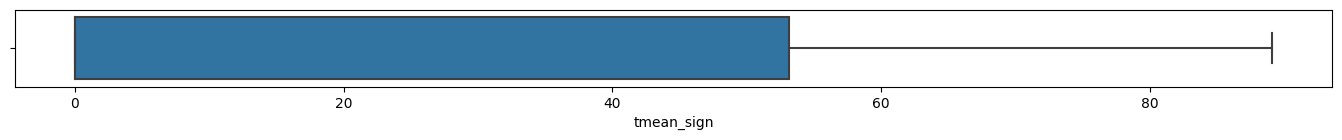

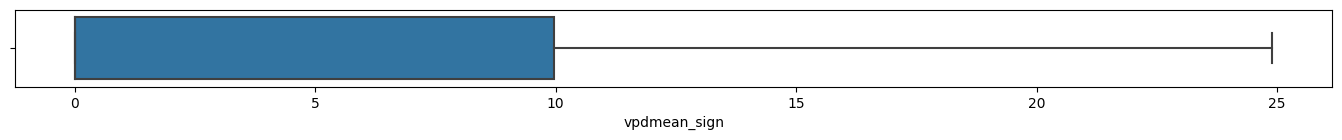

In [1006]:
#after removing
for column in df_climate_ID:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=df_climate_ID, x=column)

In [1007]:
# Convert the index to a datetime format
df_climate_ID.index = pd.to_datetime(df_climate_ID.index)

# Resample the data to annual frequency with custom criteria
df_climate_ID = df_climate_ID.loc['1999-10-01':'2022-10-01'].resample('AS-OCT').mean()

# Set the index to year format
df_climate_ID = df_climate_ID.set_index(df_climate_ID.index.strftime('%Y'))

# Print the resulting DataFrame
df_climate_ID


ppt (inches)  tmin (degrees F)  tmean (degrees F)  tmax (degrees F)  \
Date                                                                        
1999      0.022158         39.881967          53.500820         67.120219   
2000      0.020767         38.418630          51.416438         64.420274   
2001      0.013918         38.283014          51.721096         65.156438   
2002      0.021397         40.047123          53.471507         66.901096   
2003      0.023033         39.828689          52.657923         65.491530   
2004      0.024740         39.032055          51.881918         64.733699   
2005      0.034164         39.461918          52.153151         64.846027   
2006      0.016767         39.110685          52.870411         66.634795   
2007      0.019180         37.565301          50.542896         63.521858   
2008      0.020986         38.598904          51.734521         64.877808   
2009      0.026356         37.370685          49.973699         62.580548   
2010      0.032849         38.123562          50.533425         62.941370   
2011      0.019781         38.232240          52.157923         66.092350   
2012      0.018411         38.841370          51.791507         64.766575   
2013      0.022630         38.435890          51.150685         63.880822   
2014      0.025096         40.409315          53.733973         67.067945   
2015      0.025546         39.921038          53.102459         66.292077   
2016      0.034384         38.573425          51.168356         63.859726   
2017      0.017781         39.301370          52.304384         65.303562   
2018      0.035890         39.178082          51.632603         64.089863   
2019      0.030355         38.419672          51.684973         64.950546   
2020      0.023014         39.299178          52.777534         66.296986   
2021      0.027315         39.281644          51.975616         64.670137   

      vpdmin (hPa)  vpdmax (hPa)  ETO  (FAO)  ЕТО\n (Hargreaves)  \
Date                                                               
1999      1.437486     19.977486    3.391530            3.293525   
2000      1.206014     18.746192    3.316740            3.228548   
2001      1.707973     19.266031    3.312137            3.212932   
2002      1.733342     20.174914    3.369973            3.278712   
2003      1.604331     19.222459    3.278306            3.187678   
2004      1.432959     18.293808    3.222055            3.125671   
2005      1.733247     19.323616    3.280521            3.200932   
2006      2.051014     20.727068    3.396603            3.306548   
2007      1.864413     18.522077    3.193743            3.098634   
2008      1.807658     18.989260    3.253452            3.155041   
2009      1.514493     16.752932    3.079479            2.977726   
2010      1.199589     17.018247    3.100110            3.002548   
2011      1.618566     19.619481    3.342077            3.241749   
2012      1.744178     19.190356    3.287507            3.201315   
2013      1.582616     18.144274    3.230110            3.143397   
2014      1.544027     19.749726    3.396219            3.303836   
2015      1.369126     19.119672    3.350519            3.260246   
2016      1.481849     18.321068    3.236384            3.154110   
2017      1.598205     18.763589    3.275973            3.189808   
2018      1.256589     16.818904    3.140740            3.052329   
2019      1.360178     17.688852    3.212049            3.107158   
2020      2.093589     19.807342    3.364110            3.273014   
2021      1.689384     18.618411    3.223507            3.132000   

      Hops factor (HF)  ETO x HF  vpdmean(hPa)  ppt_sign  tmean_sign  \
Date                                                                   
1999          0.328279  1.869257      9.257883  0.003553   22.357770   
2000          0.329178  1.900471      8.756808  0.003123   22.604326   
2001          0.329178  1.874117      8.768531  0.001467   22.350474   
2002          0.329

As you can see the mean of ppt and vpdmin is reduced and the max value is less than the threshold

In [1008]:
#now we will check the corrleation between the data
#since the data is continous we willl be using pearson correaltion method
df_climate_ID.corr()

ppt (inches)  tmin (degrees F)  tmean (degrees F)  \
ppt (inches)            1.000000          0.050897          -0.230277   
tmin (degrees F)        0.050897          1.000000           0.909947   
tmean (degrees F)      -0.230277          0.909947           1.000000   
tmax (degrees F)       -0.379421          0.774244           0.966906   
vpdmin (hPa)           -0.501356          0.061709           0.237322   
vpdmax (hPa)           -0.578358          0.563209           0.786951   
ETO  (FAO)             -0.509717          0.644257           0.862364   
ЕТО\n (Hargreaves)     -0.488176          0.660634           0.860234   
Hops factor (HF)        0.086611         -0.026869          -0.171736   
ETO x HF               -0.418442          0.496068           0.641961   
vpdmean(hPa)           -0.531508          0.624016           0.834062   
ppt_sign                0.559640          0.050313          -0.086973   
tmean_sign             -0.242982          0.598780           0.651759   
vpdmean_sign           -0.419802          0.490968           0.619071   

                    tmax (degrees F)  vpdmin (hPa)  vpdmax (hPa)  ETO  (FAO)  \
ppt (inches)               -0.379421     -0.501356     -0.578358   -0.509717   
tmin (degrees F)            0.774244      0.061709      0.563209    0.644257   
tmean (degrees F)           0.966906      0.237322      0.786951    0.862364   
tmax (degrees F)            1.000000      0.326974      0.856944    0.922791   
vpdmin (hPa)                0.326974      1.000000      0.615170    0.400597   
vpdmax (hPa)                0.856944      0.615170      1.000000    0.941956   
ETO  (FAO)                  0.922791      0.400597      0.941956    1.000000   
ЕТО\n (Hargreaves)          0.909874      0.403263      0.940784    0.997672   
Hops factor (HF)           -0.243172      0.127736     -0.119124   -0.153034   
ETO x HF                    0.680105      0.445331      0.863179    0.878270   
vpdmean(hPa)                0.890831      0.420894      0.973729    0.965815   
ppt_sign                   -0.164312     -0.220973     -0.441803   -0.400455   
tmean_sign                  0.633009      0.472039      0.759563    0.771748   
vpdmean_sign                0.646542      0.405566      0.873106    0.833395   

                    ЕТО\n (Hargreaves)  Hops factor (HF)  ETO x HF  \
ppt (inches)                 -0.488176          0.086611 -0.418442   
tmin (degrees F)              0.660634         -0.026869  0.496068   
tmean (degrees F)             0.860234         -0.171736  0.641961   
tmax (degrees F)              0.909874         -0.243172  0.680105   
vpdmin (hPa)                  0.403263          0.127736  0.445331   
vpdmax (hPa)                  0.940784         -0.119124  0.863179   
ETO  (FAO)                    0.997672         -0.153034  0.878270   
ЕТО\n (Hargreaves)            1.000000         -0.123644  0.900668   
Hops factor (HF)             -0.123644          1.000000  0.131513   
ETO x HF                      0.900668          0.131513  1.000000   
vpdmean(hPa)                  0.962777         -0.184489  0.857444   
ppt_sign                     -0.412716         -0.042949 -0.554267   
tmean_sign                    0.804915          0.264184  0.906865   
vpdmean_sign                  0.854537          0.074086  0.955817   

                    vpdmean(hPa)  ppt_sign  tmean_sign  vpdmean_sign  
ppt (inches)           -0.531508  0.559640   -0.242982     -0.419802  
tmin (degrees F)        0.624016  0.050313    0.598780      0.490968  
tmean (degrees F)       0.834062 -0.086973    0.651759      0.619071  
tmax (degrees F)        0.890831 -0.164312    0.633009      0.646542  
vpdmin (hPa)            0.420894 -0.220973    0.472039      0.405566  
vpdmax (hPa)            0.973729 -0.441803    0.759563      0.873106  
ETO  (FAO)              0.965815 -0.400455    0.771748      0.833395  
ЕТО\n (Hargreaves)      0.962777 -0.412716    0.804915      0.854537  
Hops factor (HF)       -0.184489 

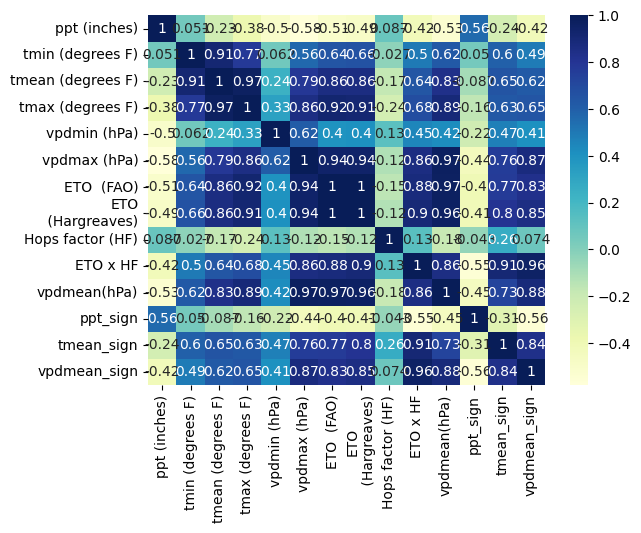

In [1009]:
dataplot = sns.heatmap(df_climate_ID.corr(), cmap="YlGnBu", annot=True)

In [1010]:
df_climate_ID_model=df_climate_ID[["ETO x HF","ppt_sign","tmean_sign","vpdmean_sign","Hops factor (HF)"]]
df_climate_ID_model

ETO x HF  ppt_sign  tmean_sign  vpdmean_sign  Hops factor (HF)
Date                                                                
1999  1.869257  0.003553   22.357770      5.186071          0.328279
2000  1.900471  0.003123   22.604326      5.267897          0.329178
2001  1.874117  0.001467   22.350474      5.034535          0.329178
2002  1.904405  0.005102   22.873022      5.359184          0.329178
2003  1.808499  0.005904   22.291317      4.891117          0.328279
2004  1.809718  0.008221   21.988375      4.893186          0.329178
2005  1.900632  0.004987   22.893458      5.326342          0.329178
2006  1.915309  0.003382   22.901449      5.392919          0.329178
2007  1.815153  0.002801   21.882311      4.885297          0.328279
2008  1.811971  0.007958   22.199633      4.838467          0.329178
2009  1.713418  0.006992   21.133748      4.295121          0.329178
2010  1.737118  0.005411   21.399945      4.507189          0.329178
2011  1.864604  0.003295   22.280984      5.069307          0.328279
2012  1.871680  0.004903   22.840759      5.105296          0.329178
2013  1.829743  0.003841   22.361063      4.830971          0.329178
2014  1.887932  0.005063   22.844077      5.109508          0.329178
2015  1.854889  0.006028   22.110680      4.968512          0.328279
2016  1.871176  0.005641   22.689726      5.082691          0.329178
2017  1.851470  0.003778   22.553400      4.984130          0.329178
2018  1.772953  0.008487   22.170841      4.488223          0.329178
2019  1.756024  0.013660   21.880872      4.489253          0.328279
2020  1.890397  0.006589   22.905625      4.957637          0.329178
2021  1.813962  0.010444   22.317038      4.892453          0.329178

### Modeling of Climate Data

In [1011]:
MergeData_df_ID = (new_df_average_yield_ID.merge(df_climate_ID_model, left_on='Year', right_on='Date').reindex(columns=['Variety',"Total Acre","Hops factor (HF)", "Year",'Average Yield', 'ppt_sign', 'vpdmean_sign',"tmean_sign","ETO x HF","Moving Avg Yield"]))
dropped_values_total_acre = MergeData_df_ID[MergeData_df_ID['Total Acre'] == 0].shape[0]
dropped_values_variety = MergeData_df_ID[MergeData_df_ID['Variety'] == 'Total'].shape[0]

print("Number of dropped values due to 'Total Acre' being 0:", dropped_values_total_acre)
print("Number of dropped values due to 'Variety' being 'Total':", dropped_values_variety)




Number of dropped values due to 'Total Acre' being 0: 1140
Number of dropped values due to 'Variety' being 'Total': 22


In [1012]:
MergeData_df_ID = MergeData_df_ID[MergeData_df_ID['Total Acre'] != 0] # Reset the index of the DataFrameMergeData_df = MergeData_df.reset_index(drop=True)
MergeData_df_ID = MergeData_df_ID[MergeData_df_ID['Variety'] != 'Total'] # Reset the index of the DataFrameMergeData_df = MergeData_df.reset_index(drop=True)

MergeData_df_ID

Variety  Total Acre  Hops factor (HF)  Year  \
5     CTZ - Columbus/Tomahawk/Zeus       403.0          0.329178  2000   
11                         Chinook       170.0          0.329178  2000   
13                         Cluster       198.0          0.329178  2000   
20                          Galena       535.0          0.329178  2000   
32                         Mt Hood        53.0          0.329178  2000   
...                            ...         ...               ...   ...   
1273               Northern Brewer        58.0          0.329178  2021   
1279                          Saaz       330.0          0.329178  2021   
1282                Simcoe, YCR 14       388.0          0.329178  2021   
1293                       Triumph        72.0          0.329178  2021   
1296                    Willamette       389.0          0.329178  2021   

      Average Yield  ppt_sign  vpdmean_sign  tmean_sign  ETO x HF  \
5            2046.0  0.003123      5.267897   22.604326  1.900471   
11           2000.0  0.003123      5.267897   22.604326  1.900471   
13           1943.0  0.003123      5.267897   22.604326  1.900471   
20           1815.0  0.003123      5.267897   22.604326  1.900471   
32           2000.0  0.003123      5.267897   22.604326  1.900471   
...             ...       ...           ...         ...       ...   
1273         1266.0  0.010444      4.892453   22.317038  1.813962   
1279          620.0  0.010444      4.892453   22.317038  1.813962   
1282         1121.0  0.010444      4.892453   22.317038  1.813962   
1293         1063.0  0.010444      4.892453   22.317038  1.813962   
1296         1311.0  0.010444      4.892453   22.317038  1.813962   

      Moving Avg Yield  
5                  0.0  
11                 0.0  
13                 0.0  
20                 0.0  
32                 0.0  
...                ...  
1273               0.0  
1279               0.0  
1282               0.0  
1293               0.0  
1296               0.0  

[136 rows x 10 columns]

In [1013]:
MergeData_df_ID = MergeData_df_ID.rename(columns={'Year': 'ds',
                        'Average Yield': 'y'})

In [1014]:
lst_year = MergeData_df_WA['ds'].unique()
lst_year.sort()
num_train_years = 0.7 * len(MergeData_df_WA['ds'].unique())
train_years = lst_year[0:int(num_train_years + 1)]
test_years = list(set(lst_year) - set(train_years))


In [1015]:
df_train = MergeData_df_WA.loc[MergeData_df_WA['ds'].isin(train_years)]
df_test = MergeData_df_WA.loc[MergeData_df_WA['ds'].isin(test_years)]

In [1016]:
y_train = df_train['y'].values
x_train = df_train.drop(columns= ['y','ds','Variety'], axis=1).values
y_test = df_test['y'].values
x_test = df_test.drop(columns=['y','ds','Variety'], axis=1).values

In [1017]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_vals=rfr.predict(x_test)
pred_train = rfr.predict(x_train)
rfr_test= rfr.score(x_test,y_test)
rfr_train= rfr.score(x_train,y_train)
print('Test set:', rfr_test, 'Train Set:', rfr_train)

Test set: 0.5699806035516426 Train Set: 0.940340589697497


<Axes: >

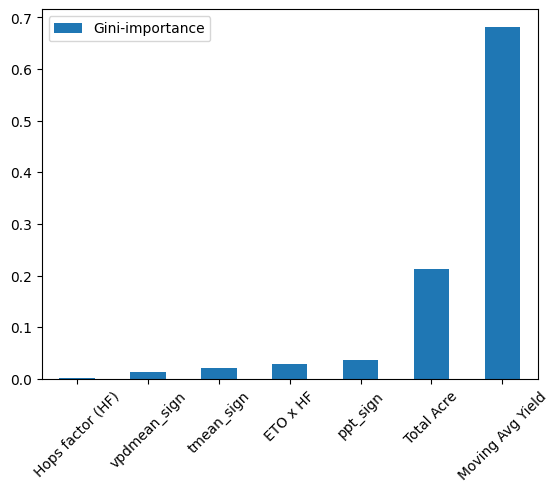

In [1018]:
feats = {}
for feature, importance in zip(df_train.drop(columns= ['y','ds','Variety'], axis=1).columns, rfr.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

<Figure size 1000x600 with 0 Axes>

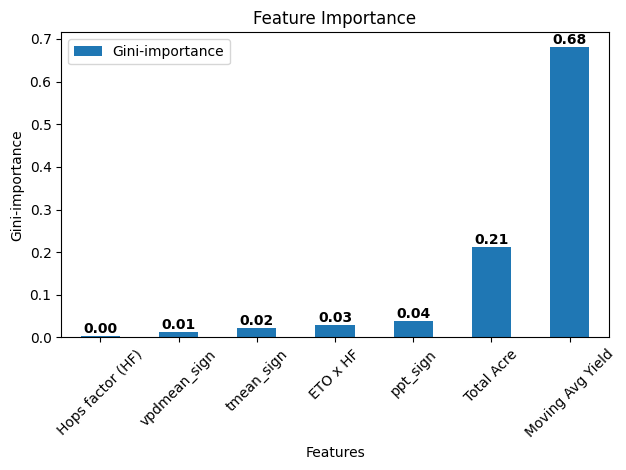

In [1019]:
feats = {}

for feature, importance in zip(df_train.drop(columns=['y', 'ds', 'Variety'], axis=1).columns, rfr.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances_sorted = importances.sort_values(by='Gini-importance')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = importances_sorted.plot(kind='bar', rot=45)
plt.xlabel('Features')
plt.ylabel('Gini-importance')
plt.title('Feature Importance')

for i, v in enumerate(importances_sorted['Gini-importance']):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


Test Statistic

In [1020]:
import math
from sklearn.metrics import mean_absolute_error
MSE = np.square(np.subtract(y_test, rfr_vals)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n", RMSE)
print("Mean Absolute Error:\n", mean_absolute_error(y_test, rfr_vals))

Root Mean Square Error:
 340.2902358752341
Mean Absolute Error:
 254.12039325842701


Train Statistic

In [1021]:
import math
from sklearn.metrics import mean_absolute_error
MSE = np.square(np.subtract(y_train, pred_train)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n", RMSE)
print("Mean Absolute Error:\n", mean_absolute_error(y_train, pred_train))

Root Mean Square Error:
 136.67074637168375
Mean Absolute Error:
 92.97100313479625


In [1022]:
df_train.drop(columns= ['y','ds','Variety'], axis=1).columns

df_test.drop(columns=['y','ds','Variety'], axis=1).columns

Index(['Total Acre', 'Hops factor (HF)', 'ppt_sign', 'vpdmean_sign',
       'tmean_sign', 'ETO x HF', 'Moving Avg Yield'],
      dtype='object')

In [1023]:
coefficients = lr.coef_
coefficients

array([ 3.88912040e-02, -1.96490909e+04,  2.06381636e+04, -1.00999943e+01,
        4.91929588e+00,  3.10334774e+01,  4.94525372e-01])

In [1024]:
#######FORECASTING########
import pandas as pd
from prophet import Prophet


# Read the data into a DataFrame
df = MergeData_df_ID

# Prepare the DataFrame for Prophet
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(df['ds'])
df_prophet['y'] = df['y']
df_prophet['Variety'] = df['Variety']

# Initialize and fit the Prophet model for each variety
forecasts = []
for variety in df_prophet['Variety'].unique():
    df_variety = df_prophet[df_prophet['Variety'] == variety]

    # Check if the variety has sufficient data
    if df_variety['y'].notnull().sum() >= 2:
        # Fill missing values with the mean of available values
        df_variety = df_variety.fillna(df_variety['y'].mean())

        model = Prophet()
        model.fit(df_variety)

        future_dates = pd.DataFrame({'ds': pd.to_datetime(['2023-12-31'])})

        forecast = model.predict(future_dates)
        forecast['Variety'] = variety
        forecast = forecast[['ds', 'Variety', 'yhat']]

        # Set negative values to zero
        forecast['yhat'] = np.where(forecast['yhat'] < 0, 0, forecast['yhat'])

        # Check if the yield is zero
        if forecast['yhat'].iloc[0] != 0:
            forecasts.append(forecast)

# Combine the forecasts for all varieties into a single DataFrame
forecast_all = pd.concat(forecasts)

# Rename the columns to match the original DataFrame
forecast_all = forecast_all.rename(columns={'ds': 'Year', 'yhat': 'Average Yield per acre'})

# Convert the 'Year' column to the desired format
forecast_all['Year'] = forecast_all['Year'].dt.year

# Print the forecast for 2023 for all varieties
forecast_all



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3caqst12/a0ozrrq6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3caqst12/p_77vii1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56837', 'data', 'file=/tmp/tmp3caqst12/a0ozrrq6.json', 'init=/tmp/tmp3caqst12/p_77vii1.json', 'output', 'file=/tmp/tmp3caqst12/prophet_modelg8_zld0k/prophet_model-20230620190003.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:00:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:00:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

Year                       Variety  Average Yield per acre
0  2023  CTZ - Columbus/Tomahawk/Zeus             2669.800642
0  2023                       Chinook             1770.933451
0  2023                       Cluster             3117.312086
0  2023                        Galena             2219.977395
0  2023                    Willamette             2456.948854
0  2023                        Apollo             1132.508950
0  2023                         Bravo             2109.893316
0  2023                       Cascade             1236.231255
0  2023                    Centennial              418.810611
0  2023                Citra, HBC 394             1661.301614
0  2023                     El Dorado             1921.157484
0  2023                  Super Galena              947.679946
0  2023                       Crystal              594.906983
0  2023                Simcoe, YCR 14              928.580516
0  2023                       Calypso             2114.934826
0  2023                        Mosaic             2051.133353
0  2023              Amarillo, VGXP01             1262.316396
0  2023                       Eureka!             1957.113262
0  2023                         Comet              812.173602
0  2023                       Idaho 7             2458.970367
0  2023               Northern Brewer             1520.673127
0  2023                          Saaz             3980.283875
0  2023                      Cashmere             2575.269986
0  2023                       Triumph             3149.370750

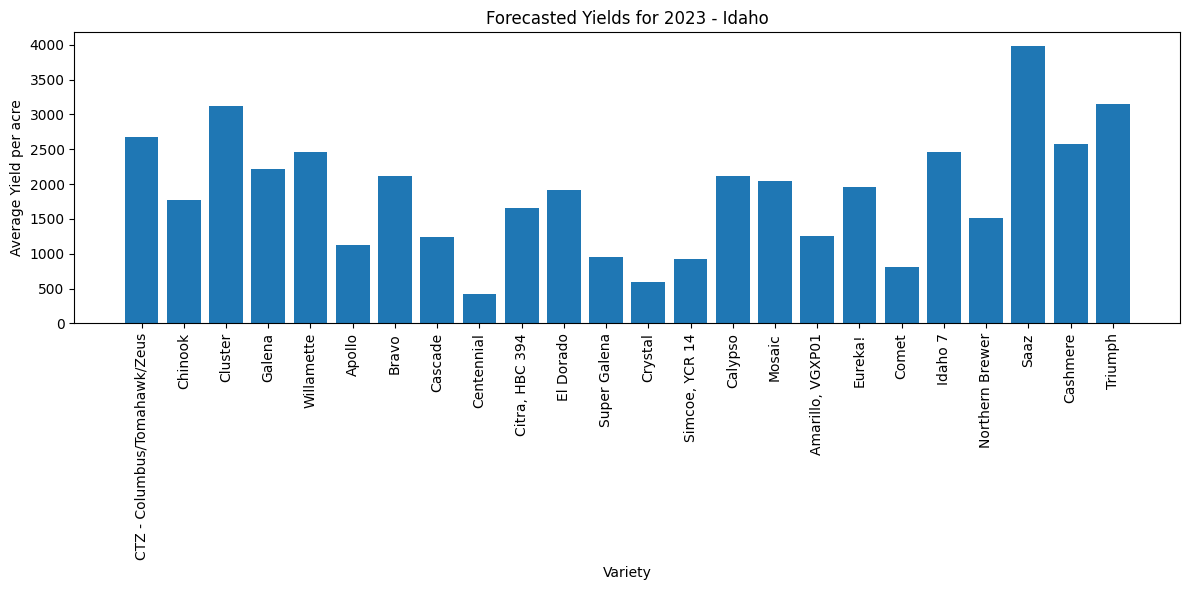

In [1025]:
import matplotlib.pyplot as plt

# Plot the forecasted yields for 2023
plt.figure(figsize=(12, 6))
plt.bar(forecast_all['Variety'], forecast_all['Average Yield per acre'])
plt.xlabel('Variety')
plt.ylabel('Average Yield per acre')
plt.title('Forecasted Yields for 2023 - Idaho')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-1026-b19b9b465edd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_forecast['Year'] = variety_forecast['Year'].astype(int)
<ipython-input-1026-b19b9b465edd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_data['ds'] = variety_data['ds'].dt.year.astype(int)


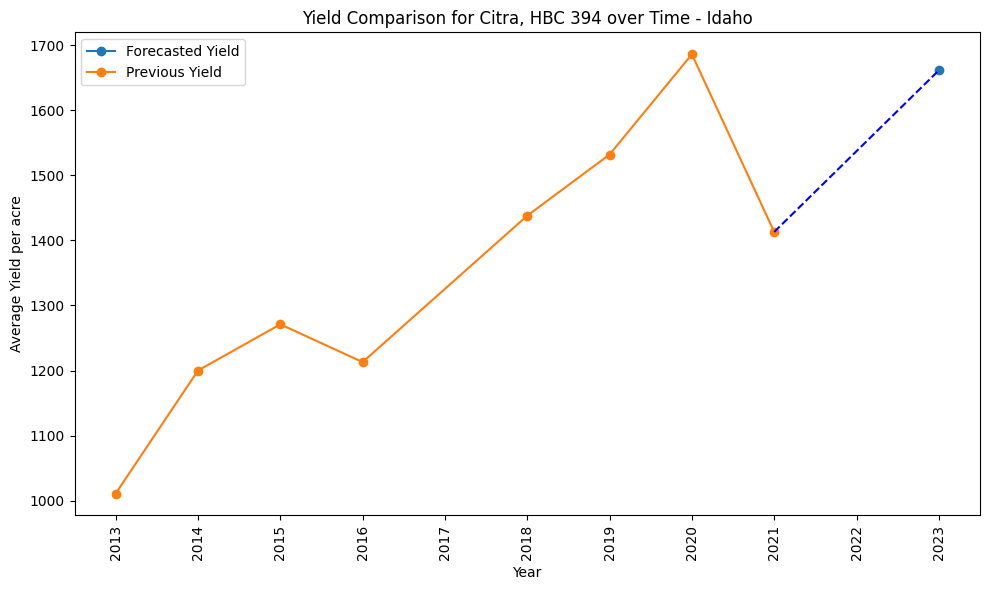

In [1026]:
import matplotlib.pyplot as plt

# Select a specific variety for visualization
variety = 'Citra, HBC 394'

# Filter the forecasted data for the selected variety
variety_forecast = forecast_all[forecast_all['Variety'] == variety]

# Filter the original data for the selected variety
variety_data = df_prophet[df_prophet['Variety'] == variety]

# Convert the year values to integers
variety_forecast['Year'] = variety_forecast['Year'].astype(int)
variety_data['ds'] = variety_data['ds'].dt.year.astype(int)

# Plot the trend of forecasted and previous yields over time
plt.figure(figsize=(10, 6))
plt.plot(variety_forecast['Year'], variety_forecast['Average Yield per acre'], marker='o', label='Forecasted Yield')
plt.plot(variety_data['ds'], variety_data['y'], marker='o', label='Previous Yield')
plt.plot([variety_data['ds'].iloc[-1], variety_forecast['Year'].iloc[0]],
         [variety_data['y'].iloc[-1], variety_forecast['Average Yield per acre'].iloc[0]], color='blue', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Average Yield per acre')
plt.title(f'Yield Comparison for {variety} over Time - Idaho')

# Set the x-axis ticks as discrete years
plt.xticks(range(min(variety_data['ds']), max(variety_forecast['Year']) + 1))

plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-1027-aec7249ff242>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_forecast['Year'] = variety_forecast['Year'].astype(int)
<ipython-input-1027-aec7249ff242>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_data['ds'] = variety_data['ds'].dt.year.astype(int)


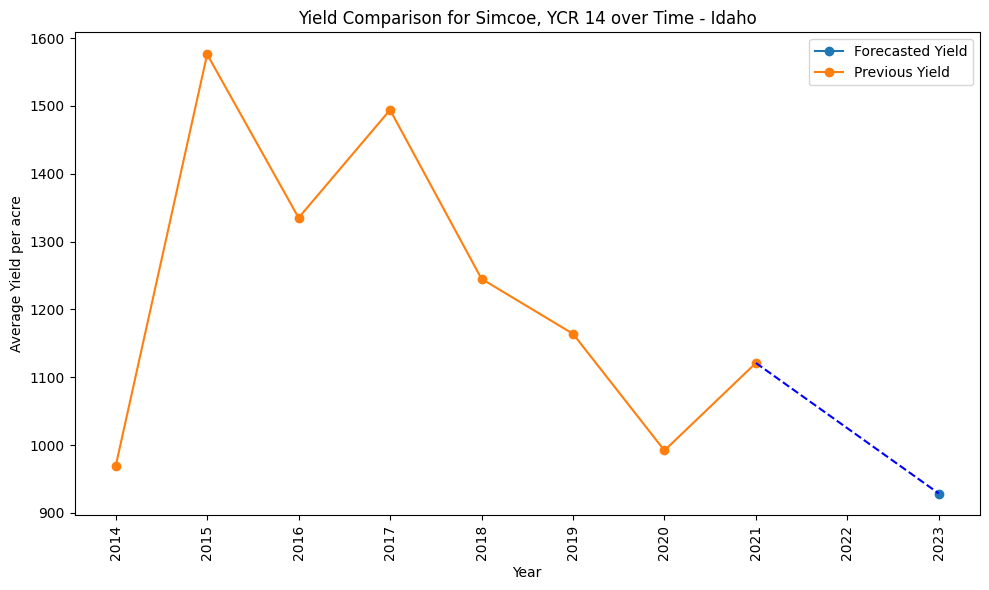

In [1027]:
# Select a specific variety for visualization
variety = 'Simcoe, YCR 14'

# Filter the forecasted data for the selected variety
variety_forecast = forecast_all[forecast_all['Variety'] == variety]

# Filter the original data for the selected variety
variety_data = df_prophet[df_prophet['Variety'] == variety]

# Convert the year values to integers
variety_forecast['Year'] = variety_forecast['Year'].astype(int)
variety_data['ds'] = variety_data['ds'].dt.year.astype(int)

# Plot the trend of forecasted and previous yields over time
plt.figure(figsize=(10, 6))
plt.plot(variety_forecast['Year'], variety_forecast['Average Yield per acre'], marker='o', label='Forecasted Yield')
plt.plot(variety_data['ds'], variety_data['y'], marker='o', label='Previous Yield')
plt.plot([variety_data['ds'].iloc[-1], variety_forecast['Year'].iloc[0]],
         [variety_data['y'].iloc[-1], variety_forecast['Average Yield per acre'].iloc[0]], color='blue', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Average Yield per acre')
plt.title(f'Yield Comparison for {variety} over Time - Idaho')

# Set the x-axis ticks as discrete years
plt.xticks(range(min(variety_data['ds']), max(variety_forecast['Year']) + 1))

plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-1028-b91e580b6cdf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_forecast['Year'] = variety_forecast['Year'].astype(int)
<ipython-input-1028-b91e580b6cdf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_data['ds'] = variety_data['ds'].dt.year.astype(int)


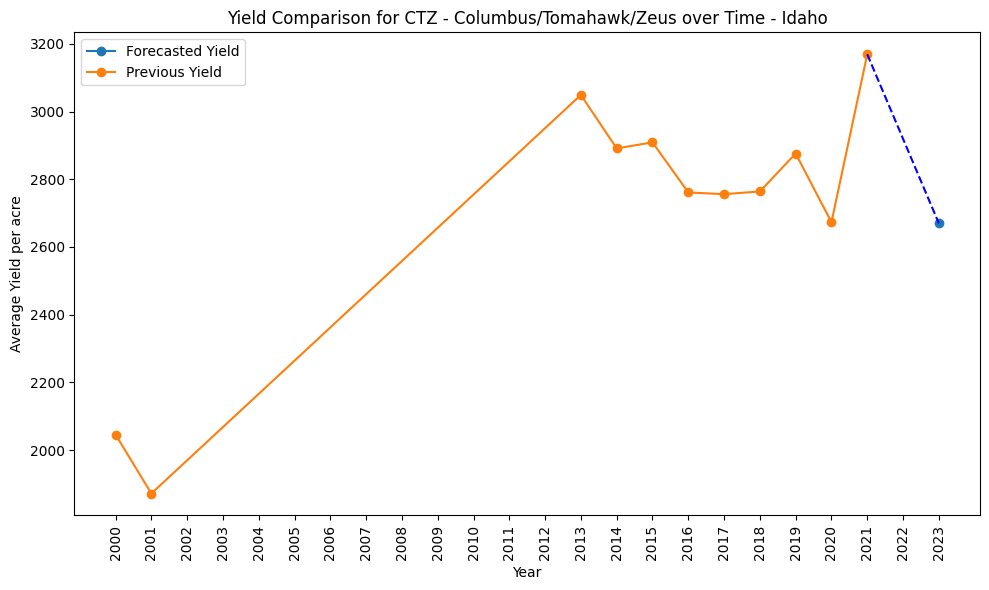

In [1028]:
# Select a specific variety for visualization
variety = 'CTZ - Columbus/Tomahawk/Zeus'

# Filter the forecasted data for the selected variety
variety_forecast = forecast_all[forecast_all['Variety'] == variety]

# Filter the original data for the selected variety
variety_data = df_prophet[df_prophet['Variety'] == variety]

# Convert the year values to integers
variety_forecast['Year'] = variety_forecast['Year'].astype(int)
variety_data['ds'] = variety_data['ds'].dt.year.astype(int)

# Plot the trend of forecasted and previous yields over time
plt.figure(figsize=(10, 6))
plt.plot(variety_forecast['Year'], variety_forecast['Average Yield per acre'], marker='o', label='Forecasted Yield')
plt.plot(variety_data['ds'], variety_data['y'], marker='o', label='Previous Yield')
plt.plot([variety_data['ds'].iloc[-1], variety_forecast['Year'].iloc[0]],
         [variety_data['y'].iloc[-1], variety_forecast['Average Yield per acre'].iloc[0]], color='blue', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Average Yield per acre')
plt.title(f'Yield Comparison for {variety} over Time - Idaho')

# Set the x-axis ticks as discrete years
plt.xticks(range(min(variety_data['ds']), max(variety_forecast['Year']) + 1))

plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

##Analyzing the NASA Data of Idaho


In [1029]:
#Reading the excel file
df_nasa_climate_ID=pd.read_excel(xlsx_file,sheet_name="ID - NASA data",index_col=False)
# if you notice if you remove null values we will elimate the headers
df_nasa_climate_ID
df_nasa_climate_ID=df_nasa_climate_ID.iloc[10:]
df_nasa_climate_ID.columns = df_nasa_climate_ID.iloc[0]
df_nasa_climate_ID=df_nasa_climate_ID.iloc[1:]
test=df_nasa_climate_ID
df_nasa_climate_ID_temp=df_nasa_climate_ID
para=df_nasa_climate_ID["PARAMETER"].unique()
df_nasa_climate_ID_temp.set_index("PARAMETER",inplace=False)

10                  YEAR    JAN    FEB    MAR     APR     MAY     JUN     JUL  \
PARAMETER                                                                       
GWETTOP             1999    0.5   0.56   0.54    0.48    0.42    0.35    0.23   
GWETTOP             2000   0.48   0.52   0.55    0.48    0.42    0.34    0.22   
GWETTOP             2001   0.48   0.49   0.48    0.47     0.4     0.3    0.26   
GWETTOP             2002   0.48   0.48   0.48    0.45    0.38     0.3     0.2   
GWETTOP             2003   0.47   0.51   0.49    0.48    0.45    0.35    0.23   
...                  ...    ...    ...    ...     ...     ...     ...     ...   
CLRSKY_SFC_PAR_TOT  2017  48.24   69.8  98.88  129.36  153.05  161.79   154.7   
CLRSKY_SFC_PAR_TOT  2018  46.29  69.07  98.12  128.63  150.52  162.44  154.48   
CLRSKY_SFC_PAR_TOT  2019  47.33  68.72  96.91  129.19  150.91  162.24  155.62   
CLRSKY_SFC_PAR_TOT  2020  45.83  68.99  98.02  130.62   152.8  161.09  155.95   
CLRSKY_SFC_PAR_TOT  2021     46  69.62  98.72  130.27  152.32  162.88  141.62   

10                     AUG     SEP    OCT    NOV    DEC     ANN  
PARAMETER                                                        
GWETTOP               0.21    0.16   0.18   0.34   0.41    0.37  
GWETTOP               0.16    0.27   0.35   0.42   0.45    0.39  
GWETTOP               0.18     0.2   0.28   0.38   0.45    0.36  
GWETTOP               0.15    0.22   0.22   0.35   0.41    0.34  
GWETTOP               0.24     0.2   0.16    0.3   0.43    0.36  
...                    ...     ...    ...    ...    ...     ...  
CLRSKY_SFC_PAR_TOT  128.54  102.13  77.68  51.98  40.29  101.52  
CLRSKY_SFC_PAR_TOT  122.55  108.76  78.16   52.1  40.24  101.08  
CLRSKY_SFC_PAR_TOT  137.68  107.51  78.09  51.76  39.23  102.26  
CLRSKY_SFC_PAR_TOT  131.39  100.95  75.21  51.31   40.1  101.09  
CLRSKY_SFC_PAR_TOT  121.45   103.4  75.55  52.13  40.37   99.63  

[138 rows x 14 columns]

In [1030]:
from datetime import datetime
row_index=[]
df_nasa_climate_ID_cleaned=pd.DataFrame()
for lista in para:
  df_nasa_climate_ID_cleaned[lista]=np.nan
df_nasa_climate_ID_cleaned
year_list=df_nasa_climate_ID_temp['YEAR'].unique()
for year in year_list:
  for i in range(1,13):
    row_index.append(datetime.strptime(str(year),"%Y"))
df_nasa_climate_ID_cleaned.insert(0,'Date',row_index)
df_nasa_climate_ID_cleaned.set_index('Date', inplace=True)
df_nasa_climate_ID_cleaned
df_nasa_climate_ID_cleaned=df_nasa_climate_ID_cleaned.set_index(df_nasa_climate_ID_cleaned.index.strftime('%Y'))
df_nasa_climate_ID_cleaned

GWETTOP  GWETPROF  GWETROOT  CLOUD_AMT  ALLSKY_SFC_PAR_TOT  \
Date                                                               
1999      NaN       NaN       NaN        NaN                 NaN   
1999      NaN       NaN       NaN        NaN                 NaN   
1999      NaN       NaN       NaN        NaN                 NaN   
1999      NaN       NaN       NaN        NaN                 NaN   
1999      NaN       NaN       NaN        NaN                 NaN   
...       ...       ...       ...        ...                 ...   
2021      NaN       NaN       NaN        NaN                 NaN   
2021      NaN       NaN       NaN        NaN                 NaN   
2021      NaN       NaN       NaN        NaN                 NaN   
2021      NaN       NaN       NaN        NaN                 NaN   
2021      NaN       NaN       NaN        NaN                 NaN   

      CLRSKY_SFC_PAR_TOT  
Date                      
1999                 NaN  
1999                 NaN  
1999                 NaN  
1999                 NaN  
1999                 NaN  
...                  ...  
2021                 NaN  
2021                 NaN  
2021                 NaN  
2021                 NaN  
2021                 NaN  

[276 rows x 6 columns]

In [1031]:
i=0
list_month=df_nasa_climate_ID.columns[2:-1]
for year in year_list:
  for month in list_month:
    for z in para:
      a=test[month][(test["PARAMETER"] ==z) & (test["YEAR"] == year)]
      df_nasa_climate_ID_cleaned[z].iloc[i]=a
    i+=1
list_convert=df_nasa_climate_ID_cleaned.columns
for convert in list_convert:
  df_nasa_climate_ID_cleaned[convert] = df_nasa_climate_ID_cleaned[convert].astype(float)

<ipython-input-1031-4a8743cf5eb7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nasa_climate_ID_cleaned[z].iloc[i]=a


In [1032]:
#Now we will fill the nan values with 0
df_nasa_climate_ID_cleaned=df_nasa_climate_ID_cleaned.fillna(0)


In [1033]:
df_nasa_climate_ID_cleaned.describe([.01,.02,.03,.05,.10,.25,.5,.75,.95,.97,.98,.99])


GWETTOP    GWETPROF    GWETROOT   CLOUD_AMT  ALLSKY_SFC_PAR_TOT  \
count  276.000000  276.000000  276.000000  276.000000          276.000000   
mean     0.386993    0.423768    0.425435   52.253877           76.516848   
std      0.116019    0.052052    0.059484   18.254188           46.710740   
min      0.130000    0.360000    0.350000   14.810000            0.000000   
1%       0.150000    0.360000    0.350000   17.932500            0.000000   
2%       0.160000    0.360000    0.350000   19.125000            0.000000   
3%       0.160000    0.360000    0.350000   20.607500            0.000000   
5%       0.187500    0.360000    0.350000   22.347500            0.000000   
10%      0.220000    0.360000    0.360000   26.825000           21.835000   
25%      0.300000    0.380000    0.370000   37.045000           34.522500   
50%      0.410000    0.410000    0.415000   53.800000           73.045000   
75%      0.480000    0.460000    0.470000   66.960000          120.760000   
95%      0.550000    0.520000    0.530000   80.300000          144.890000   
97%      0.567500    0.527500    0.540000   81.835000          147.475000   
98%      0.595000    0.550000    0.565000   83.345000          148.490000   
99%      0.620000    0.550000    0.570000   84.825000          150.517500   
max      0.620000    0.560000    0.580000   87.450000          157.030000   

       CLRSKY_SFC_PAR_TOT  
count          276.000000  
mean            92.924348  
std             49.750569  
min              0.000000  
1%               0.000000  
2%               0.000000  
3%               0.000000  
5%               0.000000  
10%             40.050000  
25%             51.490000  
50%             98.220000  
75%            137.117500  
95%            161.090000  
97%            161.827500  
98%            162.375000  
99%            162.740000  
max            163.770000

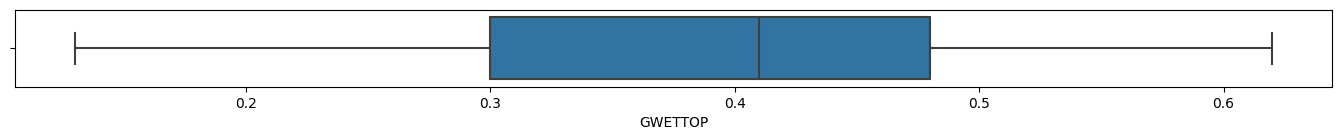

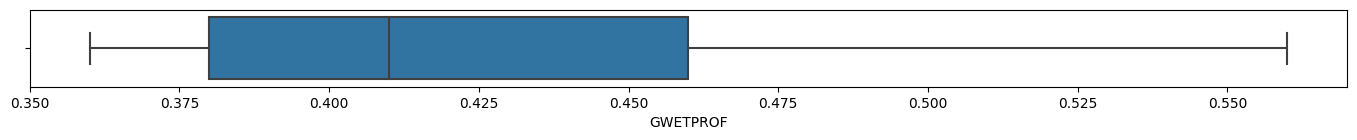

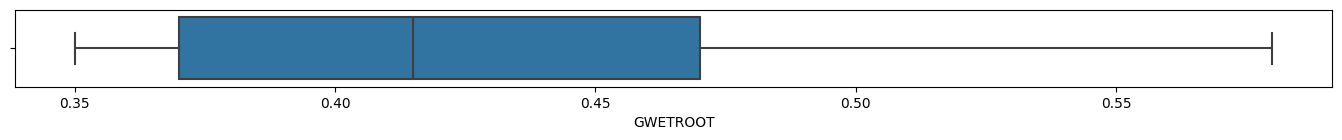

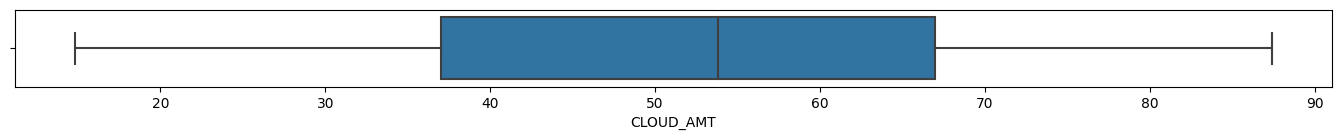

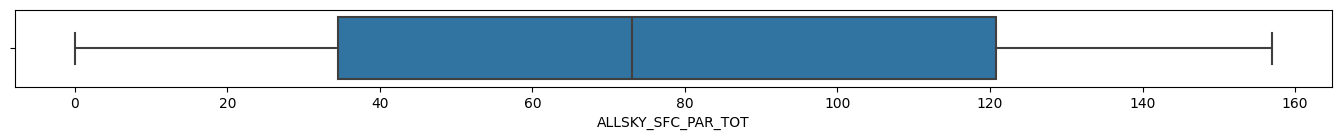

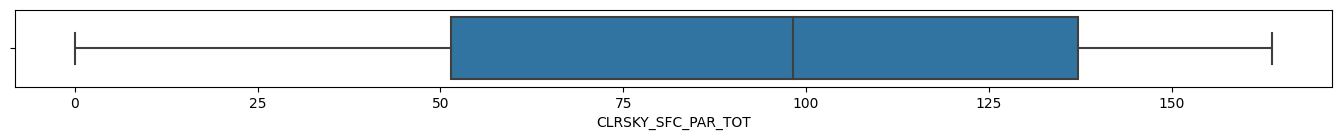

In [1034]:
for column in df_nasa_climate_WA_cleaned:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=df_nasa_climate_ID_cleaned, x=column)

In [1035]:
#To count number of outliers and percentage
import pandas as pd
import numpy as np

# Calculate the Z-score for each variable
z_scores = np.abs((df_nasa_climate_ID_cleaned - df_nasa_climate_ID_cleaned.mean()) / df_nasa_climate_ID_cleaned.std())

# Define a threshold for outliers (e.g., Z-score > 3)
threshold = 3

# Count the number of outliers and calculate the percentage for each variable
outliers_count = {}
outliers_percentage = {}

for column in df_nasa_climate_ID_cleaned.columns:
    outliers_count[column] = len(z_scores[z_scores[column] > threshold])
    outliers_percentage[column] = outliers_count[column] / len(df_nasa_climate_ID_cleaned) * 100

# Print the results
for column in df_nasa_climate_ID_cleaned.columns:
    print("Variable:", column)
    print("Number of outliers:", outliers_count[column])
    print("Percentage of outliers: {:.2f}%".format(outliers_percentage[column]))
    print()

Variable: GWETTOP
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: GWETPROF
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: GWETROOT
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: CLOUD_AMT
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: ALLSKY_SFC_PAR_TOT
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: CLRSKY_SFC_PAR_TOT
Number of outliers: 0
Percentage of outliers: 0.00%



In [1036]:
for column in df_nasa_climate_ID_cleaned:
  q1 = df_nasa_climate_ID_cleaned[column].quantile(0.25)
  q2 = df_nasa_climate_ID_cleaned[column].quantile(0.75)
  IQR = q2 - q1
  max_limit = q2 + (1.5 * IQR)
  min_limit = q1 - (1.5 * IQR)
  percentile25 = df_nasa_climate_ID_cleaned[column].quantile(0.25)
  percentile75 = df_nasa_climate_ID_cleaned[column].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  df_nasa_climate_ID_cleaned[column] = np.where(
      df_nasa_climate_ID_cleaned[column] > upper_limit,
      upper_limit,
      np.where(
          df_nasa_climate_ID_cleaned[column] < lower_limit,
          lower_limit,
          df_nasa_climate_ID_cleaned[column]))


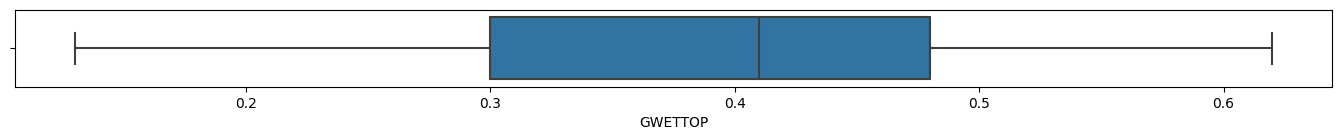

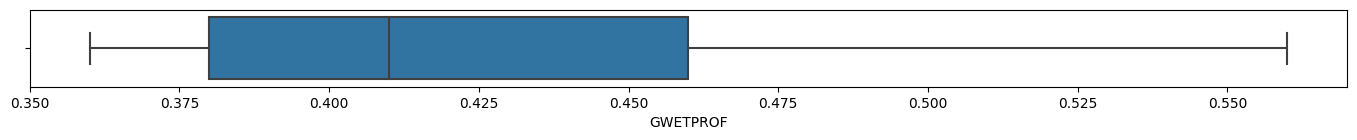

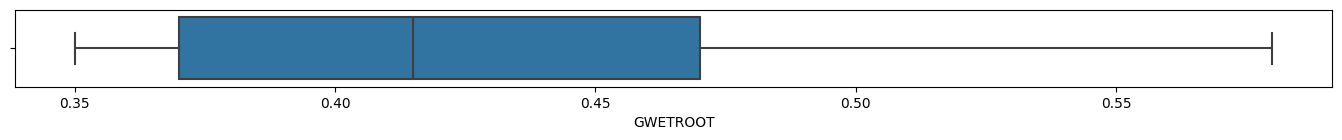

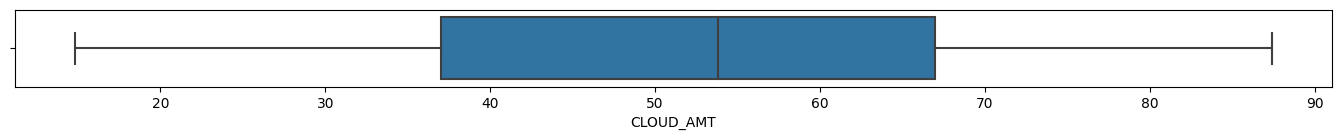

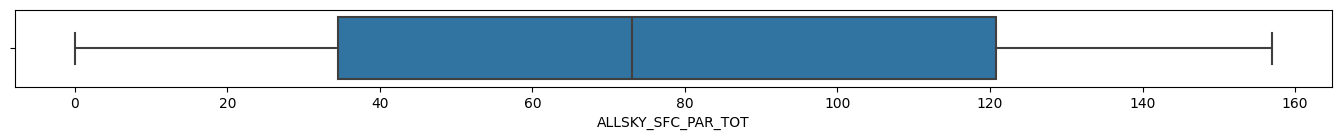

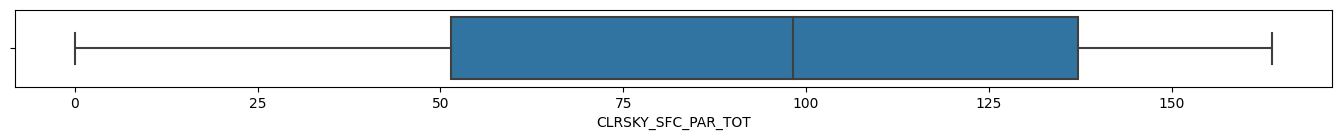

In [1037]:
for column in df_nasa_climate_ID_cleaned:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=df_nasa_climate_ID_cleaned, x=column)

In [1038]:
df_nasa_climate_ID_cleaned=df_nasa_climate_ID_cleaned.groupby(['Date']).mean()
df_nasa_climate_ID_cleaned

GWETTOP  GWETPROF  GWETROOT  CLOUD_AMT  ALLSKY_SFC_PAR_TOT  \
Date                                                                
1999  0.365000  0.425000  0.421667  50.707500            0.000000   
2000  0.388333  0.425833  0.427500  53.276667            0.000000   
2001  0.364167  0.411667  0.411667  54.654167           83.952500   
2002  0.343333  0.404167  0.404167  51.552500           86.203333   
2003  0.359167  0.414167  0.415833  53.526667           84.535000   
2004  0.405833  0.426667  0.429167  54.064167           82.820833   
2005  0.385833  0.419167  0.420833  50.926667           83.668333   
2006  0.435833  0.455833  0.459167  51.381667           84.171667   
2007  0.371667  0.415000  0.417500  50.130000           85.304167   
2008  0.384167  0.420000  0.420000  52.489167           85.697500   
2009  0.395833  0.420000  0.424167  53.754167           82.919167   
2010  0.420833  0.440000  0.442500  58.872500           80.593333   
2011  0.430833  0.449167  0.451667  53.188333           82.595000   
2012  0.355833  0.415833  0.414167  50.321667           83.075833   
2013  0.358333  0.402500  0.402500  48.880833           85.623333   
2014  0.392500  0.423333  0.426667  53.968333           84.359167   
2015  0.399167  0.430833  0.433333  51.200833           83.920833   
2016  0.380833  0.423333  0.424167  50.115000           85.118333   
2017  0.436667  0.450833  0.455833  54.117500           79.849167   
2018  0.362500  0.411667  0.413333  50.769167           83.367500   
2019  0.403333  0.428333  0.431667  52.765833           82.710833   
2020  0.382500  0.416667  0.416667  49.721667           84.568333   
2021  0.378333  0.416667  0.420833  51.454167           84.833333   

      CLRSKY_SFC_PAR_TOT  
Date                      
1999            0.000000  
2000            0.000000  
2001          102.610833  
2002          102.295000  
2003          102.307500  
2004          102.151667  
2005          102.483333  
2006          101.714167  
2007          101.688333  
2008          101.874167  
2009          101.622500  
2010          101.847500  
2011          102.020000  
2012          100.958333  
2013          102.110833  
2014          102.365000  
2015          101.550000  
2016          102.695833  
2017          101.370000  
2018          100.946667  
2019          102.099167  
2020          101.021667  
2021           99.527500

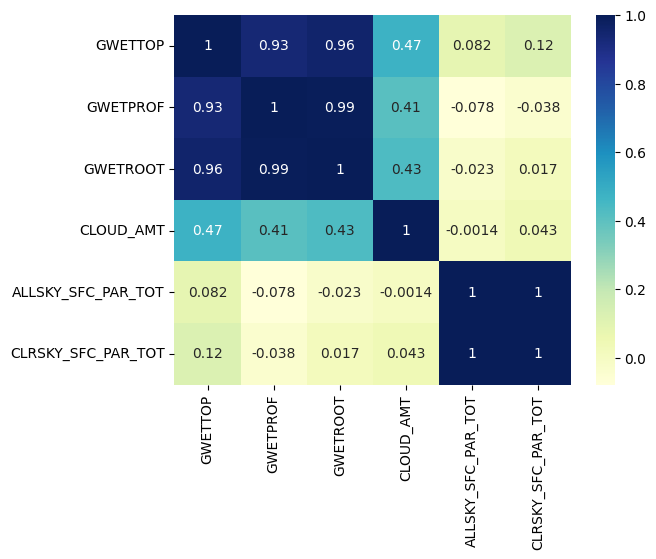

In [1039]:
dataplot = sns.heatmap(df_nasa_climate_ID_cleaned.corr(), cmap="YlGnBu", annot=True)

In [1040]:
MergeData_df_NASA_ID = (new_df_average_yield_ID.merge(df_nasa_climate_ID_cleaned, left_on='Year', right_on='Date').reindex(columns=['Variety',"Total Acre", "Year",'Average Yield', 'GWETTOP', 'GWETPROF','ALLSKY_SFC_PAR_TOT','CLRSKY_SFC_PAR_TOT',"GWETPROF","CLOUD_AMT","Moving Avg Yield"]))
MergeData_df_NASA_ID = MergeData_df_NASA_ID.rename(columns={'Year': 'ds',
                        'Average Yield': 'y'})
MergeData_df_NASA_ID= MergeData_df_NASA_ID.loc[:,~MergeData_df_NASA_ID.columns.duplicated()].copy()
dropped_values_total_acre = MergeData_df_NASA_ID[MergeData_df_NASA_ID['Total Acre'] == 0].shape[0]
dropped_values_variety = MergeData_df_NASA_ID[MergeData_df_NASA_ID['Variety'] == 'Total'].shape[0]

print("Number of dropped values due to 'Total Acre' being 0:", dropped_values_total_acre)
print("Number of dropped values due to 'Variety' being 'Total':", dropped_values_variety)

Number of dropped values due to 'Total Acre' being 0: 1140
Number of dropped values due to 'Variety' being 'Total': 22


In [1041]:
MergeData_df_NASA_ID = MergeData_df_NASA_ID[MergeData_df_NASA_ID['Total Acre'] != 0]
MergeData_df_NASA_ID = MergeData_df_NASA_ID[MergeData_df_NASA_ID['Variety'] != 'Total']

MergeData_df_NASA_ID

Variety  Total Acre    ds       y   GWETTOP  \
5     CTZ - Columbus/Tomahawk/Zeus       403.0  2000  2046.0  0.388333   
11                         Chinook       170.0  2000  2000.0  0.388333   
13                         Cluster       198.0  2000  1943.0  0.388333   
20                          Galena       535.0  2000  1815.0  0.388333   
32                         Mt Hood        53.0  2000  2000.0  0.388333   
...                            ...         ...   ...     ...       ...   
1273               Northern Brewer        58.0  2021  1266.0  0.378333   
1279                          Saaz       330.0  2021   620.0  0.378333   
1282                Simcoe, YCR 14       388.0  2021  1121.0  0.378333   
1293                       Triumph        72.0  2021  1063.0  0.378333   
1296                    Willamette       389.0  2021  1311.0  0.378333   

      GWETPROF  ALLSKY_SFC_PAR_TOT  CLRSKY_SFC_PAR_TOT  CLOUD_AMT  \
5     0.425833            0.000000              0.0000  53.276667   
11    0.425833            0.000000              0.0000  53.276667   
13    0.425833            0.000000              0.0000  53.276667   
20    0.425833            0.000000              0.0000  53.276667   
32    0.425833            0.000000              0.0000  53.276667   
...        ...                 ...                 ...        ...   
1273  0.416667           84.833333             99.5275  51.454167   
1279  0.416667           84.833333             99.5275  51.454167   
1282  0.416667           84.833333             99.5275  51.454167   
1293  0.416667           84.833333             99.5275  51.454167   
1296  0.416667           84.833333             99.5275  51.454167   

      Moving Avg Yield  
5                  0.0  
11                 0.0  
13                 0.0  
20                 0.0  
32                 0.0  
...                ...  
1273               0.0  
1279               0.0  
1282               0.0  
1293               0.0  
1296               0.0  

[136 rows x 10 columns]

In [1042]:
lst_year = MergeData_df_NASA_WA['ds'].unique()
lst_year.sort()
num_train_years = 0.7 * len(MergeData_df_NASA_WA['ds'].unique())
train_years = lst_year[0:int(num_train_years + 1)]
train_years.sort()
test_years = list(set(lst_year) - set(train_years))

In [1043]:
df_train = MergeData_df_NASA_WA.loc[MergeData_df_NASA_WA['ds'].isin(train_years)]
df_test = MergeData_df_NASA_WA.loc[MergeData_df_NASA_WA['ds'].isin(test_years)]

In [1044]:
y_train = df_train['y'].values
x_train = df_train.drop(columns= ['y','ds','Variety'], axis=1).values
y_test = df_test['y'].values
x_test = df_test.drop(columns=['y','ds','Variety'], axis=1).values

In [1045]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_vals=rfr.predict(x_test)
pred_train = rfr.predict(x_train)
rfr_test= rfr.score(x_test,y_test)
rfr_train= rfr.score(x_train,y_train)
print('Test:', rfr_test, 'Train:', rfr_train)

Test: 0.4703683959223125 Train: 0.9380001749720576


R-squared scores - Test:  0.46911734732283605
R-squared scores - Train:  0.9345637849222768


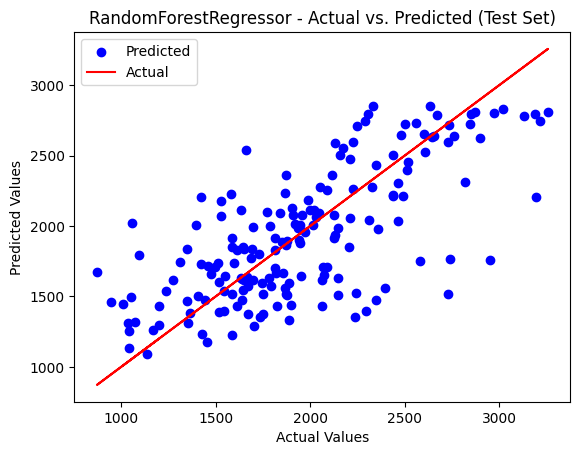

R-squared:  0.46911734732283605


In [1046]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create a RandomForestRegressor model
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

# Make predictions on the test set
rfr_vals = rfr.predict(x_test)
pred_train = rfr.predict(x_train)

# Calculate R-squared scores
rfr_test = rfr.score(x_test, y_test)
rfr_train = rfr.score(x_train, y_train)
print("R-squared scores - Test: ", rfr_test)
print("R-squared scores - Train: ", rfr_train)

# Plot predicted vs. actual values for test set
plt.scatter(y_test, rfr_vals, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RandomForestRegressor - Actual vs. Predicted (Test Set)')
plt.legend()
plt.show()

# Plot feature importances
importances = rfr.feature_importances_
num_features = x_train.shape[1]
indices = np.argsort(importances)




# Calculate and print R-squared score
r2 = r2_score(y_test, rfr_vals)
print("R-squared: ", r2)

<Axes: >

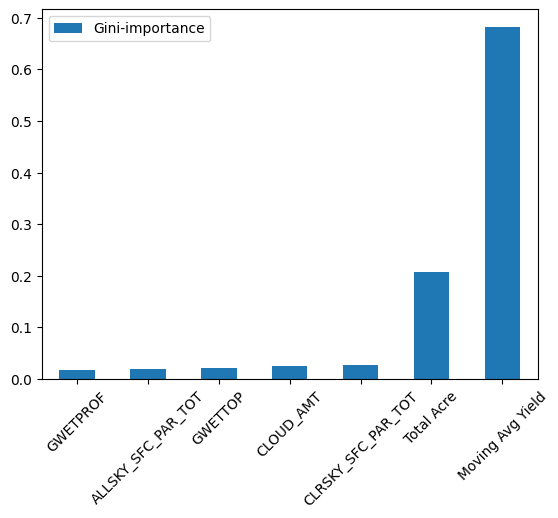

In [1047]:
feats = {}
for feature, importance in zip(df_train.drop(columns= ['y','ds','Variety'], axis=1).columns, rfr.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

<Figure size 1000x600 with 0 Axes>

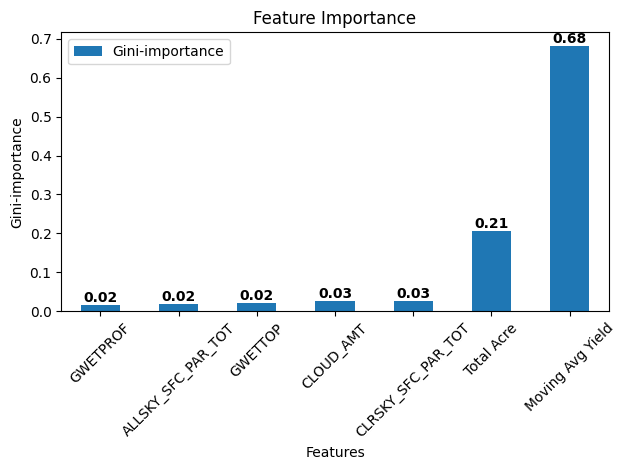

In [1048]:
feats = {}

for feature, importance in zip(df_train.drop(columns=['y', 'ds', 'Variety'], axis=1).columns, rfr.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances_sorted = importances.sort_values(by='Gini-importance')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = importances_sorted.plot(kind='bar', rot=45)
plt.xlabel('Features')
plt.ylabel('Gini-importance')
plt.title('Feature Importance')

for i, v in enumerate(importances_sorted['Gini-importance']):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [1049]:
import math
from sklearn.metrics import mean_absolute_error
MSE = np.square(np.subtract(y_test, rfr_vals)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n", RMSE)
print("Mean Absolute Error:\n", mean_absolute_error(y_test, rfr_vals))

Root Mean Square Error:
 378.09830669380034
Mean Absolute Error:
 285.1884269662921


In [1050]:
import math
from sklearn.metrics import mean_absolute_error
MSE = np.square(np.subtract(y_train, pred_train)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n", RMSE)
print("Mean Absolute Error:\n", mean_absolute_error(y_train, pred_train))

Root Mean Square Error:
 143.13477959196405
Mean Absolute Error:
 95.85238244514106


In [1051]:
#linear
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_vals=lr.predict(x_test)
lr_test= lr.score(x_test,y_test)
lr_train= lr.score(x_train,y_train)
print('Test:', lr_test, 'Train:' , lr_train)

Test: 0.3982711807189703 Train: 0.46342055286301564


R-squared scores - Test: 0.3982711807189703
R-squared scores - Train: 0.46342055286301564


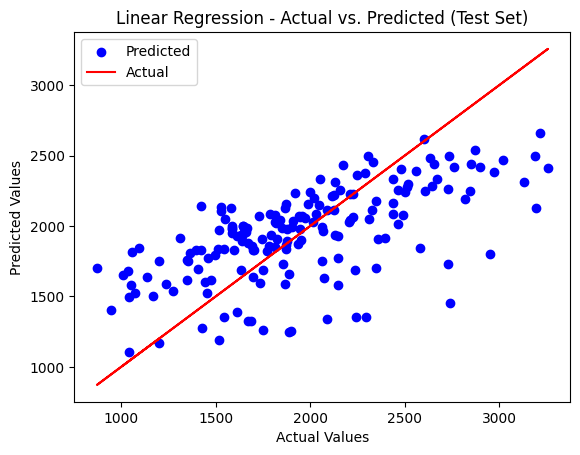

R-squared: 0.3982711807189703


In [1052]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create a Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Make predictions on the test set
lr_vals = lr.predict(x_test)

# Calculate R-squared scores
lr_test = lr.score(x_test, y_test)
lr_train = lr.score(x_train, y_train)
print("R-squared scores - Test:", lr_test)
print("R-squared scores - Train:", lr_train)

# Plot predicted vs. actual values for test set
plt.scatter(y_test, lr_vals, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - Actual vs. Predicted (Test Set)')
plt.legend()
plt.show()

# Calculate and print R-squared score
r2 = r2_score(y_test, lr_vals)
print("R-squared:", r2)

In [1053]:
df_train.drop(columns= ['y','ds','Variety'], axis=1).columns

df_test.drop(columns=['y','ds','Variety'], axis=1).columns

Index(['Total Acre', 'GWETTOP', 'GWETPROF', 'ALLSKY_SFC_PAR_TOT',
       'CLRSKY_SFC_PAR_TOT', 'CLOUD_AMT', 'Moving Avg Yield'],
      dtype='object')

In [1054]:
coefficients = lr.coef_
coefficients

array([ 3.88912040e-02, -1.96490909e+04,  2.06381636e+04, -1.00999943e+01,
        4.91929588e+00,  3.10334774e+01,  4.94525372e-01])

#Oregon Analysis

##Climate of Oregon Dataset


### To create 2 Datasets for Oregon and 1 for total acres harvested with year as y columns and variety as rows. Aonther data frame would be for average Yield

In [1055]:
# Create a temp data frame where will store the values
df_total_acre_OR=pd.DataFrame([])
df_average_yield_OR=pd.DataFrame([])
#Itrateing through each sheet from 2000 to 2003 to get the total acre harvested based at the Washington sheet
for x in range(2000,2023):
  df_x = pd.read_excel(xlsx_file, str(x),header=[0, 1])
  # to Get the value of Oregon city
  df_oregon_acre=df_x["Total acres harvested by location"]["Oregon"]
  df_oregon_Yield=df_x["Average yield per acre by location"]["Oregon"]
  # to get the list of variety
  df_year=df_x["Year: " + str(x)]
  # to create A df with respect to Variety and idaho
  df_concat_acre=pd.concat([df_year,df_oregon_acre], axis=1, join='inner')
  df_concat_Yield=pd.concat([df_year,df_oregon_Yield], axis=1, join='inner')
  # to set the index of Row as Variety
  df_concat_acre.set_index('Variety', inplace=True)
  df_concat_Yield.set_index('Variety', inplace=True)
  # to Rename the column to year
  result_acre= df_concat_acre.rename(columns={'idaho': str(x)})
  result_Yield=df_concat_Yield.rename(columns={'idaho': str(x)})
  # appending the data of each year to the Temp DataFrame
  df_total_acre_OR.insert(0,str(x),result_acre,allow_duplicates=False)
  df_average_yield_OR.insert(0,str(x),result_Yield,allow_duplicates=False)

In [1056]:
list_avg=[]
list_acr=[]
#df_year=df_x["Year: " + str(x)]
variety_list=df_year.values
variety_list=list(chain.from_iterable(variety_list))
for x in range(2000,2023):
  for variety in variety_list:
    list_avg.append({"Location":"Oregon","Year":str(x),"Variety":variety,"Average Yield":df_average_yield_OR[str(x)][variety]})
    list_acr.append(df_total_acre_OR[str(x)][variety])
new_df_average_yield_OR=pd.DataFrame.from_dict(list_avg)
new_df_average_yield_OR['Total Acre'] = list_acr
new_df_average_yield_OR

Location  Year           Variety  Average Yield  Total Acre
0      Oregon  2000    Ahtanum, YCR 1            NaN         NaN
1      Oregon  2000  Amarillo, VGXP01            NaN         NaN
2      Oregon  2000            Apollo            NaN         NaN
3      Oregon  2000  Azacca, ADHA-483            NaN         NaN
4      Oregon  2000             Bravo            NaN         NaN
...       ...   ...               ...            ...         ...
1352   Oregon  2022          Vanguard            NaN         NaN
1353   Oregon  2022    Warrior, YCR 5            NaN         NaN
1354   Oregon  2022        Willamette         1489.0       471.0
1355   Oregon  2022             Zappa            NaN         NaN
1356   Oregon  2022             Total         1728.0      7756.0

[1357 rows x 5 columns]

### EDA of Total acres harvested in OR


In [1057]:
#First we will check if there are any null values or not
df_total_acre_OR.isnull().sum()
#Replacing the values of nulls and checking it again
df_total_acre_OR.fillna(0,inplace=True)
df_total_acre_OR.isnull().sum()

2022    0
2021    0
2020    0
2019    0
2018    0
2017    0
2016    0
2015    0
2014    0
2013    0
2012    0
2011    0
2010    0
2009    0
2008    0
2007    0
2006    0
2005    0
2004    0
2003    0
2002    0
2001    0
2000    0
dtype: int64

### Cleaning the Data of the Average Yield of Oregon


In [1058]:
# First we will check if there are any null values or not
new_df_average_yield_OR.isnull().sum()
new_df_average_yield_OR=new_df_average_yield_OR.fillna(0)

In [1059]:
new_df_average_yield_OR=new_df_average_yield_OR.groupby(['Variety','Year']).sum()
new_df_average_yield_OR.reset_index(inplace=True)
new_df_average_yield_OR

<ipython-input-1059-3ff708f963b4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df_average_yield_OR=new_df_average_yield_OR.groupby(['Variety','Year']).sum()


Variety  Year  Average Yield  Total Acre
0     Ahtanum, YCR 1  2000            0.0         0.0
1     Ahtanum, YCR 1  2001            0.0         0.0
2     Ahtanum, YCR 1  2002            0.0         0.0
3     Ahtanum, YCR 1  2003            0.0         0.0
4     Ahtanum, YCR 1  2004            0.0         0.0
...              ...   ...            ...         ...
1352           Zappa  2018            0.0         0.0
1353           Zappa  2019            0.0         0.0
1354           Zappa  2020            0.0         0.0
1355           Zappa  2021            0.0         0.0
1356           Zappa  2022            0.0         0.0

[1357 rows x 4 columns]

In [1060]:
new_df_average_yield_OR['Moving Avg Yield'] = new_df_average_yield_OR.groupby('Variety').rolling(3)['Average Yield'].mean().reset_index(drop=True)
new_df_average_yield_OR=new_df_average_yield_OR.fillna(0)

<ipython-input-1061-6154630f843b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=16)
<ipython-input-1061-6154630f843b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=16)
<ipython-input-1061-6154630f843b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=16)
<ipython-input-1061-6154630f843b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=16)


Text(0, 0.5, 'Average yield per acre by location')

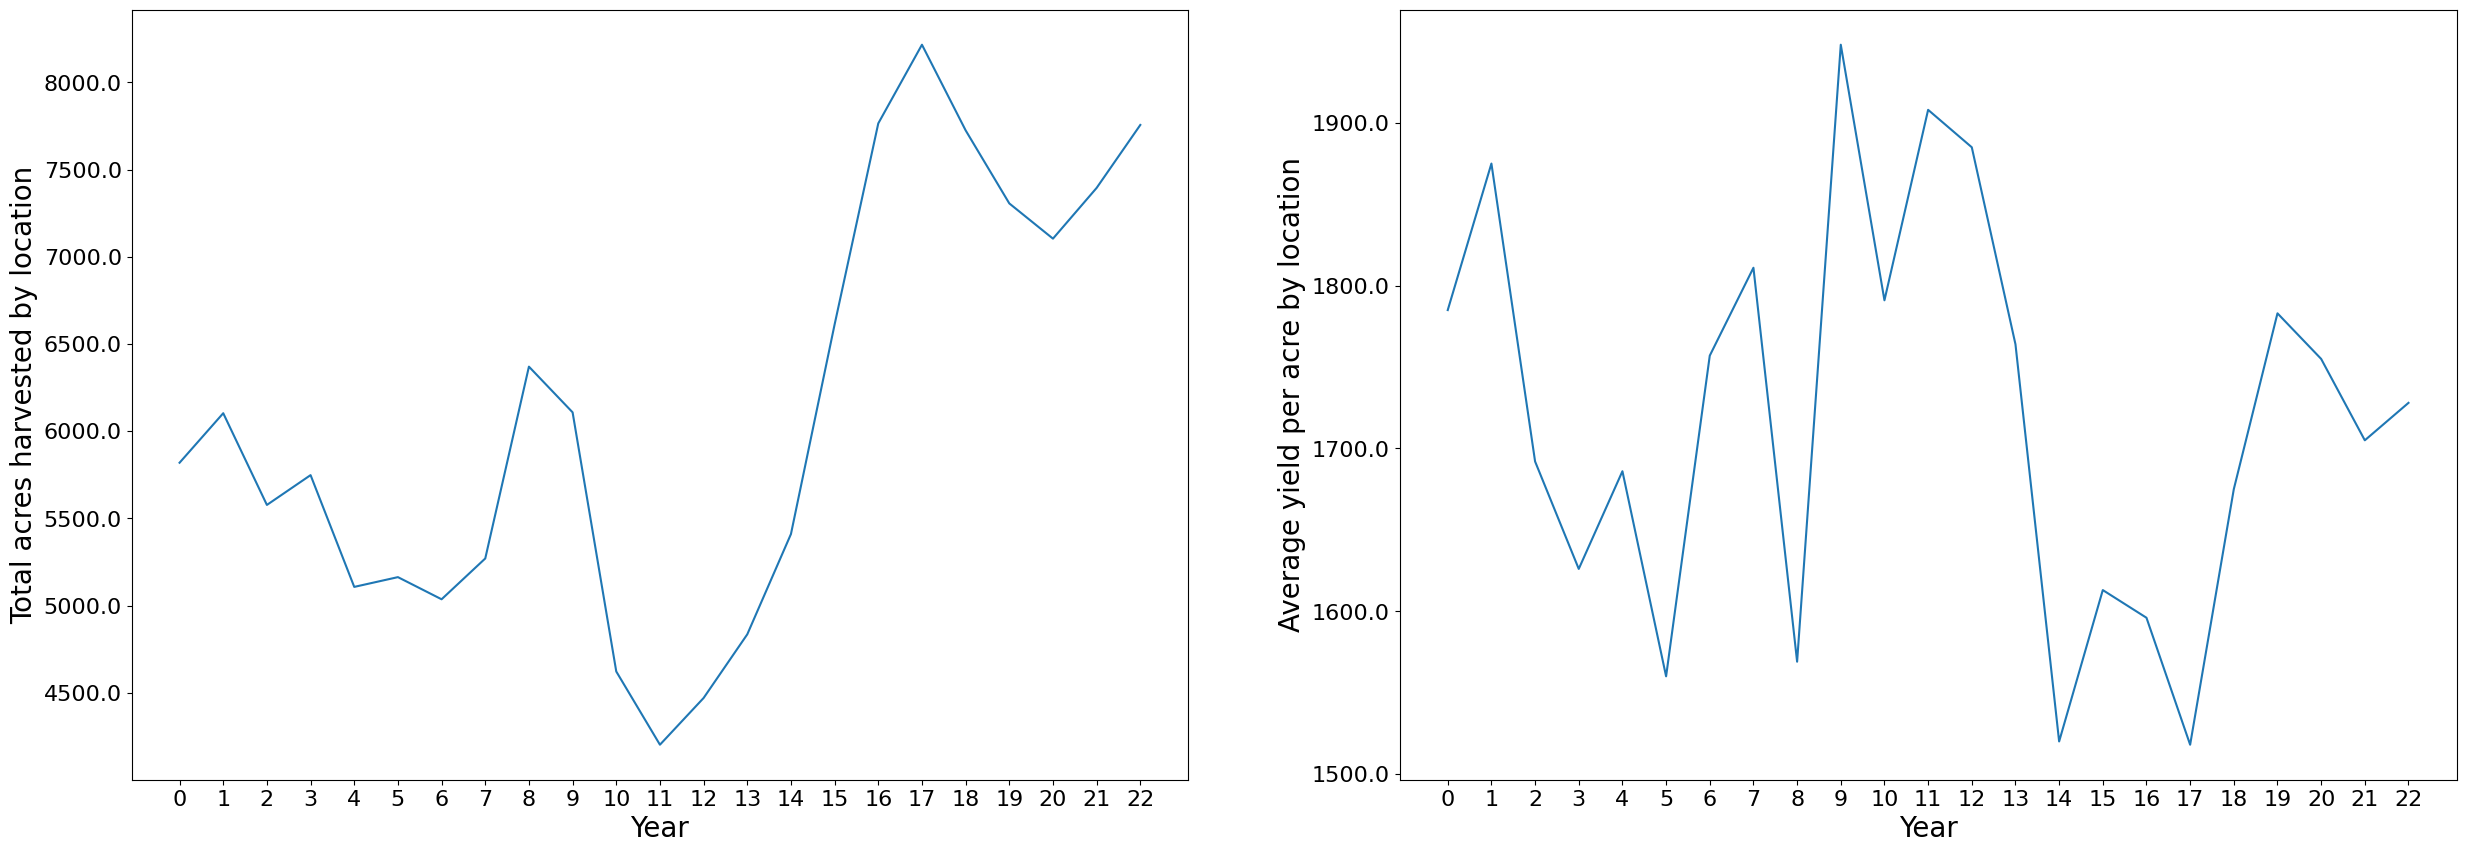

<Figure size 640x480 with 0 Axes>

In [1061]:
fig, axs = plt.subplots(ncols=2, figsize=(30, 10))
sns.lineplot(data=df_total_acre_OR.loc['Total'].iloc[::-1],ax=axs[0])
figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=df_average_yield_OR.loc['Total'].iloc[::-1],ax=axs[1])
axs[0].set(xlabel="Year", ylabel="Total acres harvested by location")
axs[1].set(xlabel="Year", ylabel="Average yield per acre by location")
# Increase font size of x-axis and y-axis labels
axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=16)
axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=16)
axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=16)
axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=16)

# Increase font size of x-axis and y-axis titles
axs[0].set_xlabel(axs[0].get_xlabel(), fontsize=20)
axs[0].set_ylabel(axs[0].get_ylabel(), fontsize=20)
axs[1].set_xlabel(axs[1].get_xlabel(), fontsize=20)
axs[1].set_ylabel(axs[1].get_ylabel(), fontsize=20)


<ipython-input-1062-798bb0d2a28d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=16)
<ipython-input-1062-798bb0d2a28d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=16)
<ipython-input-1062-798bb0d2a28d>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=16)
<ipython-input-1062-798bb0d2a28d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=16)


Text(0, 0.5, 'Number of Varieties ')

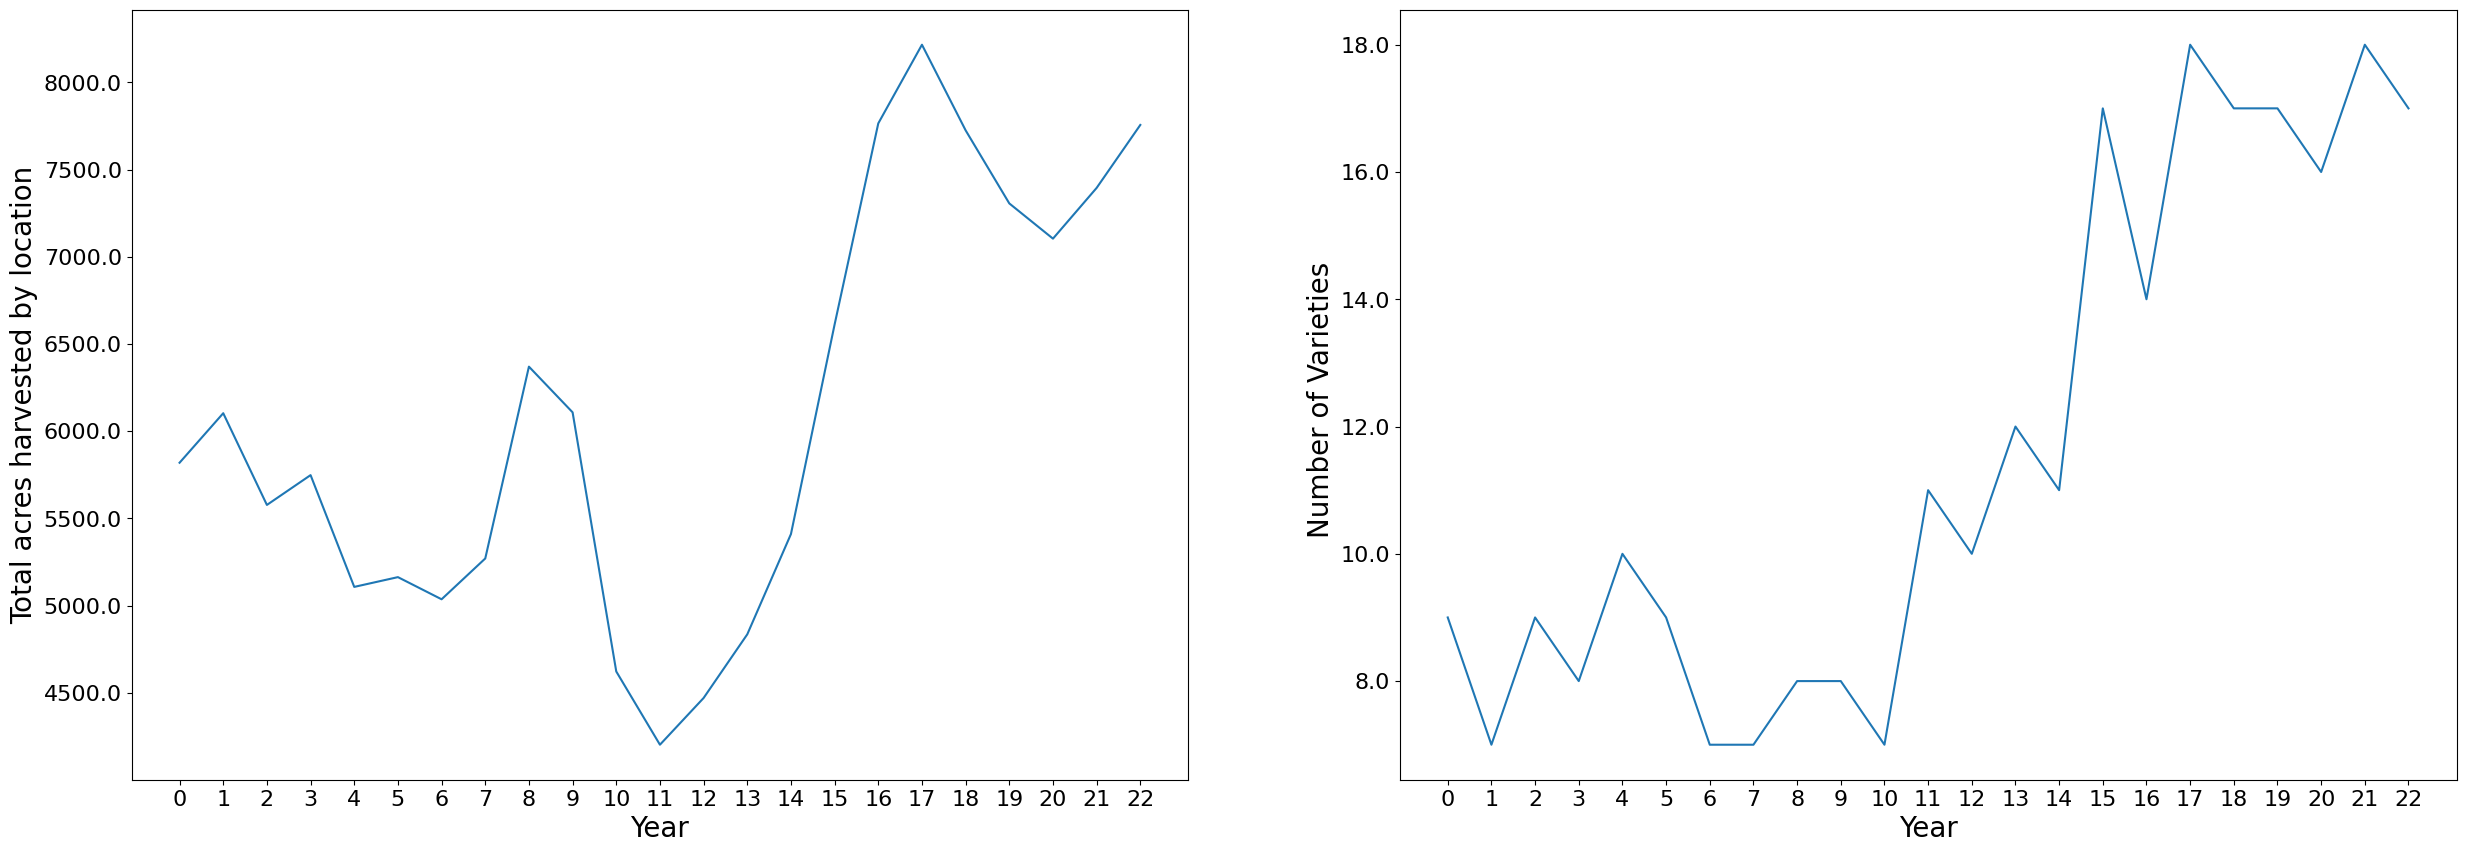

<Figure size 640x480 with 0 Axes>

In [1062]:
fig, axs = plt.subplots(ncols=2, figsize=(30, 10))
sns.lineplot(data=df_total_acre_OR.loc['Total'].iloc[::-1],ax=axs[0])
figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=df_total_acre_OR[df_total_acre_OR > 1.0].count().iloc[::-1],ax=axs[1])
axs[0].set(xlabel="Year", ylabel="Total acres harvested by location")
axs[1].set(xlabel="Year", ylabel="Number of Varieties ")
# Increase font size of x-axis and y-axis labels
axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=16)
axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=16)
axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=16)
axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=16)

# Increase font size of x-axis and y-axis titles
axs[0].set_xlabel(axs[0].get_xlabel(), fontsize=20)
axs[0].set_ylabel(axs[0].get_ylabel(), fontsize=20)
axs[1].set_xlabel(axs[1].get_xlabel(), fontsize=20)
axs[1].set_ylabel(axs[1].get_ylabel(), fontsize=20)

### Climate DataSet



As you can you as the acres increases the Yield is reduced. To find the reason behind it will anlyze the climate Data of the reqgion Washigton


In [1063]:
df_climate_OR=pd.read_excel(xlsx_file,sheet_name="ID climate data")
df_climate_OR
# now we will convert Date to Datetime index

df_climate_OR.Date = pd.to_datetime(df_climate_OR.Date)

cyclic_Data=df_climate_OR["Hops factor (HF)"].dropna()
cyclic_Data
df_climate_OR["Hops factor (HF)"]= df_climate_OR.index.map(dict(zip(df_climate_OR.index, cycle(cyclic_Data))))
df_climate_OR["ETO x HF"]=df_climate_OR["Hops factor (HF)"]*df_climate_OR["ETO  (FAO)"]
df_climate_OR["vpdmean(hPa)"]=(df_climate_OR["vpdmax (hPa)"]-df_climate_OR["vpdmin (hPa)"])/2
df_climate_OR["ppt_sign"]=df_climate_OR["Hops factor (HF)"]*df_climate_OR["ppt (inches)"]
df_climate_OR["tmean_sign"]=df_climate_OR["Hops factor (HF)"]*df_climate_OR["tmean (degrees F)"]
df_climate_OR["vpdmean_sign"]=df_climate_OR["Hops factor (HF)"]*df_climate_OR["vpdmean(hPa)"]

# to check if the year is leap year or not
df_climate_OR

Date  ppt (inches)  tmin (degrees F)  tmean (degrees F)  \
0    1999-01-01           0.1              32.2               38.0   
1    1999-01-02           0.0              25.2               34.2   
2    1999-01-03           0.0              23.7               32.6   
3    1999-01-04           0.0              21.3               31.0   
4    1999-01-05           0.0              22.0               31.0   
...         ...           ...               ...                ...   
8669 2022-09-26           0.0              44.5               64.0   
8670 2022-09-27           0.0              44.4               64.8   
8671 2022-09-28           0.0              46.9               67.4   
8672 2022-09-29           0.0              52.6               71.0   
8673 2022-09-30           0.0              51.0               62.7   

      tmax (degrees F)  vpdmin (hPa)  vpdmax (hPa)  ETO  (FAO)  \
0                 43.8          0.03          2.25        0.72   
1                 43.3          0.11          3.81        0.80   
2                 41.6          0.11          2.95        0.77   
3                 40.6          0.06          3.35        0.78   
4                 40.0          0.00          2.54        0.75   
...                ...           ...           ...         ...   
8669              83.4          2.09         31.21        4.02   
8670              85.2          2.35         33.79        4.15   
8671              88.0          2.65         36.14        4.27   
8672              89.3          5.41         40.63        4.15   
8673              74.5          2.92         21.51        2.87   

      ЕТО\n (Hargreaves)  Hops factor (HF)  ETO x HF  vpdmean(hPa)  ppt_sign  \
0                   0.50               0.0       0.0         1.110       0.0   
1                   0.56               0.0       0.0         1.850       0.0   
2                   0.54               0.0       0.0         1.420       0.0   
3                   0.53               0.0       0.0         1.645       0.0   
4                   0.52               0.0       0.0         1.270       0.0   
...                  ...               ...       ...           ...       ...   
8669                3.74               0.0       0.0        14.560       0.0   
8670                3.83               0.0       0.0        15.720       0.0   
8671                3.96               0.0       0.0        16.745       0.0   
8672                3.88               0.0       0.0        17.610       0.0   
8673                2.72               0.0       0.0         9.295       0.0   

      tmean_sign  vpdmean_sign  
0            0.0           0.0  
1            0.0           0.0  
2            0.0           0.0  
3            0.0           0.0  
4            0.0           0.0  
...          ...           ...  
8669         0.0           0.0  
8670         0.0           0.0  
8671         0.0           0.0  
8672         0.0           0.0  
8673         0.0           0.0  

[8674 rows x 15 columns]

Since there is alot of data point and it would be diffcult to map we will be taking a frequency of each month and then avg of that year

In [1064]:
#now we will do the quantative analysis of the the data
df_climate_OR.describe([.01,.02,.03,.05,.10,.25,.5,.75,.95,.97,.98,.99])

ppt (inches)  tmin (degrees F)  tmean (degrees F)  tmax (degrees F)  \
count   8674.000000       8674.000000        8674.000000       8674.000000   
mean       0.024097         39.000288          52.097129         65.198075   
std        0.072060         13.698944          16.836501         20.594404   
min        0.000000        -17.800000          -6.900000          4.000000   
1%         0.000000          8.200000          16.773000         24.300000   
2%         0.000000         12.800000          21.500000         28.500000   
3%         0.000000         15.119000          23.819000         30.619000   
5%         0.000000         18.000000          26.765000         33.600000   
10%        0.000000         22.000000          30.900000         38.300000   
25%        0.000000         28.700000          38.500000         48.025000   
50%        0.000000         38.200000          51.200000         64.500000   
75%        0.000000         50.500000          66.600000         83.300000   
95%        0.150000         60.635000          78.435000         96.835000   
97%        0.210000         62.100000          79.981000         98.781000   
98%        0.260000         63.300000          81.000000         99.800000   
99%        0.350000         64.827000          82.400000        101.300000   
max        1.210000         73.300000          89.500000        109.100000   

       vpdmin (hPa)  vpdmax (hPa)   ETO  (FAO)  ЕТО\n (Hargreaves)  \
count   8674.000000   8674.000000  8674.000000         8674.000000   
mean       1.638862     18.920501     3.291390            3.200372   
std        1.772634     15.674229     2.198351            2.368018   
min        0.000000      0.090000     0.290000           -0.130000   
1%         0.000000      0.480000     0.470000            0.220000   
2%         0.010000      0.724600     0.510000            0.280000   
3%         0.020000      0.980000     0.540000            0.320000   
5%         0.040000      1.360000     0.600000            0.370000   
10%        0.090000      2.430000     0.720000            0.490000   
25%        0.280000      5.680000     1.180000            0.930000   
50%        0.950000     13.910000     2.900000            2.730000   
75%        2.490000     30.257500     5.197500            5.250000   
95%        5.390000     49.047000     7.043500            7.290000   
97%        6.138100     52.188100     7.280000            7.560000   
98%        6.645400     54.235400     7.475400            7.750000   
99%        7.420000     57.150800     7.650000            7.970000   
max       10.710000     74.920000     9.030000            9.380000   

       Hops factor (HF)     ETO x HF  vpdmean(hPa)     ppt_sign   tmean_sign  \
count       8674.000000  8674.000000   8674.000000  8674.000000  8674.000000   
mean           0.332442     1.859327      8.640820     0.005618    22.555389   
std            0.391249     2.402385      7.107889     0.034206    27.922019   
min            0.000000     0.000000      0.045000     0.000000     0.000000   
1%             0.000000     0.000000      0.208650     0.000000     0.000000   
2%             0.000000     0.000000      0.312300     0.000000     0.000000   
3%             0.000000     0.000000      0.420000     0.000000     0.000000   
5%             0.000000     0.000000      0.610000     0.000000     0.000000   
10%            0.000000     0.000000      1.120000     0.000000     0.000000   
25%            0.000000     0.000000      2.655000     0.000000     0.000000   
50%            0.000000     0.000000      6.415000     0.000000     0.000000   
75%            0.800000     4.062000     13.807500     0.000000    53.152000   
95%            0.990000     6.420490     22.296750     0.024000    70.953100   
97%            1.000000     6.860000     23.752150     0.050924    74.292400   
98%            1.000000     7.100000     24.612700     0.083232    76.113500   
99%            1.000000     7.413441     25.962700     0.1369

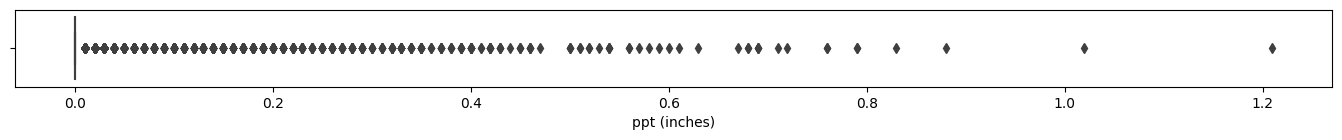

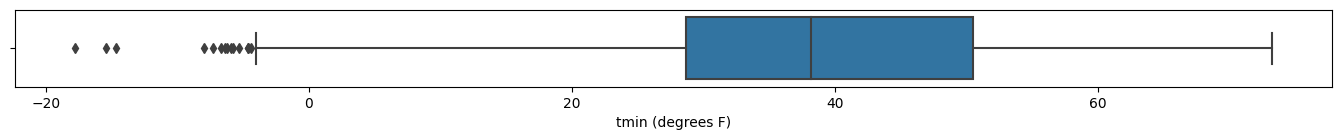

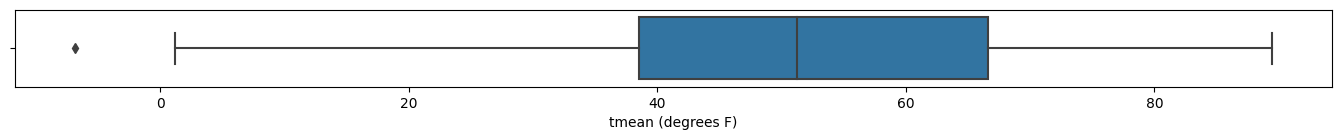

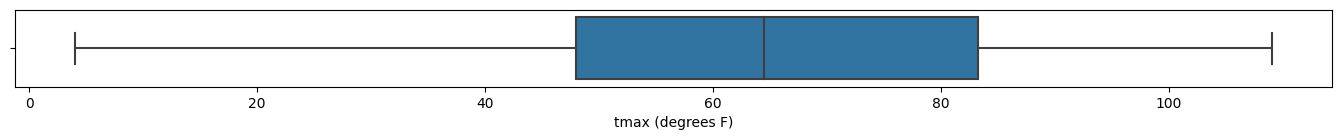

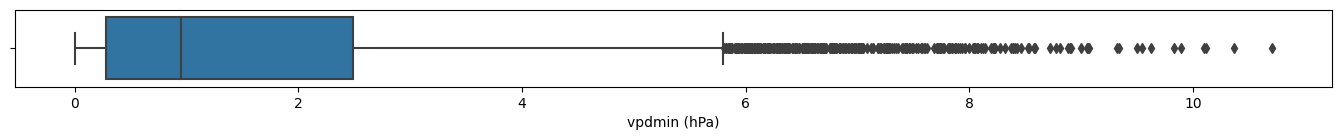

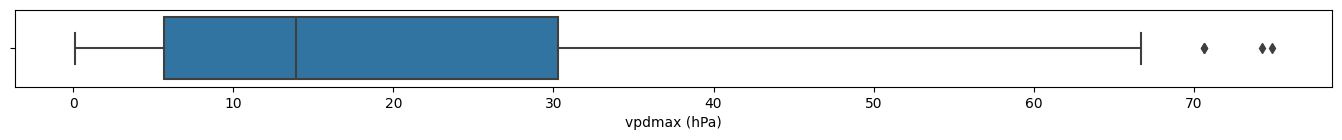

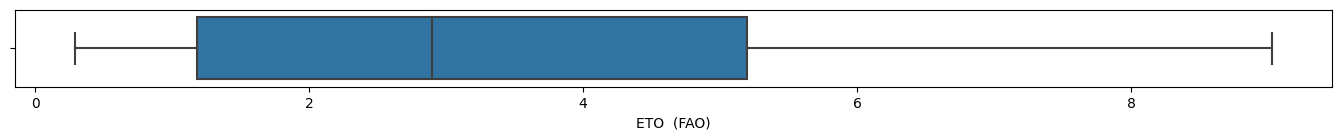

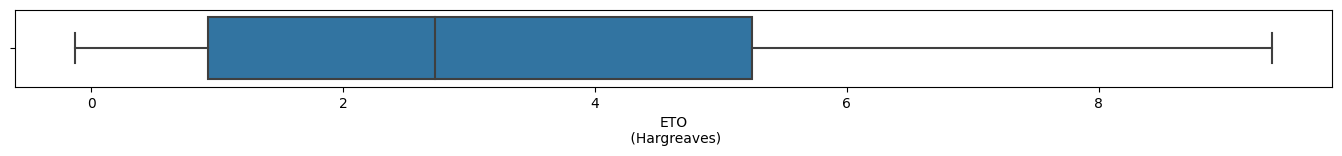

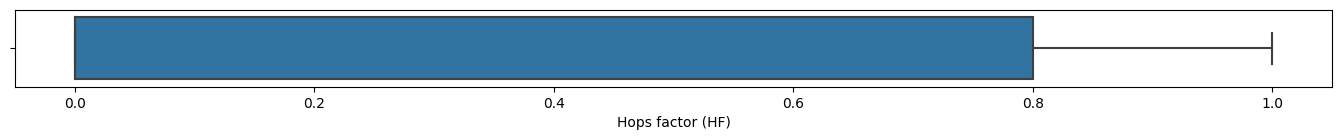

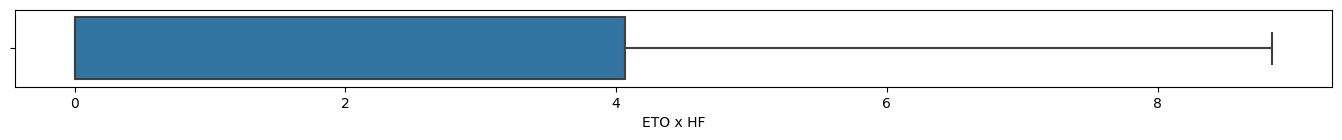

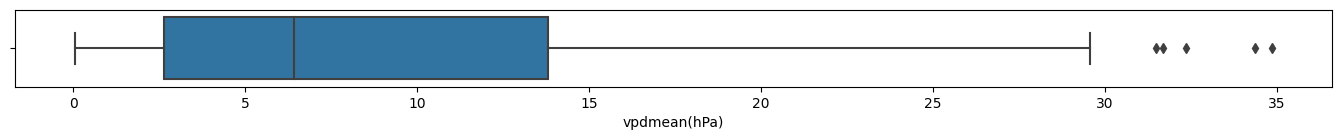

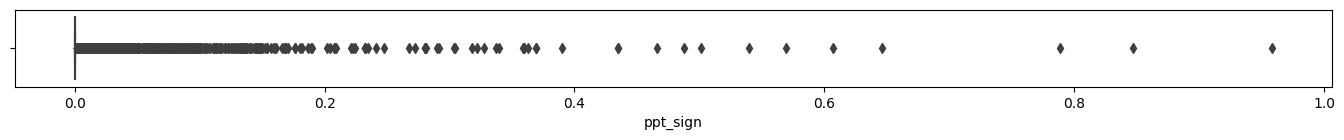

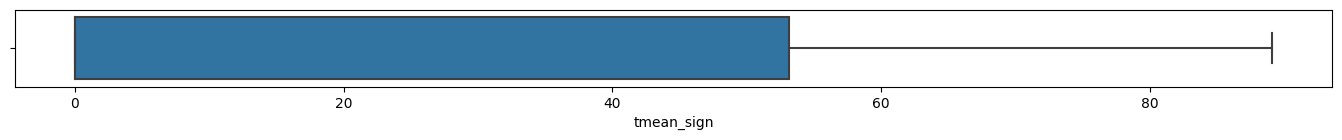

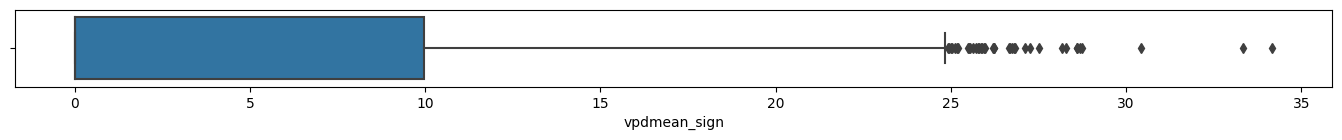

In [1065]:
df_climate_OR['Date'] = pd.to_datetime(df_climate_OR['Date'])
df_climate_OR = df_climate_OR.set_index("Date")
#Now we will check the outliers with the help of box plot
for column in df_climate_OR:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=df_climate_OR, x=column)

As you can clearly see the ppt and vpdmin are filled with outliers we will see a way to tackle them


In [1066]:
#To count number of outliers and percentage
import pandas as pd
import numpy as np

# Calculate the Z-score for each variable
z_scores = np.abs((df_climate_OR - df_climate_OR.mean()) / df_climate_OR.std())

# Define a threshold for outliers (e.g., Z-score > 3)
threshold = 3

# Count the number of outliers and calculate the percentage for each variable
outliers_count = {}
outliers_percentage = {}

for column in df_climate_OR.columns:
    outliers_count[column] = len(z_scores[z_scores[column] > threshold])
    outliers_percentage[column] = outliers_count[column] / len(df_climate_OR) * 100

# Print the results
for column in df_climate_OR.columns:
    print("Variable:", column)
    print("Number of outliers:", outliers_count[column])
    print("Percentage of outliers: {:.2f}%".format(outliers_percentage[column]))
    print()

Variable: ppt (inches)
Number of outliers: 200
Percentage of outliers: 2.31%

Variable: tmin (degrees F)
Number of outliers: 22
Percentage of outliers: 0.25%

Variable: tmean (degrees F)
Number of outliers: 3
Percentage of outliers: 0.03%

Variable: tmax (degrees F)
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: vpdmin (hPa)
Number of outliers: 127
Percentage of outliers: 1.46%

Variable: vpdmax (hPa)
Number of outliers: 5
Percentage of outliers: 0.06%

Variable: ETO  (FAO)
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: ЕТО
 (Hargreaves)
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: Hops factor (HF)
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: ETO x HF
Number of outliers: 0
Percentage of outliers: 0.00%

Variable: vpdmean(hPa)
Number of outliers: 5
Percentage of outliers: 0.06%

Variable: ppt_sign
Number of outliers: 127
Percentage of outliers: 1.46%

Variable: tmean_sign
Number of outliers: 0
Percentage of outliers: 0.

In [1067]:
# Perform outlier treatment on columns excluding 'ppt(inches)' and 'ppt_sign'
for column in df_climate_OR.columns:
    if column not in ['ppt (inches)', 'ppt_sign']:
        q1 = df_climate_OR[column].quantile(0.25)
        q2 = df_climate_OR[column].quantile(0.75)
        IQR = q2 - q1
        max_limit = q2 + (1.5 * IQR)
        min_limit = q1 - (1.5 * IQR)
        percentile25 = df_climate_OR[column].quantile(0.25)
        percentile75 = df_climate_OR[column].quantile(0.75)
        iqr = percentile75 - percentile25
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        df_climate_OR[column] = np.where(
            df_climate_OR[column] > upper_limit,
            upper_limit,
            np.where(
                df_climate_OR[column] < lower_limit,
                lower_limit,
                df_climate_OR[column]))


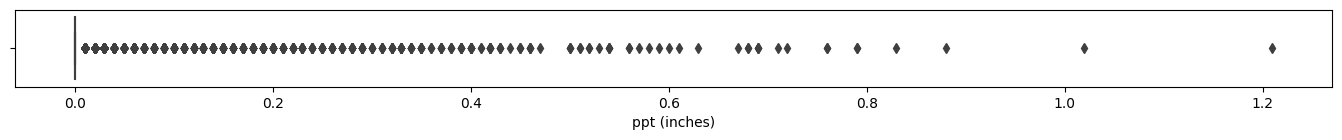

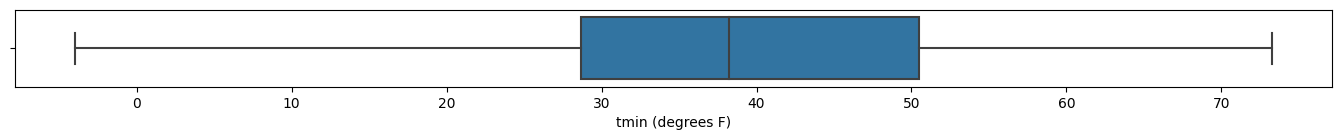

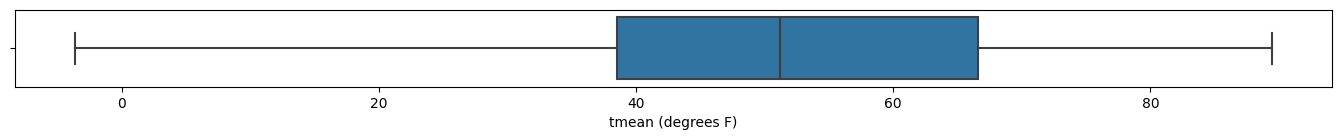

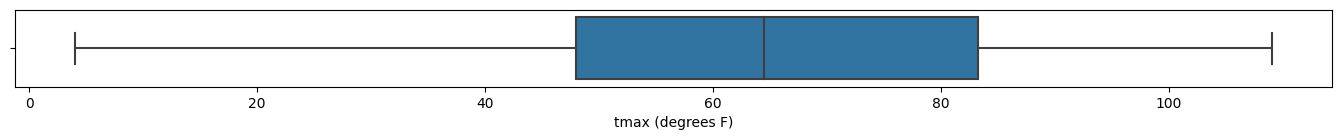

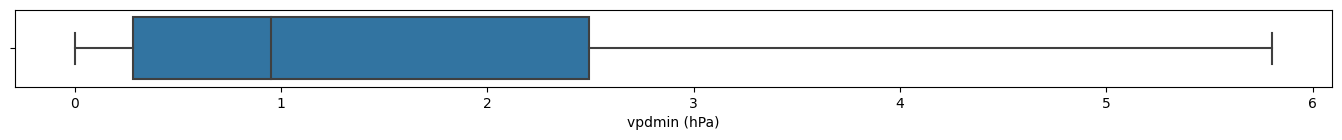

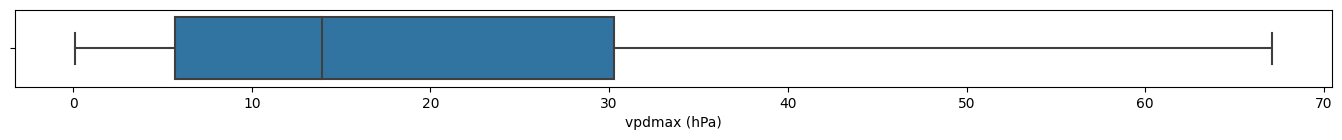

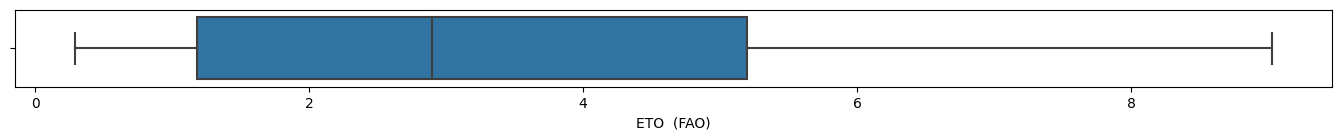

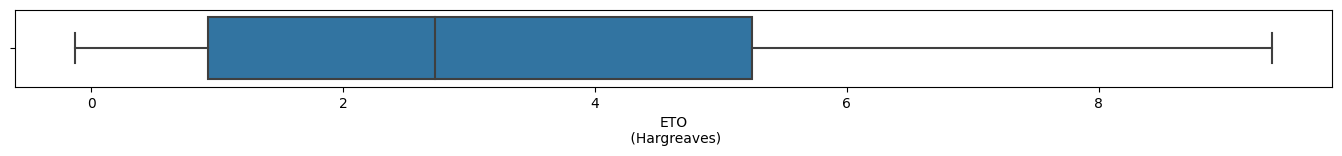

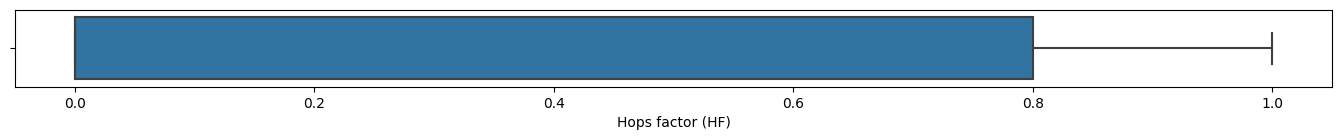

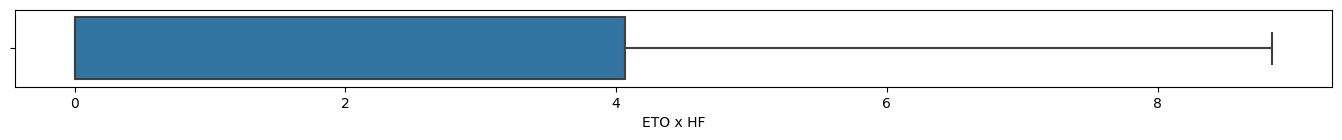

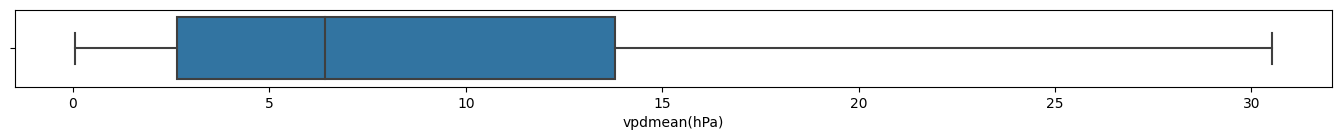

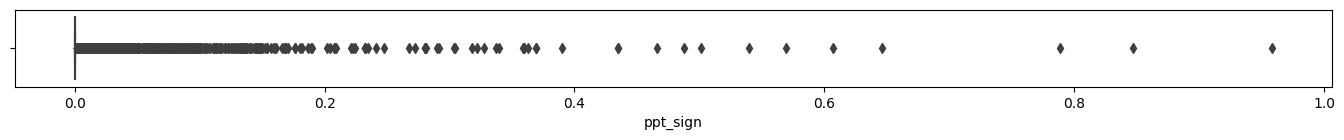

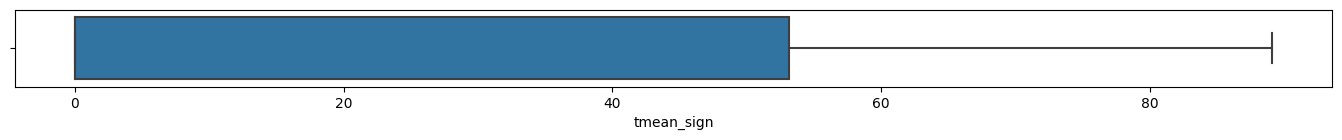

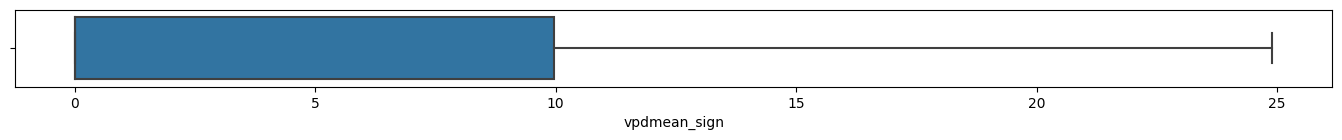

In [1068]:
#after removing
for column in df_climate_OR:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=df_climate_OR, x=column)

As you can see the mean of ppt and vpdmin is reduced and the max value is less than the threshold

In [1069]:
# Resample the data to yearly frequency and calculate the mean
df_climate_OR = df_climate_OR.resample('Y').mean()

# Set the index to year format
df_climate_OR = df_climate_OR.set_index(df_climate_OR.index.strftime('%Y'))

# Print the resulting DataFrame
df_climate_OR

ppt (inches)  tmin (degrees F)  tmean (degrees F)  tmax (degrees F)  \
Date                                                                        
1999      0.018986         38.541096          52.118082         65.694795   
2000      0.026339         39.511749          52.451639         65.394536   
2001      0.019726         38.727671          52.149315         65.571233   
2002      0.012384         37.981644          51.638356         65.294795   
2003      0.022466         40.708767          54.000274         67.299452   
2004      0.024699         39.876230          52.261475         64.650273   
2005      0.031644         38.161918          51.076164         63.989589   
2006      0.026219         39.640274          52.698082         65.762466   
2007      0.018055         39.181918          52.756712         66.333425   
2008      0.017131         37.549180          50.673497         63.801093   
2009      0.023205         37.776164          50.747945         63.726575   
2010      0.032137         38.547123          51.062740         63.577260   
2011      0.024849         37.292055          50.159178         63.031507   
2012      0.020710         39.122951          52.724317         66.330874   
2013      0.017288         37.292603          50.321644         63.395890   
2014      0.028027         40.027945          52.617260         65.200000   
2015      0.025781         40.636438          53.841370         67.061644   
2016      0.021066         38.958470          52.398361         65.844536   
2017      0.033123         38.639452          51.062329         63.577260   
2018      0.019370         39.396438          52.501370         65.603562   
2019      0.032849         38.770685          51.357808         63.946027   
2020      0.031585         38.715301          52.060929         65.409836   
2021      0.025781         40.358904          53.373151         66.427397   
2022      0.025201         41.338462          55.026374         68.715751   

      vpdmin (hPa)  vpdmax (hPa)  ETO  (FAO)  ЕТО\n (Hargreaves)  \
Date                                                               
1999      1.426000     19.122219    3.301863            3.193178   
2000      1.343497     18.912896    3.315683            3.228962   
2001      1.303493     19.472603    3.366247            3.271781   
2002      1.724466     19.223291    3.310027            3.207726   
2003      1.780356     20.623928    3.389205            3.300877   
2004      1.511079     18.430137    3.233142            3.148934   
2005      1.418000     18.118685    3.210959            3.114438   
2006      1.820233     19.822356    3.309479            3.225068   
2007      2.029479     20.432904    3.378164            3.291836   
2008      1.861516     18.702377    3.206393            3.108224   
2009      1.784562     18.592301    3.216575            3.120767   
2010      1.506521     17.044849    3.116027            3.015233   
2011      1.158164     17.112247    3.101918            2.998986   
2012      1.648046     19.609836    3.342869            3.244290   
2013      1.678644     18.771041    3.262055            3.176521   
2014      1.596096     18.538767    3.261534            3.174904   
2015      1.573685     19.847753    3.397452            3.307342   
2016      1.337008     18.919563    3.338962            3.245710   
2017      1.494288     18.100548    3.218877            3.138493   
2018      1.582507     18.801808    3.282301            3.195014   
2019      1.298342     16.882164    3.139808            3.046849   
2020      1.377172     18.117486    3.241503            3.137268   
2021      2.121452     19.460274    3.342548            3.259178   
2022      2.018553     22.200733    3.851026            3.811685   

      Hops factor (HF)  ETO x HF  vpdmean(hPa)  ppt_sign  tmean_sign  \
Date                                                                   
1999          0.329178  1.830807      8.839753  0.002785   21.820173   
2000          0.32

In [1070]:
#now we will check the corrleation between the data
#since the data is continous we willl be using pearson correaltion method
df_climate_OR.corr()

ppt (inches)  tmin (degrees F)  tmean (degrees F)  \
ppt (inches)            1.000000          0.199709          -0.030927   
tmin (degrees F)        0.199709          1.000000           0.944254   
tmean (degrees F)      -0.030927          0.944254           1.000000   
tmax (degrees F)       -0.203385          0.831938           0.968173   
vpdmin (hPa)           -0.320669          0.372147           0.436913   
vpdmax (hPa)           -0.426435          0.633965           0.801811   
ETO  (FAO)             -0.235564          0.673268           0.815225   
ЕТО\n (Hargreaves)     -0.209420          0.682297           0.810577   
Hops factor (HF)        0.042191          0.448936           0.511252   
ETO x HF               -0.158723          0.575270           0.677076   
vpdmean(hPa)           -0.414021          0.627959           0.806622   
ppt_sign                0.597735          0.228172           0.184952   
tmean_sign             -0.031962          0.568274           0.633213   
vpdmean_sign           -0.289924          0.557032           0.675266   

                    tmax (degrees F)  vpdmin (hPa)  vpdmax (hPa)  ETO  (FAO)  \
ppt (inches)               -0.203385     -0.320669     -0.426435   -0.235564   
tmin (degrees F)            0.831938      0.372147      0.633965    0.673268   
tmean (degrees F)           0.968173      0.436913      0.801811    0.815225   
tmax (degrees F)            1.000000      0.457101      0.872308    0.864689   
vpdmin (hPa)                0.457101      1.000000      0.660139    0.504606   
vpdmax (hPa)                0.872308      0.660139      1.000000    0.914431   
ETO  (FAO)                  0.864689      0.504606      0.914431    1.000000   
ЕТО\n (Hargreaves)          0.850180      0.512352      0.905792    0.998487   
Hops factor (HF)            0.521147      0.353233      0.584157    0.818334   
ETO x HF                    0.707162      0.517041      0.828955    0.954653   
vpdmean(hPa)                0.884284      0.492280      0.978572    0.920086   
ppt_sign                    0.138427      0.018238      0.021243    0.277139   
tmean_sign                  0.638033      0.483668      0.733868    0.906399   
vpdmean_sign                0.718501      0.535778      0.909966    0.928265   

                    ЕТО\n (Hargreaves)  Hops factor (HF)  ETO x HF  \
ppt (inches)                 -0.209420          0.042191 -0.158723   
tmin (degrees F)              0.682297          0.448936  0.575270   
tmean (degrees F)             0.810577          0.511252  0.677076   
tmax (degrees F)              0.850180          0.521147  0.707162   
vpdmin (hPa)                  0.512352          0.353233  0.517041   
vpdmax (hPa)                  0.905792          0.584157  0.828955   
ETO  (FAO)                    0.998487          0.818334  0.954653   
ЕТО\n (Hargreaves)            1.000000          0.833449  0.965492   
Hops factor (HF)              0.833449          1.000000  0.910119   
ETO x HF                      0.965492          0.910119  1.000000   
vpdmean(hPa)                  0.907521          0.579962  0.816888   
ppt_sign                      0.293821          0.567039  0.333068   
tmean_sign                    0.923349          0.956107  0.978902   
vpdmean_sign                  0.935449          0.754528  0.947204   

                    vpdmean(hPa)  ppt_sign  tmean_sign  vpdmean_sign  
ppt (inches)           -0.414021  0.597735   -0.031962     -0.289924  
tmin (degrees F)        0.627959  0.228172    0.568274      0.557032  
tmean (degrees F)       0.806622  0.184952    0.633213      0.675266  
tmax (degrees F)        0.884284  0.138427    0.638033      0.718501  
vpdmin (hPa)            0.492280  0.018238    0.483668      0.535778  
vpdmax (hPa)            0.978572  0.021243    0.733868      0.909966  
ETO  (FAO)              0.920086  0.277139    0.906399      0.928265  
ЕТО\n (Hargreaves)      0.907521  0.293821    0.923349      0.935449  
Hops factor (HF)        0.579962 

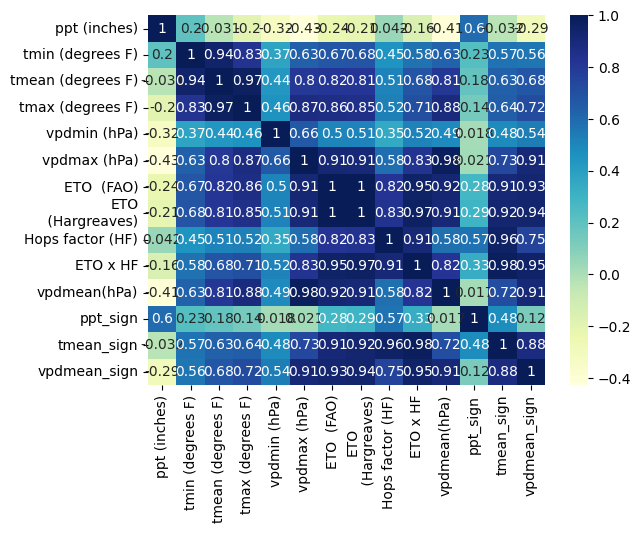

In [1071]:
dataplot = sns.heatmap(df_climate_OR.corr(), cmap="YlGnBu", annot=True)

In [1072]:
df_climate_OR_model=df_climate_OR[["ETO x HF","ppt_sign","tmean_sign","vpdmean_sign","Hops factor (HF)"]]
df_climate_OR_model

ETO x HF  ppt_sign  tmean_sign  vpdmean_sign  Hops factor (HF)
Date                                                                
1999  1.830807  0.002785   21.820173      4.917102          0.329178
2000  1.869257  0.003553   22.357770      5.186071          0.328279
2001  1.900471  0.003123   22.604326      5.267897          0.329178
2002  1.874117  0.001467   22.350474      5.034535          0.329178
2003  1.904405  0.005102   22.873022      5.359184          0.329178
2004  1.808499  0.005904   22.291317      4.891117          0.328279
2005  1.809718  0.008221   21.988375      4.893186          0.329178
2006  1.900632  0.004987   22.893458      5.326342          0.329178
2007  1.915309  0.003382   22.901449      5.392919          0.329178
2008  1.815153  0.002801   21.882311      4.885297          0.328279
2009  1.811971  0.007958   22.199633      4.838467          0.329178
2010  1.713418  0.006992   21.133748      4.295121          0.329178
2011  1.737118  0.005411   21.399945      4.507189          0.329178
2012  1.864604  0.003295   22.280984      5.069307          0.328279
2013  1.871680  0.004903   22.840759      5.105296          0.329178
2014  1.829743  0.003841   22.361063      4.830971          0.329178
2015  1.887932  0.005063   22.844077      5.109508          0.329178
2016  1.854889  0.006028   22.110680      4.968512          0.328279
2017  1.871176  0.005641   22.689726      5.082691          0.329178
2018  1.851470  0.003778   22.553400      4.984130          0.329178
2019  1.772953  0.008487   22.170841      4.488223          0.329178
2020  1.756024  0.013660   21.880872      4.489253          0.328279
2021  1.890397  0.006589   22.905625      4.957637          0.329178
2022  2.425260  0.013963   29.837799      6.541191          0.440110

### Modeling of Climate Data

In [1073]:
# u = new_df_average_yield_WA.sort_values('Year')
# v = df_climate_WA_model.sort_values('Date')[['ETO x HF','ppt_sign'	,'tmean_sign'	,'vpdmean_sign']].reset_index(drop=1)
# out = pd.concat([u, v], 1)
# out
MergeData_df_OR = (new_df_average_yield_OR.merge(df_climate_OR_model, left_on='Year', right_on='Date').reindex(columns=['Variety',"Total Acre","Hops factor (HF)", "Year",'Average Yield', 'ppt_sign', 'vpdmean_sign',"tmean_sign","ETO x HF","Moving Avg Yield"]))
MergeData_df_OR
dropped_values_total_acre = MergeData_df_OR[MergeData_df_OR['Total Acre'] == 0].shape[0]
dropped_values_variety = MergeData_df_OR[MergeData_df_OR['Variety'] == 'Total'].shape[0]
print("Number of dropped values due to 'Total Acre' being 0:", dropped_values_total_acre)
print("Number of dropped values due to 'Variety' being 'Total':",   dropped_values_variety)



Number of dropped values due to 'Total Acre' being 0: 1090
Number of dropped values due to 'Variety' being 'Total': 23


In [1074]:
MergeData_df_OR = MergeData_df_OR[MergeData_df_OR['Total Acre'] != 0] # Reset the index of the DataFrameMergeData_df = MergeData_df.reset_index(drop=True)
MergeData_df_OR = MergeData_df_OR[MergeData_df_OR['Variety'] != 'Total'] # Reset the index of the DataFrameMergeData_df = MergeData_df.reset_index(drop=True)

MergeData_df_OR

Variety  Total Acre  Hops factor (HF)  Year  Average Yield  \
19              Fuggle        63.0          0.328279  2000         1065.0   
22             Golding       115.0          0.328279  2000         1170.0   
32             Mt Hood       250.0          0.328279  2000         1790.0   
35              Nugget      2308.0          0.328279  2000         2162.0   
39               Perle       402.0          0.328279  2000         1130.0   
...                ...         ...               ...   ...            ...   
1341    Simcoe, YCR 14       527.0          0.440110  2022         1646.0   
1343          Sterling        35.0          0.440110  2022         1559.0   
1344  Strata, OR 91331      1143.0          0.440110  2022         2000.0   
1348    Talus, HBC 692        46.0          0.440110  2022         1483.0   
1355        Willamette       471.0          0.440110  2022         1489.0   

      ppt_sign  vpdmean_sign  tmean_sign  ETO x HF  Moving Avg Yield  
19    0.003553      5.186071   22.357770  1.869257          0.000000  
22    0.003553      5.186071   22.357770  1.869257          0.000000  
32    0.003553      5.186071   22.357770  1.869257          0.000000  
35    0.003553      5.186071   22.357770  1.869257          0.000000  
39    0.003553      5.186071   22.357770  1.869257          0.000000  
...        ...           ...         ...       ...               ...  
1341  0.013963      6.541191   29.837799  2.425260       1704.000000  
1343  0.013963      6.541191   29.837799  2.425260       1536.000000  
1344  0.013963      6.541191   29.837799  2.425260       1985.666667  
1348  0.013963      6.541191   29.837799  2.425260        494.333333  
1355  0.013963      6.541191   29.837799  2.425260       1602.333333  

[244 rows x 10 columns]

In [1075]:
MergeData_df_OR = MergeData_df_OR.rename(columns={'Year': 'ds',
                        'Average Yield': 'y'})

In [1076]:
lst_year = MergeData_df_OR['ds'].unique()
lst_year.sort()
num_train_years = 0.7 * len(MergeData_df_OR['ds'].unique())
train_years = lst_year[0:int(num_train_years + 1)]
test_years = list(set(lst_year) - set(train_years))


In [1077]:
df_train = MergeData_df_OR.loc[MergeData_df_OR['ds'].isin(train_years)]
df_test = MergeData_df_OR.loc[MergeData_df_OR['ds'].isin(test_years)]

In [1078]:
y_train = df_train['y'].values
x_train = df_train.drop(columns= ['y','ds','Variety'], axis=1).values
y_test = df_test['y'].values
x_test = df_test.drop(columns=['y','ds','Variety'], axis=1).values


In [1079]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_vals=rfr.predict(x_test)
pred_train = rfr.predict(x_train)
rfr_test= rfr.score(x_test,y_test)
rfr_train= rfr.score(x_train,y_train)
print(rfr_test,rfr_train)

0.5142352879418517 0.9147544676094644


R-squared scores - Test:  0.4963834879834538
R-squared scores - Train:  0.9170968590902627


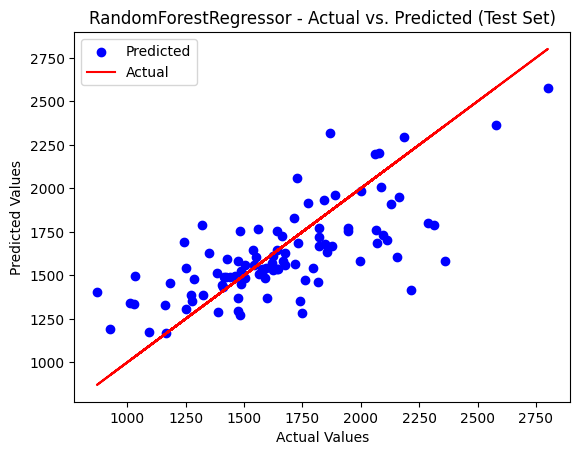

R-squared:  0.4963834879834538


In [1080]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create a RandomForestRegressor model
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

# Make predictions on the test set
rfr_vals = rfr.predict(x_test)
pred_train = rfr.predict(x_train)

# Calculate R-squared scores
rfr_test = rfr.score(x_test, y_test)
rfr_train = rfr.score(x_train, y_train)
print("R-squared scores - Test: ", rfr_test)
print("R-squared scores - Train: ", rfr_train)

# Plot predicted vs. actual values for test set
plt.scatter(y_test, rfr_vals, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RandomForestRegressor - Actual vs. Predicted (Test Set)')
plt.legend()
plt.show()

# Plot feature importances
importances = rfr.feature_importances_
num_features = x_train.shape[1]
indices = np.argsort(importances)




# Calculate and print R-squared score
r2 = r2_score(y_test, rfr_vals)
print("R-squared: ", r2)

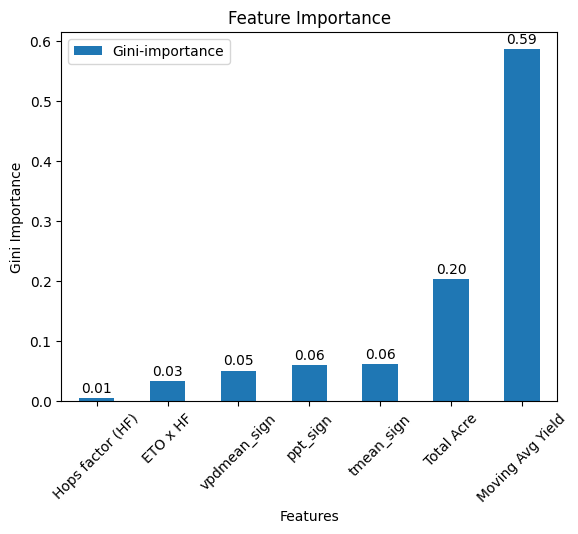

In [1081]:
import matplotlib.pyplot as plt

feats = {}
for feature, importance in zip(df_train.drop(columns=['y', 'ds', 'Variety'], axis=1).columns, rfr.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances_sorted = importances.sort_values(by='Gini-importance')

ax = importances_sorted.plot(kind='bar', rot=45)
ax.set_xlabel('Features')
ax.set_ylabel('Gini Importance')
ax.set_title('Feature Importance')

# Add data points on the plot
for i, importance in enumerate(importances_sorted['Gini-importance']):
    ax.text(i, importance + 0.01, f'{importance:.2f}', ha='center')

plt.show()


In [1082]:
#linear
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_vals=lr.predict(x_test)
lr_test= lr.score(x_test,y_test)
lr_train= lr.score(x_train,y_train)
print(lr_test,lr_train)

-81.2868903506008 0.2660156437622295


R-squared scores - Test: -81.2868903506008
R-squared scores - Train: 0.2660156437622295


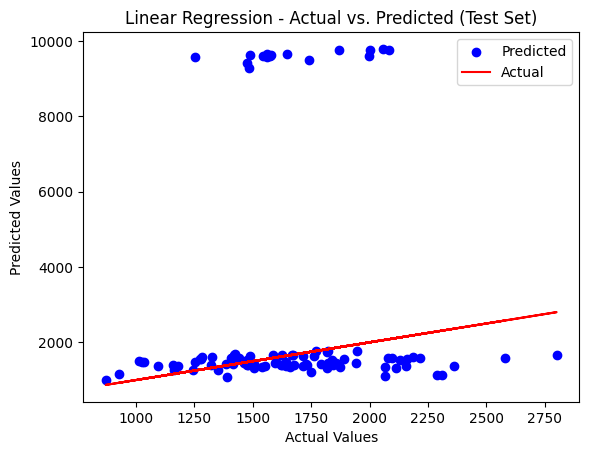

R-squared: -81.2868903506008


In [1083]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create a Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Make predictions on the test set
lr_vals = lr.predict(x_test)

# Calculate R-squared scores
lr_test = lr.score(x_test, y_test)
lr_train = lr.score(x_train, y_train)
print("R-squared scores - Test:", lr_test)
print("R-squared scores - Train:", lr_train)

# Plot predicted vs. actual values for test set
plt.scatter(y_test, lr_vals, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - Actual vs. Predicted (Test Set)')
plt.legend()
plt.show()

# Calculate and print R-squared score
r2 = r2_score(y_test, lr_vals)
print("R-squared:", r2)

In [1084]:
df_train.drop(columns= ['y','ds','Variety'], axis=1).columns

df_test.drop(columns=['y','ds','Variety'], axis=1).columns

Index(['Total Acre', 'Hops factor (HF)', 'ppt_sign', 'vpdmean_sign',
       'tmean_sign', 'ETO x HF', 'Moving Avg Yield'],
      dtype='object')

In [1085]:
coefficients = lr.coef_
coefficients

array([ 4.41301131e-02,  9.35122302e+04, -9.26144599e+03,  8.40295489e+02,
       -4.70831570e+02, -3.31499426e+02,  2.95153779e-01])

In [1086]:
#######FORECASTING########
import pandas as pd
from prophet import Prophet


# Read the data into a DataFrame
df = MergeData_df_OR

# Prepare the DataFrame for Prophet
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(df['ds'])
df_prophet['y'] = df['y']
df_prophet['Variety'] = df['Variety']

# Initialize and fit the Prophet model for each variety
forecasts = []
for variety in df_prophet['Variety'].unique():
    # Skip the variety 'Glacier'
    if variety == 'Glacier':
        continue

    df_variety = df_prophet[df_prophet['Variety'] == variety]

    # Check if the variety has sufficient data
    if df_variety['y'].notnull().sum() >= 2:
        # Fill missing values with the mean of available values
        df_variety = df_variety.fillna(df_variety['y'].mean())

        model = Prophet()
        model.fit(df_variety)

        future_dates = pd.DataFrame({'ds': pd.to_datetime(['2023-12-31'])})

        forecast = model.predict(future_dates)
        forecast['Variety'] = variety
        forecast = forecast[['ds', 'Variety', 'yhat']]

        # Set negative values to zero
        forecast['yhat'] = np.where(forecast['yhat'] < 0, 0, forecast['yhat'])

        forecasts.append(forecast)

# Combine the forecasts for all varieties into a single DataFrame
forecast_all = pd.concat(forecasts)

# Rename the columns to match the original DataFrame
forecast_all = forecast_all.rename(columns={'ds': 'Year', 'yhat': 'Average Yield per acre'})

# Convert the 'Year' column to the desired format
forecast_all['Year'] = forecast_all['Year'].dt.year

# Print the forecast for 2023 for all varieties
forecast_all



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3caqst12/l7fa2umr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3caqst12/_nizs2iw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73191', 'data', 'file=/tmp/tmp3caqst12/l7fa2umr.json', 'init=/tmp/tmp3caqst12/_nizs2iw.json', 'output', 'file=/tmp/tmp3caqst12/prophet_model7p3712a3/prophet_model-20230620190029.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:00:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:00:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

Year           Variety  Average Yield per acre
0  2023            Fuggle             1275.349041
0  2023           Golding             1389.409120
0  2023           Mt Hood             1663.007246
0  2023            Nugget             1537.700600
0  2023             Perle             1318.133616
0  2023          Sterling             1126.083583
0  2023        Willamette             2008.264006
0  2023         Millenium             2828.487168
0  2023           Cascade             1474.146057
0  2023           Liberty             2564.195429
0  2023      Super Galena             3665.066346
0  2023            Magnum             1941.174143
0  2023        Tettnanger              168.156637
0  2023        Centennial             1974.561591
0  2023           Chinook             1056.258708
0  2023    Citra, HBC 394             1402.549314
0  2023           Crystal             3778.163544
0  2023    Simcoe, YCR 14             2617.008909
0  2023            Mosaic             2612.936946
0  2023  Amarillo, VGXP01             3122.151413
0  2023  Strata, OR 91331             1533.295876
0  2023    Sabro, HBC 438             2295.662622
0  2023        Mt Rainier             1640.770571

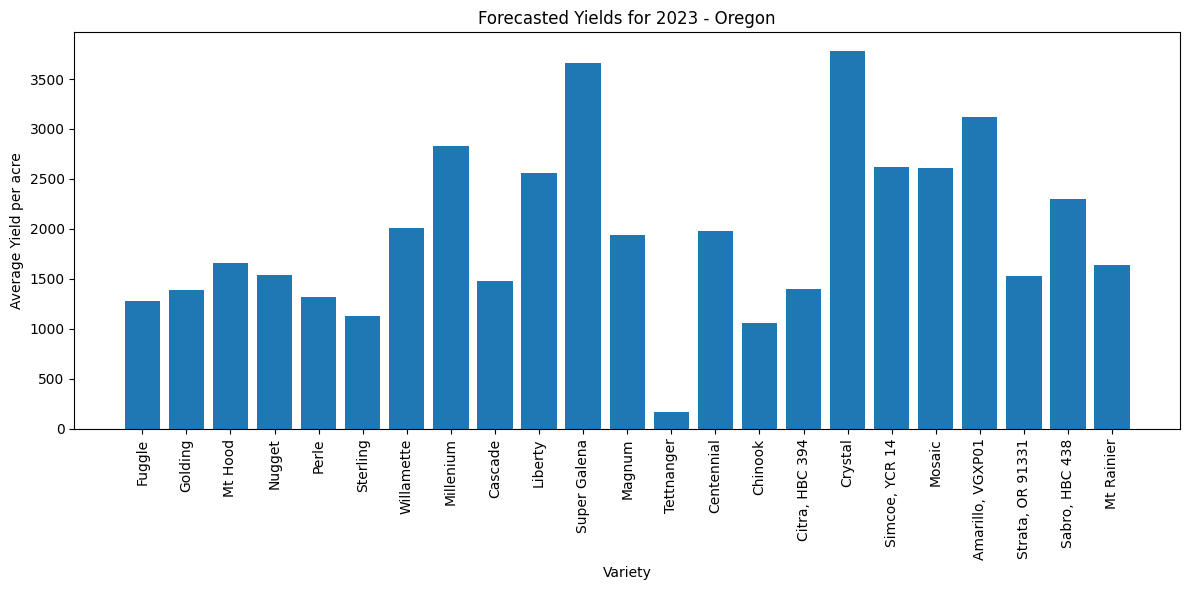

In [1087]:
import matplotlib.pyplot as plt

# Plot the forecasted yields for 2023
plt.figure(figsize=(12, 6))
plt.bar(forecast_all['Variety'], forecast_all['Average Yield per acre'])
plt.xlabel('Variety')
plt.ylabel('Average Yield per acre')
plt.title('Forecasted Yields for 2023 - Oregon')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-1088-bb3353596150>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_forecast['Year'] = variety_forecast['Year'].astype(int)
<ipython-input-1088-bb3353596150>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_data['ds'] = variety_data['ds'].dt.year.astype(int)


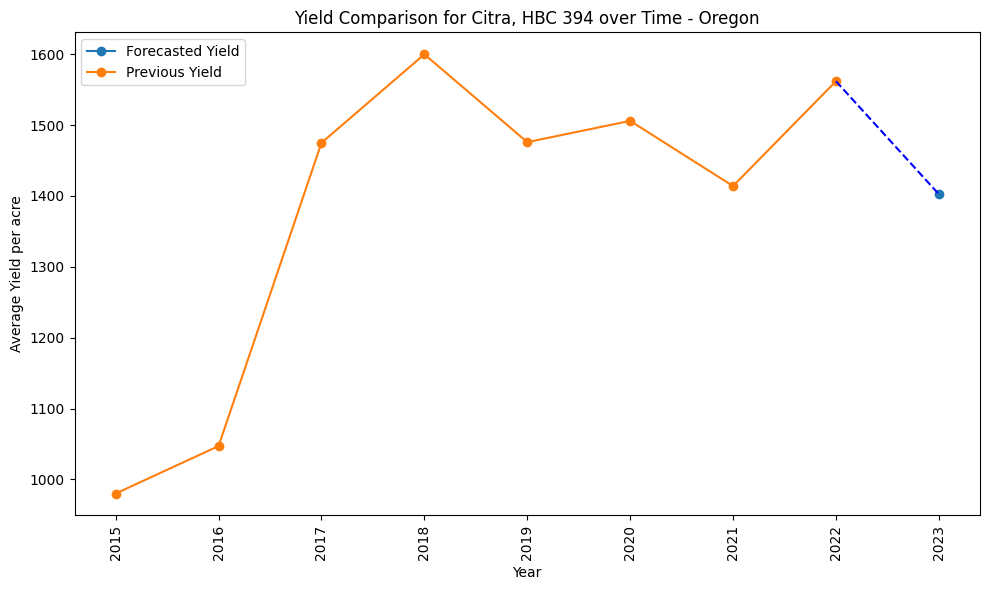

In [1088]:
import matplotlib.pyplot as plt

# Select a specific variety for visualization
variety = 'Citra, HBC 394'

# Filter the forecasted data for the selected variety
variety_forecast = forecast_all[forecast_all['Variety'] == variety]

# Filter the original data for the selected variety
variety_data = df_prophet[df_prophet['Variety'] == variety]

# Convert the year values to integers
variety_forecast['Year'] = variety_forecast['Year'].astype(int)
variety_data['ds'] = variety_data['ds'].dt.year.astype(int)

# Plot the trend of forecasted and previous yields over time
plt.figure(figsize=(10, 6))
plt.plot(variety_forecast['Year'], variety_forecast['Average Yield per acre'], marker='o', label='Forecasted Yield')
plt.plot(variety_data['ds'], variety_data['y'], marker='o', label='Previous Yield')
plt.plot([variety_data['ds'].iloc[-1], variety_forecast['Year'].iloc[0]],
         [variety_data['y'].iloc[-1], variety_forecast['Average Yield per acre'].iloc[0]], color='blue', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Average Yield per acre')
plt.title(f'Yield Comparison for {variety} over Time - Oregon')

# Set the x-axis ticks as discrete years
plt.xticks(range(min(variety_data['ds']), max(variety_forecast['Year']) + 1))

plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-1089-f45537051529>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_forecast['Year'] = variety_forecast['Year'].astype(int)
<ipython-input-1089-f45537051529>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_data['ds'] = variety_data['ds'].dt.year.astype(int)


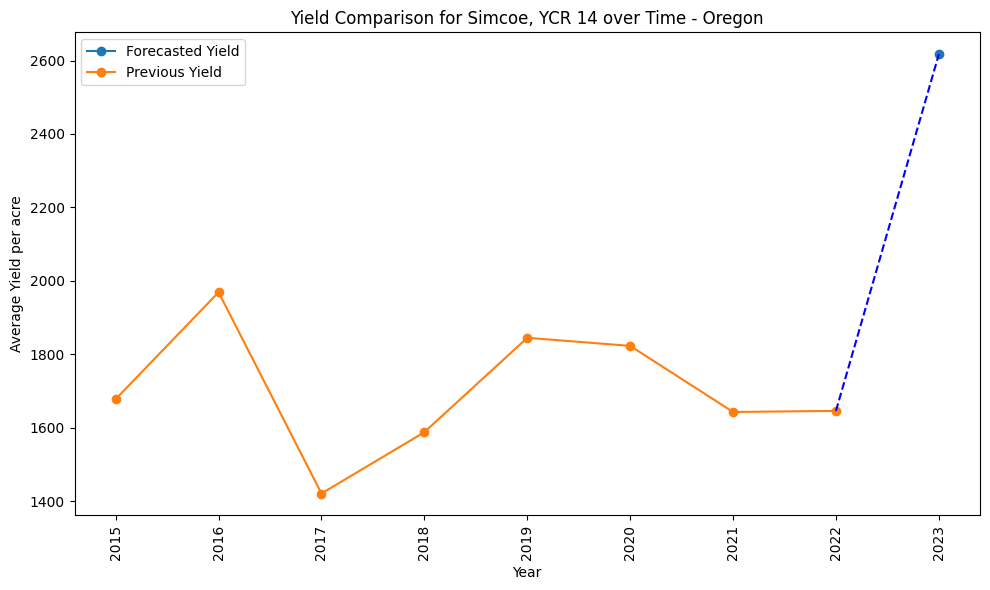

In [1089]:
# Select a specific variety for visualization
variety = 'Simcoe, YCR 14'

# Filter the forecasted data for the selected variety
variety_forecast = forecast_all[forecast_all['Variety'] == variety]

# Filter the original data for the selected variety
variety_data = df_prophet[df_prophet['Variety'] == variety]

# Convert the year values to integers
variety_forecast['Year'] = variety_forecast['Year'].astype(int)
variety_data['ds'] = variety_data['ds'].dt.year.astype(int)

# Plot the trend of forecasted and previous yields over time
plt.figure(figsize=(10, 6))
plt.plot(variety_forecast['Year'], variety_forecast['Average Yield per acre'], marker='o', label='Forecasted Yield')
plt.plot(variety_data['ds'], variety_data['y'], marker='o', label='Previous Yield')
plt.plot([variety_data['ds'].iloc[-1], variety_forecast['Year'].iloc[0]],
         [variety_data['y'].iloc[-1], variety_forecast['Average Yield per acre'].iloc[0]], color='blue', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Average Yield per acre')
plt.title(f'Yield Comparison for {variety} over Time - Oregon')

# Set the x-axis ticks as discrete years
plt.xticks(range(min(variety_data['ds']), max(variety_forecast['Year']) + 1))

plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-1090-2b5bec5539d3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_forecast['Year'] = variety_forecast['Year'].astype(int)
<ipython-input-1090-2b5bec5539d3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_data['ds'] = variety_data['ds'].dt.year.astype(int)


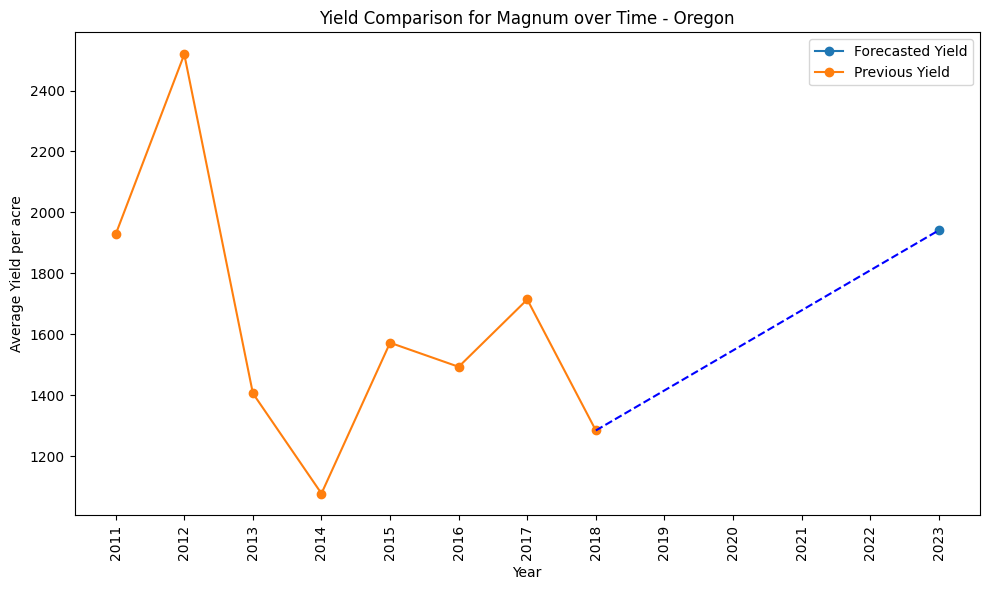

In [1090]:
# Select a specific variety for visualization
variety = 'Magnum'

# Filter the forecasted data for the selected variety
variety_forecast = forecast_all[forecast_all['Variety'] == variety]

# Filter the original data for the selected variety
variety_data = df_prophet[df_prophet['Variety'] == variety]

# Convert the year values to integers
variety_forecast['Year'] = variety_forecast['Year'].astype(int)
variety_data['ds'] = variety_data['ds'].dt.year.astype(int)

# Plot the trend of forecasted and previous yields over time
plt.figure(figsize=(10, 6))
plt.plot(variety_forecast['Year'], variety_forecast['Average Yield per acre'], marker='o', label='Forecasted Yield')
plt.plot(variety_data['ds'], variety_data['y'], marker='o', label='Previous Yield')
plt.plot([variety_data['ds'].iloc[-1], variety_forecast['Year'].iloc[0]],
         [variety_data['y'].iloc[-1], variety_forecast['Average Yield per acre'].iloc[0]], color='blue', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Average Yield per acre')
plt.title(f'Yield Comparison for {variety} over Time - Oregon')

# Set the x-axis ticks as discrete years
plt.xticks(range(min(variety_data['ds']), max(variety_forecast['Year']) + 1))

plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

##Analyzing the NASA Data of Oregon


In [1091]:
#Reading the excel file
df_nasa_climate_OR=pd.read_excel(xlsx_file,sheet_name="OR- NASA data",index_col=False)
# if you notice if you remove null values we will elimate the headers
df_nasa_climate_OR
df_nasa_climate_OR=df_nasa_climate_OR.iloc[10:]
df_nasa_climate_OR.columns = df_nasa_climate_OR.iloc[0]
df_nasa_climate_OR=df_nasa_climate_OR.iloc[1:]
test=df_nasa_climate_OR
df_nasa_climate_OR_temp=df_nasa_climate_OR
para=df_nasa_climate_OR["PARAMETER"].unique()
df_nasa_climate_OR_temp.set_index("PARAMETER",inplace=False)

10                  YEAR    JAN    FEB    MAR     APR     MAY     JUN     JUL  \
PARAMETER                                                                       
GWETTOP             1999   0.98   0.98   0.97    0.92    0.88     0.8    0.66   
GWETTOP             2000   0.93   0.96   0.95    0.91    0.88     0.8    0.64   
GWETTOP             2001    0.8   0.82   0.83    0.84     0.8    0.69    0.56   
GWETTOP             2002   0.95   0.96   0.95    0.92    0.86    0.76    0.62   
GWETTOP             2003   0.89   0.94   0.95    0.95     0.9    0.77    0.59   
...                  ...    ...    ...    ...     ...     ...     ...     ...   
CLRSKY_SFC_PAR_TOT  2017  41.33  63.45  92.21  124.05  149.46  159.24  155.45   
CLRSKY_SFC_PAR_TOT  2018  40.23  62.07  92.52  121.13  147.41  158.65  154.62   
CLRSKY_SFC_PAR_TOT  2019  41.02  62.49   91.9  123.98  146.98  160.23  151.95   
CLRSKY_SFC_PAR_TOT  2020  39.64  61.94   92.3  125.34  147.52  158.56  153.12   
CLRSKY_SFC_PAR_TOT  2021   40.2  62.19  93.13  125.48  149.06  159.71  153.43   

10                     AUG     SEP    OCT    NOV    DEC    ANN  
PARAMETER                                                       
GWETTOP               0.56     0.5   0.51    0.7   0.88   0.77  
GWETTOP               0.52    0.51   0.54   0.61   0.73   0.75  
GWETTOP               0.51    0.48   0.51   0.68   0.89    0.7  
GWETTOP               0.51    0.45   0.49   0.57   0.74   0.73  
GWETTOP               0.49    0.47   0.52    0.6   0.84   0.74  
...                    ...     ...    ...    ...    ...    ...  
CLRSKY_SFC_PAR_TOT  126.54   94.52  71.82  45.45  33.95  96.62  
CLRSKY_SFC_PAR_TOT  123.53  103.88  71.77  45.48  34.08  96.44  
CLRSKY_SFC_PAR_TOT  132.78  103.05  71.46  45.59  33.27  97.22  
CLRSKY_SFC_PAR_TOT   134.2   90.76  69.65  45.09  33.88  96.09  
CLRSKY_SFC_PAR_TOT  124.38  103.31   71.6  45.66  34.57  97.05  

[138 rows x 14 columns]

In [1092]:
from datetime import datetime
row_index=[]
df_nasa_climate_OR_cleaned=pd.DataFrame()
for lista in para:
  df_nasa_climate_OR_cleaned[lista]=np.nan
df_nasa_climate_OR_cleaned
year_list=df_nasa_climate_OR_temp['YEAR'].unique()
for year in year_list:
  for i in range(1,13):
    row_index.append(datetime.strptime(str(year),"%Y"))
df_nasa_climate_OR_cleaned.insert(0,'Date',row_index)
df_nasa_climate_OR_cleaned.set_index('Date', inplace=True)
df_nasa_climate_OR_cleaned
df_nasa_climate_OR_cleaned=df_nasa_climate_OR_cleaned.set_index(df_nasa_climate_OR_cleaned.index.strftime('%Y'))
df_nasa_climate_OR_cleaned

GWETTOP  GWETPROF  GWETROOT  CLOUD_AMT  ALLSKY_SFC_PAR_TOT  \
Date                                                               
1999      NaN       NaN       NaN        NaN                 NaN   
1999      NaN       NaN       NaN        NaN                 NaN   
1999      NaN       NaN       NaN        NaN                 NaN   
1999      NaN       NaN       NaN        NaN                 NaN   
1999      NaN       NaN       NaN        NaN                 NaN   
...       ...       ...       ...        ...                 ...   
2021      NaN       NaN       NaN        NaN                 NaN   
2021      NaN       NaN       NaN        NaN                 NaN   
2021      NaN       NaN       NaN        NaN                 NaN   
2021      NaN       NaN       NaN        NaN                 NaN   
2021      NaN       NaN       NaN        NaN                 NaN   

      CLRSKY_SFC_PAR_TOT  
Date                      
1999                 NaN  
1999                 NaN  
1999                 NaN  
1999                 NaN  
1999                 NaN  
...                  ...  
2021                 NaN  
2021                 NaN  
2021                 NaN  
2021                 NaN  
2021                 NaN  

[276 rows x 6 columns]

In [1093]:
i=0
list_month=df_nasa_climate_OR.columns[2:-1]
for year in year_list:
  for month in list_month:
    for z in para:
      a=test[month][(test["PARAMETER"] ==z) & (test["YEAR"] == year)]
      df_nasa_climate_OR_cleaned[z].iloc[i]=a
    i+=1
list_convert=df_nasa_climate_OR_cleaned.columns
for convert in list_convert:
  df_nasa_climate_OR_cleaned[convert] = df_nasa_climate_OR_cleaned[convert].astype(float)

<ipython-input-1093-582c7774295a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nasa_climate_OR_cleaned[z].iloc[i]=a


In [1094]:
#Now we will fill the nan values with 0
df_nasa_climate_OR_cleaned=df_nasa_climate_OR_cleaned.fillna(0)


In [1095]:
df_nasa_climate_OR_cleaned.describe([.01,.02,.03,.05,.10,.25,.5,.75,.95,.97,.98,.99])


GWETTOP    GWETPROF    GWETROOT   CLOUD_AMT  ALLSKY_SFC_PAR_TOT  \
count  276.000000  276.000000  276.000000  276.000000          276.000000   
mean     0.759565    0.762065    0.766304   65.342355           63.054275   
std      0.171294    0.166125    0.174066   17.261853           41.557208   
min      0.430000    0.490000    0.480000   21.570000            0.000000   
1%       0.440000    0.500000    0.490000   26.592500            0.000000   
2%       0.450000    0.500000    0.490000   30.070000            0.000000   
3%       0.472500    0.510000    0.492500   31.885000            0.000000   
5%       0.487500    0.510000    0.500000   35.087500            0.000000   
10%      0.510000    0.530000    0.520000   37.945000           15.795000   
25%      0.590000    0.597500    0.597500   53.182500           24.915000   
50%      0.800000    0.780000    0.785000   68.200000           56.220000   
75%      0.910000    0.930000    0.940000   79.525000          102.150000   
95%      0.960000    0.980000    0.980000   89.365000          128.950000   
97%      0.970000    0.980000    0.990000   89.925000          132.165000   
98%      0.970000    0.980000    0.990000   90.875000          135.510000   
99%      0.980000    0.980000    0.990000   92.002500          138.280000   
max      0.980000    0.990000    1.000000   94.100000          144.940000   

       CLRSKY_SFC_PAR_TOT  
count          276.000000  
mean            88.483333  
std             50.155471  
min              0.000000  
1%               0.000000  
2%               0.000000  
3%               0.000000  
5%               0.000000  
10%             33.915000  
25%             45.195000  
50%             92.265000  
75%            134.165000  
95%            158.322500  
97%            158.765000  
98%            159.245000  
99%            159.755000  
max            160.230000

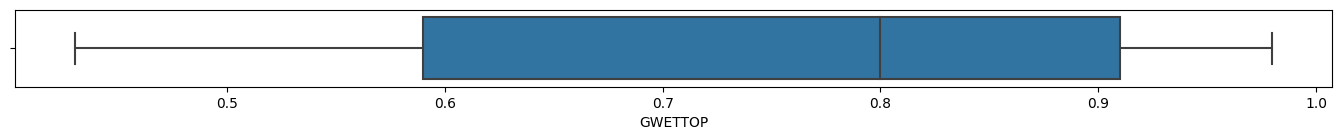

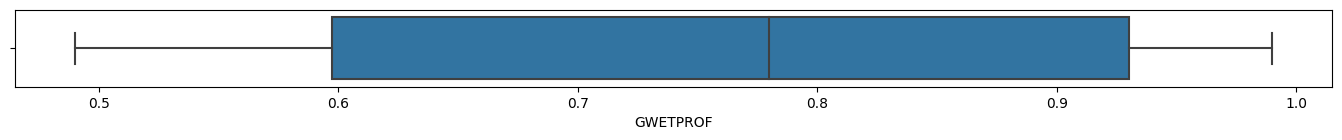

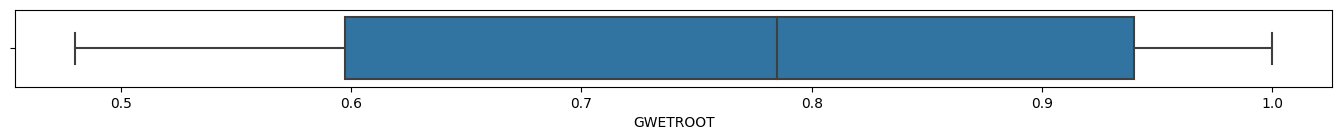

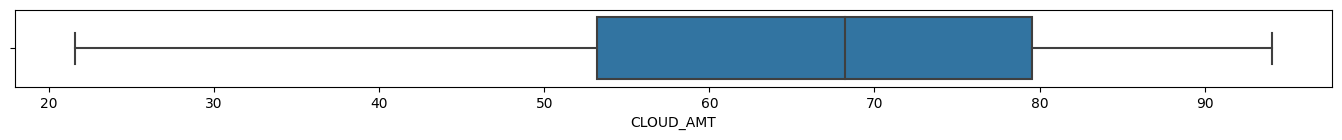

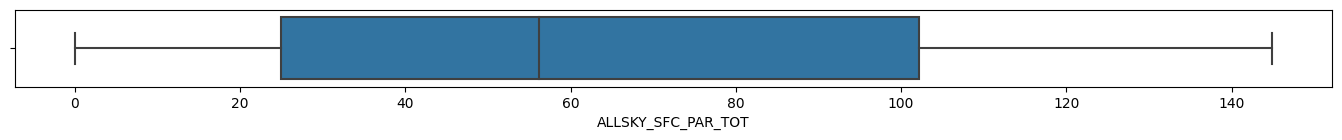

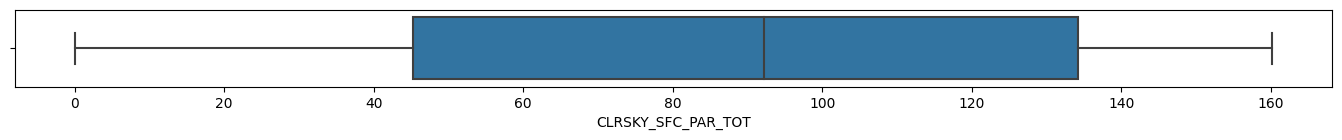

In [1096]:
for column in df_nasa_climate_OR_cleaned:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=df_nasa_climate_OR_cleaned, x=column)

In [1097]:
for column in df_nasa_climate_OR_cleaned:
  q1 = df_nasa_climate_OR_cleaned[column].quantile(0.25)
  q2 = df_nasa_climate_OR_cleaned[column].quantile(0.75)
  IQR = q2 - q1
  max_limit = q2 + (1.5 * IQR)
  min_limit = q1 - (1.5 * IQR)
  percentile25 = df_nasa_climate_OR_cleaned[column].quantile(0.25)
  percentile75 = df_nasa_climate_OR_cleaned[column].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  df_nasa_climate_OR_cleaned[column] = np.where(
      df_nasa_climate_OR_cleaned[column] > upper_limit,
      upper_limit,
      np.where(
          df_nasa_climate_OR_cleaned[column] < lower_limit,
          lower_limit,
          df_nasa_climate_OR_cleaned[column]))


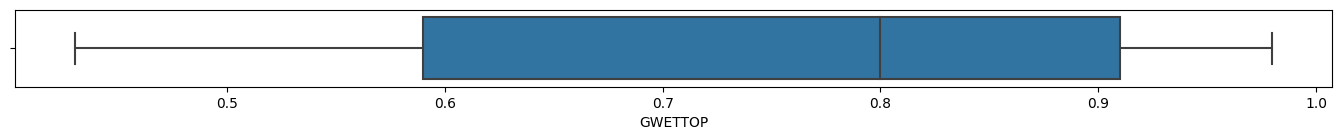

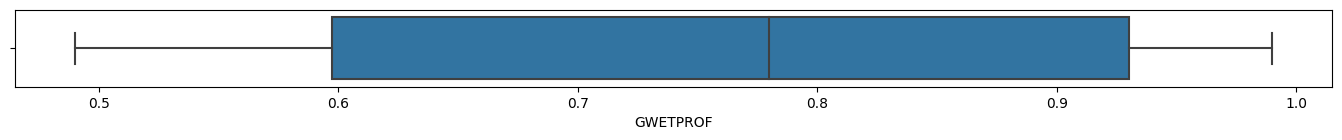

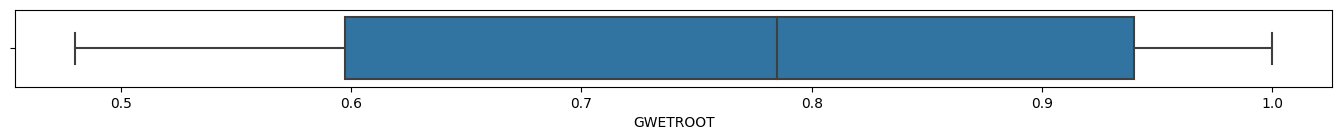

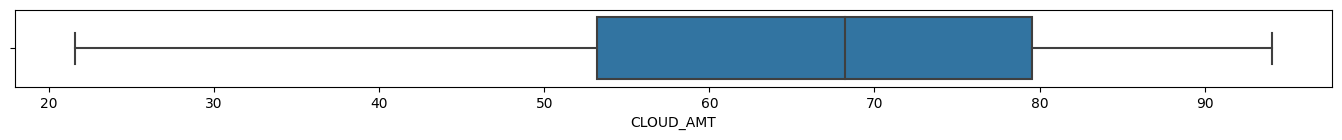

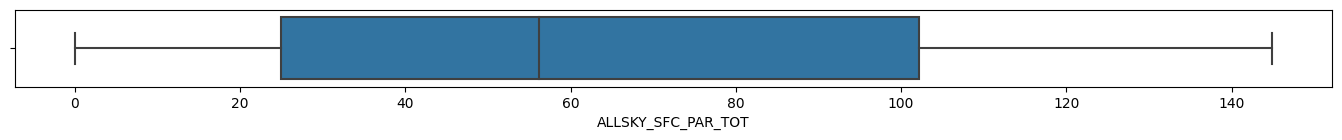

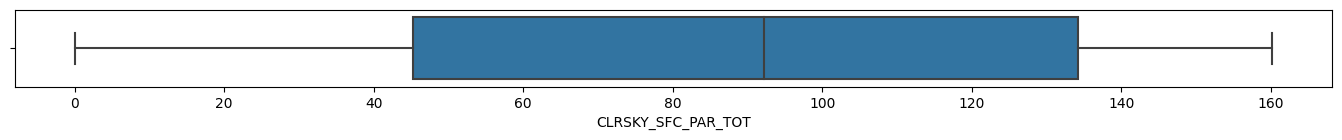

In [1098]:
for column in df_nasa_climate_OR_cleaned:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=df_nasa_climate_OR_cleaned, x=column)

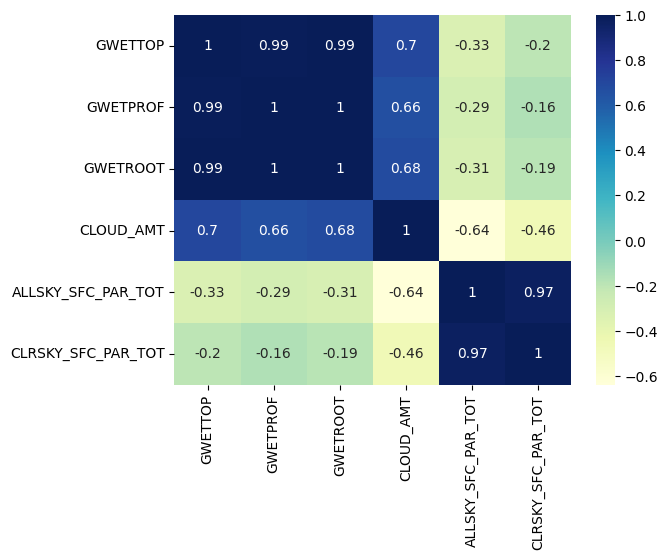

In [1099]:
dataplot = sns.heatmap(df_nasa_climate_OR_cleaned.corr(), cmap="YlGnBu", annot=True)

In [1100]:
MergeData_df_NASA_OR = (new_df_average_yield_OR.merge(df_nasa_climate_OR_cleaned, left_on='Year', right_on='Date').reindex(columns=['Variety',"Total Acre", "Year",'Average Yield', 'GWETTOP', 'GWETPROF','ALLSKY_SFC_PAR_TOT','CLRSKY_SFC_PAR_TOT',"GWETPROF","CLOUD_AMT","Moving Avg Yield"]))
MergeData_df_NASA_OR = MergeData_df_NASA_OR.rename(columns={'Year': 'ds',
                        'Average Yield': 'y'})
MergeData_df_NASA_OR= MergeData_df_NASA_OR.loc[:,~MergeData_df_NASA_OR.columns.duplicated()].copy()

MergeData_df_NASA_OR = MergeData_df_NASA_OR[MergeData_df_NASA_OR['Total Acre'] != 0]
MergeData_df_NASA_OR = MergeData_df_NASA_OR[MergeData_df_NASA_OR['Variety'] != 'Total']

MergeData_df_NASA_OR.head()

Variety  Total Acre    ds       y  GWETTOP  GWETPROF  ALLSKY_SFC_PAR_TOT  \
228  Fuggle        63.0  2000  1065.0     0.93      0.95                 0.0   
229  Fuggle        63.0  2000  1065.0     0.96      0.97                 0.0   
230  Fuggle        63.0  2000  1065.0     0.95      0.97                 0.0   
231  Fuggle        63.0  2000  1065.0     0.91      0.91                 0.0   
232  Fuggle        63.0  2000  1065.0     0.88      0.87                 0.0   

     CLRSKY_SFC_PAR_TOT  CLOUD_AMT  Moving Avg Yield  
228                 0.0      71.06               0.0  
229                 0.0      73.17               0.0  
230                 0.0      72.84               0.0  
231                 0.0      73.61               0.0  
232                 0.0      80.92               0.0

In [1101]:
lst_year = MergeData_df_NASA_OR['ds'].unique()
lst_year.sort()
num_train_years = 0.7 * len(MergeData_df_NASA_OR['ds'].unique())
train_years = lst_year[0:int(num_train_years + 1)]
train_years.sort()
test_years = list(set(lst_year) - set(train_years))

In [1102]:
df_train = MergeData_df_NASA_OR.loc[MergeData_df_NASA_OR['ds'].isin(train_years)]
df_test = MergeData_df_NASA_OR.loc[MergeData_df_NASA_OR['ds'].isin(test_years)]

In [1103]:
y_train = df_train['y'].values
x_train = df_train.drop(columns= ['y','ds','Variety'], axis=1).values
y_test = df_test['y'].values
x_test = df_test.drop(columns=['y','ds','Variety'], axis=1).values

In [1104]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_vals=rfr.predict(x_test)
pred_train = rfr.predict(x_train)
rfr_test= rfr.score(x_test,y_test)
rfr_train= rfr.score(x_train,y_train)
print(rfr_test,rfr_train)

-0.19167487386238102 0.9999035896017725


R-squared scores - Test:  -0.16866953508312021
R-squared scores - Train:  0.9998463758257384


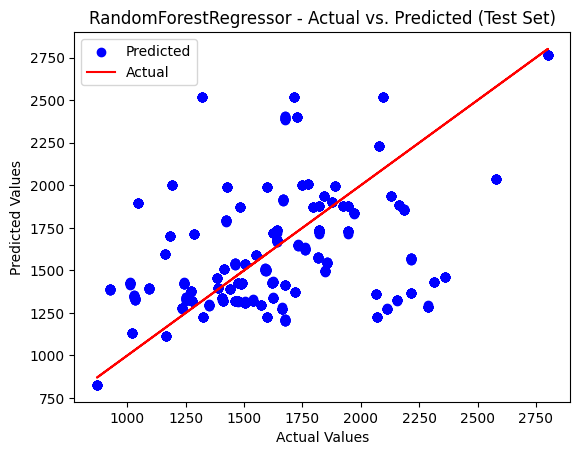

R-squared:  -0.16866953508312021


In [1105]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create a RandomForestRegressor model
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

# Make predictions on the test set
rfr_vals = rfr.predict(x_test)
pred_train = rfr.predict(x_train)

# Calculate R-squared scores
rfr_test = rfr.score(x_test, y_test)
rfr_train = rfr.score(x_train, y_train)
print("R-squared scores - Test: ", rfr_test)
print("R-squared scores - Train: ", rfr_train)

# Plot predicted vs. actual values for test set
plt.scatter(y_test, rfr_vals, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RandomForestRegressor - Actual vs. Predicted (Test Set)')
plt.legend()
plt.show()

# Plot feature importances
importances = rfr.feature_importances_
num_features = x_train.shape[1]
indices = np.argsort(importances)




# Calculate and print R-squared score
r2 = r2_score(y_test, rfr_vals)
print("R-squared: ", r2)

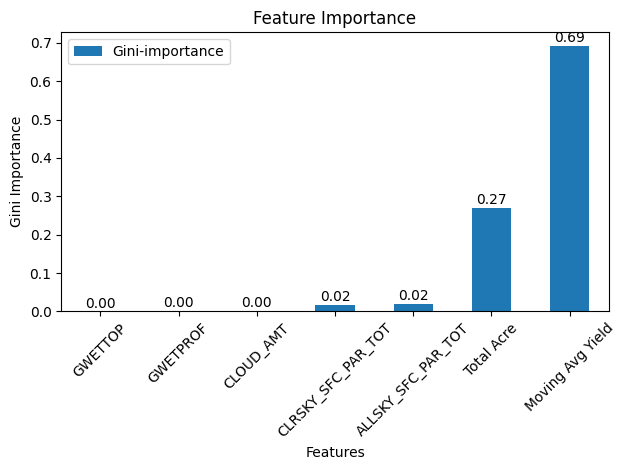

In [1106]:
import matplotlib.pyplot as plt

feats = {}
for feature, importance in zip(df_train.drop(columns=['y', 'ds', 'Variety'], axis=1).columns, rfr.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances_sorted = importances.sort_values(by='Gini-importance')

ax = importances_sorted.plot(kind='bar', rot=45)
ax.set_xlabel('Features')
ax.set_ylabel('Gini Importance')
ax.set_title('Feature Importance')

# Add data points on the plot
for i, importance in enumerate(importances_sorted['Gini-importance']):
    ax.text(i, importance + 0.01, f'{importance:.2f}', ha='center')

plt.tight_layout()  # Optional: Adjusts the padding between and around subplots for better appearance
plt.show()


In [1107]:
#linear
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_vals=lr.predict(x_test)
lr_test= lr.score(x_test,y_test)
lr_train= lr.score(x_train,y_train)
print(lr_test,lr_train)

0.22136617813253623 0.22150909244466666


R-squared scores - Test: 0.22136617813253623
R-squared scores - Train: 0.22150909244466666


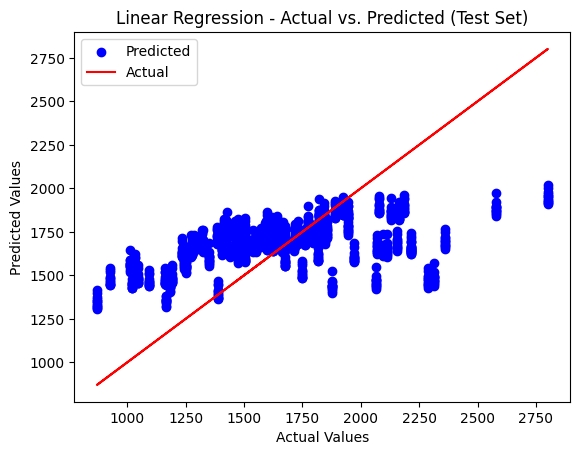

R-squared: 0.22136617813253623


In [1108]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create a Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Make predictions on the test set
lr_vals = lr.predict(x_test)

# Calculate R-squared scores
lr_test = lr.score(x_test, y_test)
lr_train = lr.score(x_train, y_train)
print("R-squared scores - Test:", lr_test)
print("R-squared scores - Train:", lr_train)

# Plot predicted vs. actual values for test set
plt.scatter(y_test, lr_vals, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - Actual vs. Predicted (Test Set)')
plt.legend()
plt.show()

# Calculate and print R-squared score
r2 = r2_score(y_test, lr_vals)
print("R-squared:", r2)

In [1109]:
df_train.drop(columns= ['y','ds','Variety'], axis=1).columns

df_test.drop(columns=['y','ds','Variety'], axis=1).columns

Index(['Total Acre', 'GWETTOP', 'GWETPROF', 'ALLSKY_SFC_PAR_TOT',
       'CLRSKY_SFC_PAR_TOT', 'CLOUD_AMT', 'Moving Avg Yield'],
      dtype='object')

In [1110]:
coefficients = lr.coef_
coefficients

array([ 6.59354897e-02,  3.03904799e+02, -4.66226020e+02,  2.86357955e+00,
       -2.25446377e+00,  3.34148124e+00,  2.68756259e-01])